<a href="https://colab.research.google.com/github/LANCARI/MOD-711-SUB-PROYECTO-1---GRUPAL/blob/main/Sub_Proyecto_1__Grupo_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Prediccion de Precios en Bienes Raices - Mercado Australiano - Regresion Avanzada

# Tabla de Contenido

1. [Introduccion](#Introduccion)
2. [Configuracion e Instalacion](#Configuracion-e-Instalacion)
3. [Entendimiento de los Datos](#Entendimiento-de-los-Datos)  
4. [Manipulacion y Limpieza de Datos](#Manipulacion-y-Limpieza-de-Datos)
    1. [Dropping Data](#Dropping-Data)
    2. [Derived Data](#Derived-Data)
5. [Analisis de Datos](#Analisis-de-Datos)
    1. [Analisis-Univariable](#Analisis-Univariable)
        1. [Plot Numeric Data](#Plot-Numeric-Data)
        2. [Plot Categorical Data](#Plot-Categorical-Data)
    2. [Analisis-Bivariable](#Analisis-Bivariable)
6. [Preparacion de Datos y Modelado](#Preparacion-de-Datos-y-Modelado)
    1. [Splitting data into Train Test](#Splitting-data-into-Train-Test)
7. [Construccion-del-Modelo](#Model-Building)
    1. [Ridge Regression](#Ridge-Regression)
    2. [Lasso Regression](#Lasso-Regression)
    3. [ElasticNet Regression](#ElasticNet-Regression)
8. [Conclusions y Observaciones](#Conclusiones-y-Observaciones)

# Introduccion

### Integrates de Grupo: A
* Licett Ancari (licett.ancari.villcarani@gmail.com)
* Frida Aduviri (fridajulietaaduvirimoya@gmail.com)

## Entendimiento del Negocio

Una empresa de vivienda con sede en EE. UU. llamada Surprise Housing ha decidido ingresar al mercado australiano. La empresa utiliza el análisis de datos para comprar casas a un precio inferior a sus valores reales y venderlas a un precio más alto. Con el mismo propósito, la empresa ha recopilado un conjunto de datos de la venta de casas en Australia. Los datos se proporcionan en el archivo CSV a continuación.

La compañía está buscando posibles propiedades para comprar e ingresar al mercado. Debe construir un modelo de regresión utilizando la regularización para predecir el valor real de las posibles propiedades y decidir si invertir en ellas o no.

La empresa quiere saber:

* Qué variables son significativas para predecir el precio de una casa, y
* Qué tan bien esas variables describen el precio de una casa.

Además, determine el valor óptimo de lambda para la regresión de Ridge y Lasso.

### Objetivo del Negocio:

Debe modelar el precio de las casas con las variables independientes disponibles. Luego, la gerencia utilizará este modelo para comprender cómo varían exactamente los precios con las variables. En consecuencia, pueden manipular la estrategia de la empresa y concentrarse en áreas que generarán altos rendimientos. Además, el modelo será una buena manera para que la gerencia entienda la dinámica de precios de un nuevo mercado.

# Configuracion e Instalacion

In [1]:
# Importar Librerias Requeridas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
import sys

# Importar Librerias de Machine Learning
import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Importar Librerias de Estadistica
import statsmodels.api as stats
from statsmodels.api import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

# Ignorar Alertas (Warnings)
import warnings
warnings.filterwarnings('ignore')

# Definir precision del FLOAT a dos digitos.
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# Leer el DATASET CSV con en un Dataframe.

# Direccion relativa del Dataset
DATA_FILE_PATH = '/content/dataset.csv'

df = pd.read_csv(DATA_FILE_PATH)

# Mostrar las primeras 5 filas del DataFrame
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL        65.00     8450   Pave   NaN      Reg   
1   2          20       RL        80.00     9600   Pave   NaN      Reg   
2   3          60       RL        68.00    11250   Pave   NaN      IR1   
3   4          70       RL        60.00     9550   Pave   NaN      IR1   
4   5          60       RL        84.00    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

# Entendimiento de los Datos

Este conjunto de datos contiene una descripción de las características de propiedades inmobiliarias, con atributos como el tipo de vivienda, la zona de zonificación, el tamaño del lote, las condiciones cercanas y muchas otras características relacionadas con propiedades.


**MSSubClass:**Identifica el tipo de vivienda involucrada en la venta.

        20 1 PISO 1946 Y MÁS RECIENTES TODOS LOS ESTILOS
        30 1 HISTORIA 1945 Y MÁS ANTIGUOS
        40 1 PISO CON ÁTICO TERMINADO TODAS LAS EDADES
        45 1-1/2 HISTORIA - SIN TERMINAR TODAS LAS EDADES
        50 1-1/2 HISTORIA TERMINADA TODAS LAS EDADES
        60 2 PISOS 1946 Y MÁS RECIENTES
        70 2 PISOS 1945 Y MÁS ANTIGUOS
        75 2-1/2 PISOS TODAS LAS EDADES
        80 DIVIDIDO O MULTINIVEL
        85 VESTÍBULO DIVIDIDO
        90 DÚPLEX - TODOS LOS ESTILOS Y EDADES
       120 PUD DE 1 PISO (Desarrollo de unidades planificadas) - 1946 y posteriores
       150 PUD DE 1-1/2 PISOS - TODAS LAS EDADES
       160 PUD DE 2 PISOS - 1946 Y POSTERIORES
       180 PUD - MULTINIVEL - INCLUYE NIVEL DIVIDIDO/VESTÍBULO
       190 2 CONVERSIÓN FAMILIAR - TODOS LOS ESTILOS Y EDADES

**MSZoning:** Identifica la clasificación general de zonificación de la venta.

       Una agricultura
       C Comercial
       Residencial Pueblo Flotante FV
       yo industrial
       RH Residencial Alta Densidad
       RL Residencial Baja Densidad
       Parque Residencial de Baja Densidad RP
       RM Residencial Media Densidad

**LotFrontage:** Pies lineales de calle conectados a la propiedad

**LotArea:** Tamaño del lote en pies cuadrados

**Calle:**Tipo de vía de acceso a la propiedad

       grava grvl
       pavimentado
       
**Callejón:** Tipo de callejón de acceso a la propiedad.

       grava grvl
       pavimentado
       NA No hay acceso a callejones

**LotShape:** Forma general de la propiedad

       Regular
       IR1 Ligeramente irregular
       IR2 moderadamente irregular
       IR3 Irregulares
       
**LandContour:** Planitud de la propiedad

       Nivel cerca de plano/nivel
       Bnk Banked: aumento rápido y significativo desde el nivel de la calle hasta el de la construcción
       HLS Hillside - Pendiente importante de lado a lado
       Baja depresión

Utilidades: Tipo de utilidades disponibles

       AllPub Todos los servicios públicos (E,G,W y S)
       NoSewr Electricidad, Gas y Agua (Fosa Séptica)
       NoSeWa Sólo electricidad y gas
       ELO Sólo electricidad

LotConfig: configuración del lote

       Lote interior
       Lote en esquina
       CulDSac Calle sin salida
       Frente FR2 en 2 lados de la propiedad.
       Frente FR3 en 3 lados de la propiedad.

LandSlope: Pendiente de la propiedad

       Gtl Pendiente suave
       Mod pendiente moderada
       Sev Pendiente severa

Vecindario: ubicaciones físicas dentro de los límites de la ciudad de Ames

       Edificio Bloomington Heights
       Tallo azul
       BrDale Briardale
       BrkSide Brookside
       ClearCr Clear Creek
       CollgCr College Creek
       Crawford Crawford
       Edwards Edwards
       Gilberto Gilberto
       IDOTRR Iowa DOT y ferrocarril
       PradoV Pueblo del prado
       michel michel
       Nombres Norte Ames
       No Ridge Northridge
       Villa NPkVill Northpark
       NridgHt Northridge Heights
       NWAmes Noroeste de Ames
       casco antiguo casco antiguo
       SWISU Sur y Oeste de la Universidad Estatal de Iowa
       aserrador aserradero
       SawyerW Sawyer West
       Somerset Somerset
       StoneBr Stone Brook
       Madera Timberland
       Veenker Veenker

Condición 1: Proximidad a varias condiciones.

       Arteria Adyacente a la calle arterial
       Alimentador Adyacente a la calle alimentadora
       Norma Normal
       RRNn Dentro de 200' del Ferrocarril Norte-Sur
       RRAn Adyacente al Ferrocarril Norte-Sur
       PosN Característica externa casi positiva: parque, área verde, etc.
       PosA Adyacente a la característica positiva fuera del sitio
       RRNe Dentro de 200' del Ferrocarril Este-Oeste
       RRAe Adyacente al Ferrocarril Este-Oeste

Condición 2: Proximidad a varias condiciones (si hay más de una)

       Arteria Adyacente a la calle arterial
       Alimentador Adyacente a la calle alimentadora
       Norma Normal
       RRNn Dentro de 200' del Ferrocarril Norte-Sur
       RRAn Adyacente al Ferrocarril Norte-Sur
       PosN Característica externa casi positiva: parque, área verde, etc.
       PosA Adyacente a la característica positiva fuera del sitio
       RRNe Dentro de 200' del Ferrocarril Este-Oeste
       RRAe Adyacente al Ferrocarril Este-Oeste

BldgType: Tipo de vivienda

       1Fam Unifamiliar Independiente
       Conversión bifamiliar 2FmCon; originalmente construido como vivienda unifamiliar
       Dúplex Dúplex
       Unidad final de casa adosada TwnhsE
       Unidad interior de la casa adosada TwnhsI

HouseStyle: Estilo de vivienda

       1Historia Una historia
       1.5Fin Un piso y medio: 2do nivel terminado
       1.5Unf Piso y medio: 2do nivel sin terminar
       2Story Dos pisos
       2.5Fin Dos pisos y medio: 2do nivel terminado
       2.5Unf Dos pisos y medio: 2do nivel sin terminar
       Vestíbulo dividido
       Nivel dividido SLvl

GeneralQual: Califica el material y el acabado general de la casa.

       10 muy excelente
       9 excelente
       8 muy bueno
       7 bueno
       6 por encima del promedio
       5 promedio
       4 por debajo del promedio
       3 Feria
       2 pobre
       1 muy pobre

GeneralCond: Califica el estado general de la casa.

       10 muy excelente
       9 excelente
       8 muy bueno
       7 bueno
       6 por encima del promedio
       5 promedio
       4 por debajo del promedio
       3 Feria
       2 pobre
       1 muy pobre

Año de construcción: fecha de construcción original

YearRemodAdd: fecha de remodelación (igual que la fecha de construcción si no hay remodelaciones ni adiciones)

RoofStyle: Tipo de techo

       Piso Plano
       Aguilón Aguilón
       Gambrel Gabrel (Granero)
       Hip hip
       Mansarda Mansarda
       cobertizo cobertizo

RoofMatl: Material del tejado

       Arcilla o Azulejo ClyTile
       Teja estándar (compuesta) CompShg
       Membrana Membrana
       metalico
       Rollo Rollo
       Tar&Grv Grava y alquitrán
       Batidos de madera WdShake
       Tejas de madera WdShngl

Exterior1º: Revestimiento exterior de la casa.

       Tejas de asbesto AsbShng
       AsphShn Tejas Asfálticas
       BrkComm Ladrillo Común
       Cara de ladrillo BrkFace
       Bloque de cemento CBlock
       Tablero de cemento CemntBd
       Tablero duro HdBoard
       ImStucc Imitación Estuco
       Revestimiento de metal SD
       Otro otro
       Contrachapado
       Prefabricado Prefabricado
       piedra piedra
       Estuco Estuco
       Revestimiento vinílico SD
       Revestimiento de madera Wd Sdng
       Tejas de madera WdShing

Exterior2do: Revestimiento exterior de la casa (si hay más de un material)

       Tejas de asbesto AsbShng
       AsphShn Tejas Asfálticas
       BrkComm Ladrillo Común
       Cara de ladrillo BrkFace
       Bloque de cemento CBlock
       Tablero de cemento CemntBd
       Tablero duro HdBoard
       ImStucc Imitación Estuco
       Revestimiento de metal SD
       Otro otro
       Contrachapado
       Prefabricado Prefabricado
       piedra piedra
       Estuco Estuco
       Revestimiento vinílico SD
       Revestimiento de madera Wd Sdng
       Tejas de madera WdShing

MasVnrType: Tipo de revestimiento de mampostería

       BrkCmn Ladrillo Común
       Cara de ladrillo BrkFace
       Bloque de cemento CBlock
       Ninguno Ninguno
       piedra piedra

MasVnrArea: Área de revestimiento de mampostería en pies cuadrados

ExterQual: Evalúa la calidad del material en el exterior

       Excelente excelente
       Dios bueno
       TA promedio/típico
       Feria del Fa
       Po pobre

ExterCond: Evalúa el estado actual del material en el exterior.

       Excelente excelente
       Dios bueno
       TA promedio/típico
       Feria del Fa
       Po pobre

Cimentación: Tipo de cimentación

       BrkTil Ladrillos y tejas
       Bloque de cemento CBlock
       Concreto vertido PConc
       Losa Losa
       piedra piedra
       madera madera

BsmtQual: Evalúa la altura del sótano.

       Ex Excelente (más de 100 pulgadas)
       Dios bueno (90-99 pulgadas)
       TA típico (80-89 pulgadas)
       Feria del Fa (70-79 pulgadas)
       Po Pobre (<70 pulgadas
       NA Sin sótano

BsmtCond: Evalúa el estado general del sótano.

       Excelente excelente
       Dios bueno
       TA Típico: se permite una ligera humedad
       Fa Fair: humedad o algunas grietas o asentamientos
       Po Pobre: ​​grietas, asentamientos o humedad severos
       NA Sin sótano

BsmtExposure: Se refiere a paredes a nivel de jardín o de salida.

       Dios buena exposición
       Exposición promedio promedio (los niveles divididos o los vestíbulos generalmente obtienen una puntuación promedio o superior)
       Mn Exposición mínima
       Sin exposición
       NA Sin sótano

BsmtFinType1: Clasificación del área terminada del sótano

       GLQ Buenas Viviendas
       Vivienda promedio ALQ
       BLQ por debajo del promedio de vivienda
       Sala de recreación promedio
       LwQ Baja calidad
       Unf Sin terminar
       NA Sin sótano

BsmtFinSF1: Pies cuadrados terminados tipo 1

BsmtFinType2: Clasificación del área terminada del sótano (si hay varios tipos)

       GLQ Buenas Viviendas
       Vivienda promedio ALQ
       BLQ por debajo del promedio de vivienda
       Sala de recreación promedio
       LwQ Baja calidad
       Unf Sin terminar
       NA Sin sótano

BsmtFinSF2: Pies cuadrados acabados tipo 2

BsmtUnfSF: Metros cuadrados de sótano sin terminar

TotalBsmtSF: Pies cuadrados totales de área del sótano

Calefacción: Tipo de calefacción

       Horno de piso
       GasA Caldera de aire caliente forzado a gas
       GasW Agua caliente a gas o calefacción a vapor
       Horno de gravedad
       OthW Agua caliente o calefacción a vapor que no sea gas
       Horno de pared

HeatingQC: Calidad y estado de la calefacción

       Excelente excelente
       Dios bueno
       TA promedio/típico
       Feria del Fa
       Po pobre

CentralAir: aire acondicionado centralizado

       No No
       Sí Sí

Eléctrico: Sistema eléctrico

       Disyuntores estándar SBrkr y Romex
       FusibleUna caja de fusibles de más de 60 amperios y todo el cableado Romex (promedio)
       Caja de fusibles FuseF de 60 amperios y principalmente cableado Romex (justo)
       Caja de fusibles FuseP de 60 amperios y principalmente cableado de perillas y tubos (deficiente)
       Mezclar Mezclado

1stPlrSF: Pies cuadrados del primer piso

2ndFlrSF: Pies cuadrados del segundo piso

LowQualFinSF: Pies cuadrados con acabado de baja calidad (todos los pisos)

GrLivArea: superficie habitable sobre el nivel del suelo (pies cuadrados)

BsmtFullBath: Baños completos en sótano

BsmtHalfBath: Medios baños del sótano

FullBath: Baños completos sobre el nivel del suelo.

Medio baño: Medios baños sobre el nivel del suelo.

Dormitorio: Dormitorios sobre el nivel del suelo (NO incluye dormitorios en el sótano)

Cocina: Cocinas por encima del nivel del suelo.

KitchenQual: Calidad de cocina

       Excelente excelente
       Dios bueno
       TA típica/promedio
       Feria del Fa
       Po pobre
       
TotRmsAbvGrd: Total de habitaciones sobre rasante (no incluye baños)

Funcional: funcionalidad del hogar (suponga que es típico a menos que se justifiquen deducciones)

       Tipo Funcionalidad típica
       Min1 Deducciones Menores 1
       Min2 Deducciones Menores 2
       Mod Deducciones Moderadas
       Maj1 Deducciones Mayores 1
       Maj2 Deducciones Mayores 2
       Sev gravemente dañado
       Solo salvamento de Sal

Chimeneas: Número de chimeneas

FireplaceQu: Calidad de chimenea

       Ex Excelente - Chimenea de mampostería excepcional
       Gd Good - Chimenea de mampostería en el nivel principal
       Promedio TA: chimenea prefabricada en la sala de estar principal o chimenea de mampostería en el sótano
       Feria Fa - Chimenea prefabricada en sótano
       Po Pobre - Estufa Ben Franklin
       NA Sin chimenea

Tipo de garaje: Ubicación del garaje

       2Tipos Más de un tipo de garaje
       Adjunto Adjunto a casa
       Sótano Sótano Garaje
       Incorporado Incorporado (parte del garaje de la casa; normalmente tiene espacio encima del garaje)
       Puerto para coches Puerto para coches
       Detchd Independiente de casa
       NA Sin garaje

GarageYrBlt: Año de construcción del garaje.

GarageFinish: Acabado interior del garaje.

       Aleta terminada
       RFn acabado rugoso
       Sin terminar
       NA Sin garaje

GarageCars: Tamaño del garaje en capacidad de coches.

Área del garaje: tamaño del garaje en pies cuadrados

GarageQual: Calidad del garaje

       Excelente excelente
       Dios bueno
       TA típica/promedio
       Feria del Fa
       Po pobre
       NA Sin garaje

GarageCond: Estado del garaje

       Excelente excelente
       Dios bueno
       TA típica/promedio
       Feria del Fa
       Po pobre
       NA Sin garaje

PavedDrive: camino pavimentado

       Y pavimentada
       P Pavimento Parcial
       N Tierra/Grava

WoodDeckSF: Área de cubierta de madera en pies cuadrados

OpenPorchSF: Área de porche abierto en pies cuadrados

Porche cerrado: área del porche cerrado en pies cuadrados

3SsnPorch: Área de porche de tres estaciones en pies cuadrados

ScreenPorch: área del porche cubierto en pies cuadrados

PoolArea: Área de la piscina en pies cuadrados

PoolQC: Calidad de la piscina

       Excelente excelente
       Dios bueno
       TA promedio/típico
       Feria del Fa
       NA Sin piscina

Valla: Calidad de la valla

       GdPrv Buena Privacidad
       Privacidad mínima de MnPrv
       GdWo Buena Madera
       MnWw Mínimo Madera/Alambre
       NA Sin valla

MiscFeature: característica miscelánea no cubierta en otras categorías

       Ascensor
       Gar2 2.º garaje (si no se describe en la sección de garaje)
       Otro Otro
       Cobertizo Cobertizo (más de 100 pies cuadrados)
       Cancha de tenis TenC
       NA Ninguno

MiscVal: $Valor de característica miscelánea

MoVendido: Mes vendido (MM)

YrSold: Año vendido (AAAA)

SaleType: Tipo de venta

       Escritura de garantía de WD: convencional
       Escritura de garantía CWD: efectivo
       Escritura de garantía VWD - Préstamo VA
       Casa nueva recién construida y vendida
       Oficial del tribunal COD Escritura/patrimonio
       Contrato Con 15% de anticipo condiciones regulares
       Contrato ConLw Pago inicial bajo e intereses bajos
       Contrato ConLI Bajo Interés
       Contrato ConLD bajo
       Otros Otros

SaleCondition: Condición de venta

       Venta normal normal
       Abnorml Venta anormal - comercio, ejecución hipotecaria, venta corta
       AdjLand Compra de terrenos contiguos
       Asignación de Alloca: dos propiedades vinculadas con escrituras separadas, generalmente condominio con una unidad de garaje
       Venta Familiar entre miembros de la familia
       La vivienda parcial no se completó la última vez que se evaluó (asociada con viviendas nuevas)

# **1. Limpieza de Datos y Análisis de Datos Faltantes.**

# Explorar los datos:

Estadísticas descriptivas de las variables numéricas:

In [3]:
df.describe()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
count 1460.00     1460.00      1201.00   1460.00      1460.00      1460.00   
mean   730.50       56.90        70.05  10516.83         6.10         5.58   
std    421.61       42.30        24.28   9981.26         1.38         1.11   
min      1.00       20.00        21.00   1300.00         1.00         1.00   
25%    365.75       20.00        59.00   7553.50         5.00         5.00   
50%    730.50       50.00        69.00   9478.50         6.00         5.00   
75%   1095.25       70.00        80.00  11601.50         7.00         6.00   
max   1460.00      190.00       313.00 215245.00        10.00         9.00   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
count    1460.00       1460.00     1452.00     1460.00  ...     1460.00   
mean     1971.27       1984.87      103.69      443.64  ...       94.24   
std        30.20         20.65      181.07      456.10  ...      125.34   
min      1872.00       1950.00        0.00        0.00  ...        0.00   
25%      1954.00       1967.00        0.00        0.00  ...        0.00   
50%      1973.00       1994.00        0.00      383.50  ...        0.00   
75%      2000.00       2004.00      166.00      712.25  ...      168.00   
max      2010.00       2010.00     1600.00     5644.00  ...      857.00   

       OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
count      1460.00        1460.00    1460.00      1460.00   1460.00  1460.00   
mean         46.66          21.95       3.41        15.06      2.76    43.49   
std          66.26          61.12      29.32        55.76     40.18   496.12   
min           0.00           0.00       0.00         0.00      0.00     0.00   
25%           0.00           0.00       0.00         0.00      0.00     0.00   
50%          25.00           0.00       0.00         0.00      0.00     0.00   
75%          68.00           0.00       0.00         0.00      0.00     0.00   
max         547.00         552.00     508.00       480.00    738.00 15500.00   

       MoSold  YrSold  SalePrice  
count 1460.00 1460.00    1460.00  
mean     6.32 2007.82  180921.20  
std      2.70    1.33   79442.50  
min      1.00 2006.00   34900.00  
25%      5.00 2007.00  129975.00  
50%      6.00 2008.00  163000.00  
75%      8.00 2009.00  214000.00  
max     12.00 2010.00  755000.00  

[8 rows x 38 columns]

Obtén información general sobre el DataFrame, incluyendo tipos de datos y valores faltantes:

In [4]:
# Información general sobre el DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Manejo de datos faltantes:

Identificar valores faltantes:

In [5]:
missing_data = df.isnull().sum()
print(missing_data)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


Visualizar la distribución de valores faltantes:

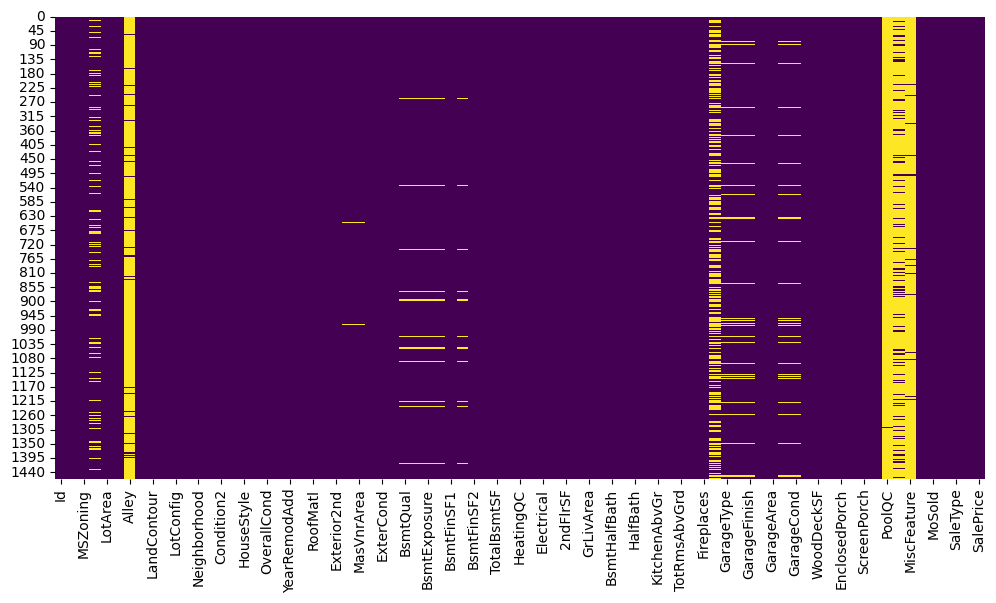

In [6]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

# Limpieza de datos:

Eliminar filas o columnas con valores faltantes dependiendo al caso:

In [7]:
df.drop('Alley', axis=1, inplace=True)
df.drop('PoolQC', axis=1, inplace=True)
df.drop('Fence', axis=1, inplace=True)
df.drop('MiscFeature', axis=1, inplace=True)

Imputar valores faltantes  reemplazarlos con la media o la moda, segun corresponda:

In [8]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)

Llenar con valores que corresponda:

In [9]:
df['MasVnrType'].fillna('None', inplace=True)
df['BsmtQual'].fillna('SinS', inplace=True)
df['BsmtCond'].fillna('SinS', inplace=True)
df['BsmtExposure'].fillna('SinS', inplace=True)
df['BsmtFinType1'].fillna('SinS', inplace=True)

In [10]:
df['MasVnrArea'].fillna('0', inplace=True)

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

# **2. Análisis y Tratamiento de Valores Atípicos.**

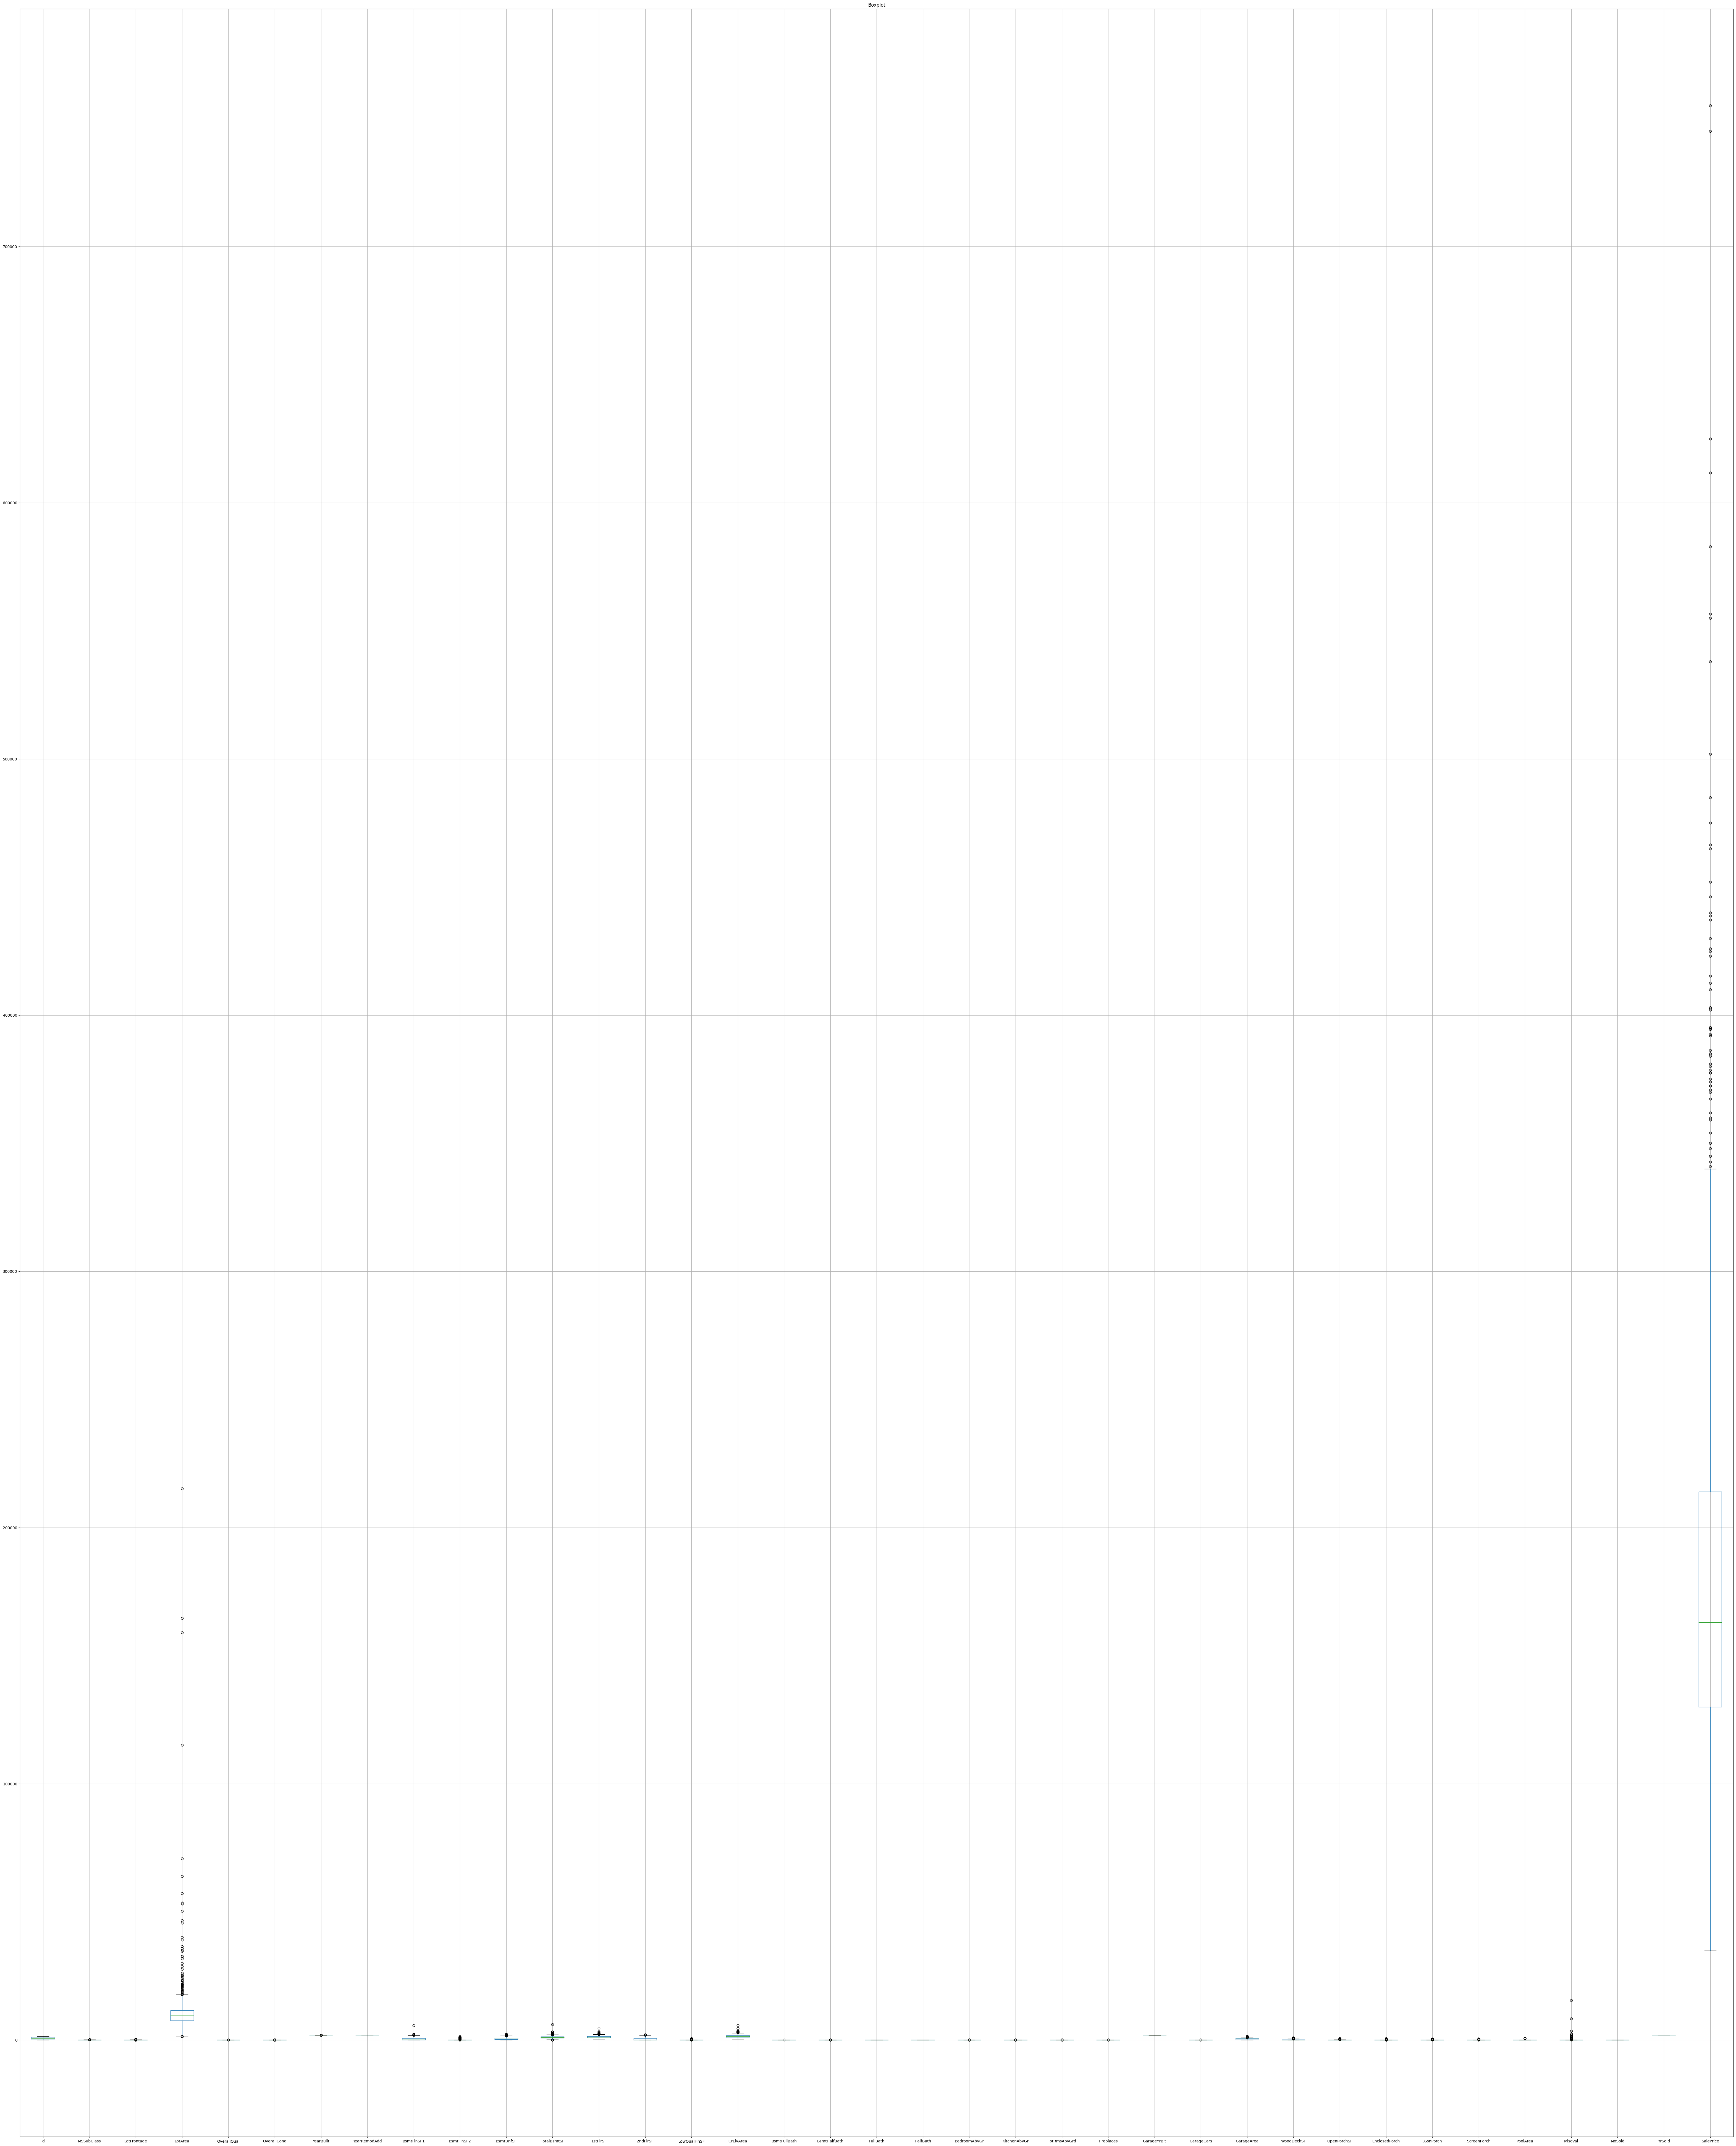

In [12]:
# Visualizar los valores A tipicos con boxplot
plt.figure(figsize=(80, 100))
df.boxplot()
plt.title('Boxplot')
plt.show()

#Eliminamos los  valores atípicos de MSSubClass

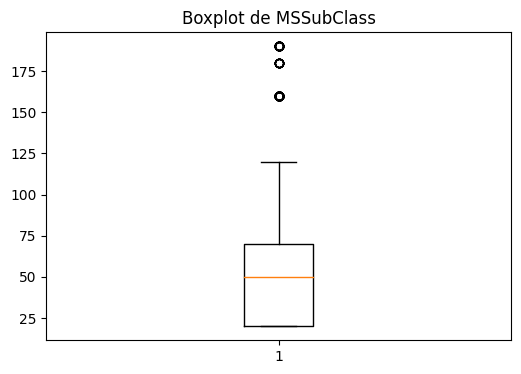

In [13]:
# Visualizar los datos con un boxplot
plt.figure(figsize=(6, 4))
plt.boxplot(df['MSSubClass'])
plt.title('Boxplot de MSSubClass')
plt.show()

In [14]:
# Calcular estadísticas descriptivas
mean = df['MSSubClass'].mean()
std = df['MSSubClass'].std()
# Definir un umbral para identificar valores atípicos (por ejemplo, 2 desviaciones estándar)
threshold = 2 * std
# Identificar valores atípicos
outliers = df[(df['MSSubClass'] - mean).abs() > threshold]
# Tratar valores atípicos (en este caso, reemplazarlos con NaN)
df.loc[(df['MSSubClass'] - mean).abs() > threshold, 'MSSubClass'] = np.nan

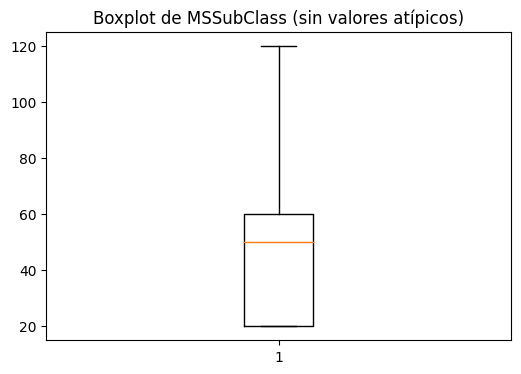

In [15]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['MSSubClass'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de MSSubClass (sin valores atípicos)')
plt.show()

#Eliminamos los  valores atípicos de LotFrontage

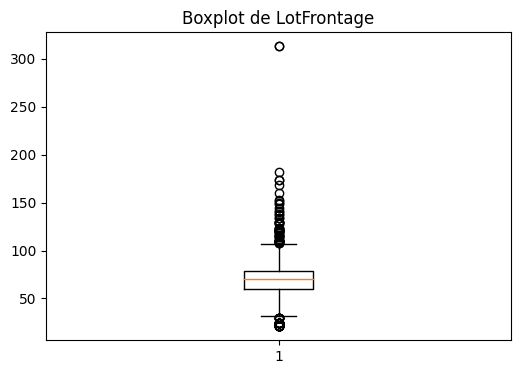

In [16]:
# Visualizar los datos con un boxplot
plt.figure(figsize=(6, 4))
plt.boxplot(df['LotFrontage'])
plt.title('Boxplot de LotFrontage')
plt.show()

In [17]:
# Calcular estadísticas descriptivas
mean = df['LotFrontage'].mean()
std = df['LotFrontage'].std()
# Definir un umbral para identificar valores atípicos (por ejemplo, 2 desviaciones estándar)
threshold = 2 * std
# Identificar valores atípicos
outliers = df[(df['LotFrontage'] - mean).abs() > threshold]
# Tratar valores atípicos (en este caso, reemplazarlos con NaN)
df.loc[(df['LotFrontage'] - mean).abs() > threshold, 'LotFrontage'] = np.nan

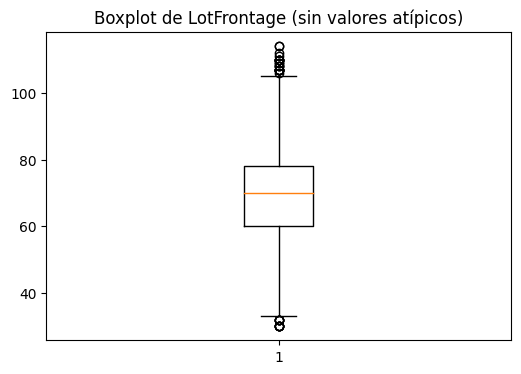

In [18]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['LotFrontage'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de LotFrontage (sin valores atípicos)')
plt.show()

#Eliminamos los  valores atípicos de LotArea

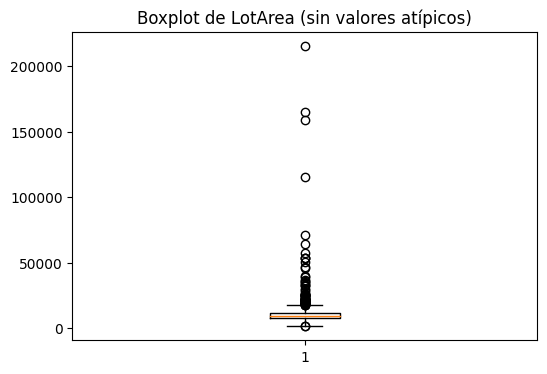

In [19]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['LotArea'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de LotArea (sin valores atípicos)')
plt.show()

In [20]:
# Calcular estadísticas descriptivas
mean = df['LotArea'].mean()
std = df['LotArea'].std()
# Definir un umbral para identificar valores atípicos (por ejemplo, 2 desviaciones estándar)
threshold = 2 * std
# Identificar valores atípicos
outliers = df[(df['LotArea'] - mean).abs() > threshold]
# Tratar valores atípicos (en este caso, reemplazarlos con NaN)
df.loc[(df['LotArea'] - mean).abs() > threshold, 'LotArea'] = np.nan

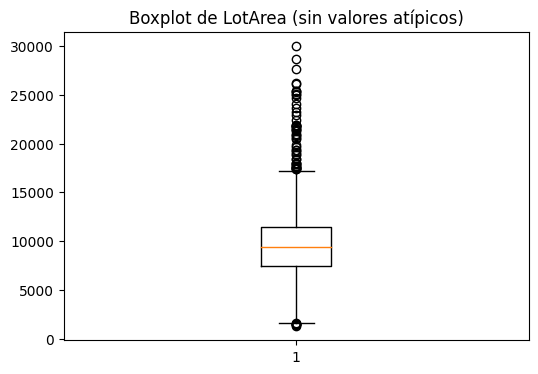

In [21]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['LotArea'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de LotArea (sin valores atípicos)')
plt.show()

#Eliminamos los  valores atípicos de OverallQual

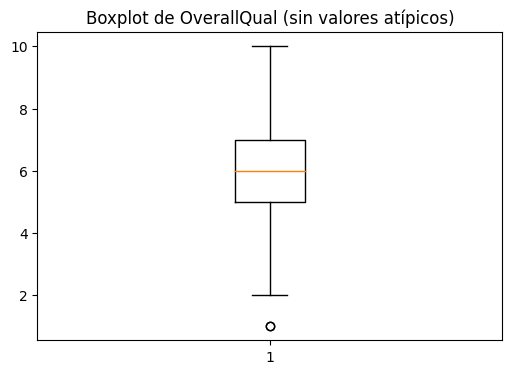

In [22]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['OverallQual'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de OverallQual (sin valores atípicos)')
plt.show()

In [23]:
# Calcular estadísticas descriptivas
mean = df['OverallQual'].mean()
std = df['OverallQual'].std()
# Definir un umbral para identificar valores atípicos (por ejemplo, 2 desviaciones estándar)
threshold = 2 * std
# Identificar valores atípicos
outliers = df[(df['OverallQual'] - mean).abs() > threshold]
# Tratar valores atípicos (en este caso, reemplazarlos con NaN)
df.loc[(df['OverallQual'] - mean).abs() > threshold, 'OverallQual'] = np.nan

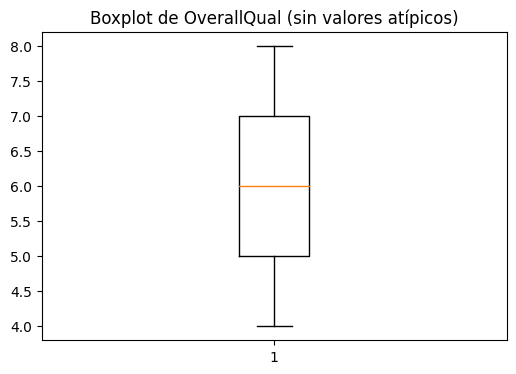

In [24]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['OverallQual'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de OverallQual (sin valores atípicos)')
plt.show()

#Eliminamos los  valores atípicos de OverallCond

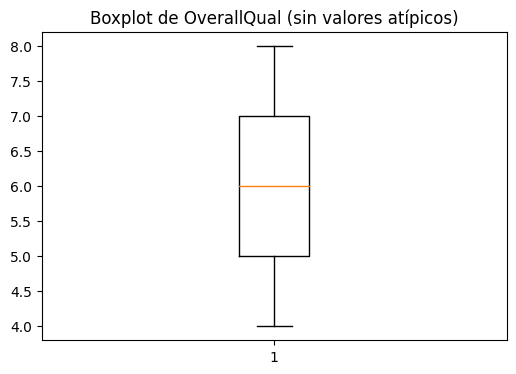

In [25]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['OverallQual'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de OverallQual (sin valores atípicos)')
plt.show()

In [26]:
# Calcular estadísticas descriptivas
mean = df['OverallCond'].mean()
std = df['OverallCond'].std()
# Definir un umbral para identificar valores atípicos (por ejemplo, 2 desviaciones estándar)
threshold = 2 * std
# Identificar valores atípicos
outliers = df[(df['OverallCond'] - mean).abs() > threshold]
# Tratar valores atípicos (en este caso, reemplazarlos con NaN)
df.loc[(df['OverallCond'] - mean).abs() > threshold, 'OverallCond'] = np.nan

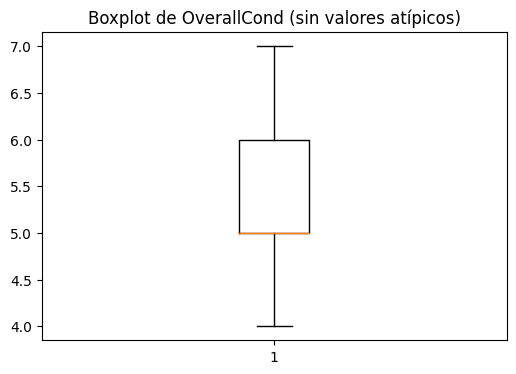

In [27]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['OverallCond'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de OverallCond (sin valores atípicos)')
plt.show()

#Eliminamos los  valores atípicos de YearBuilt

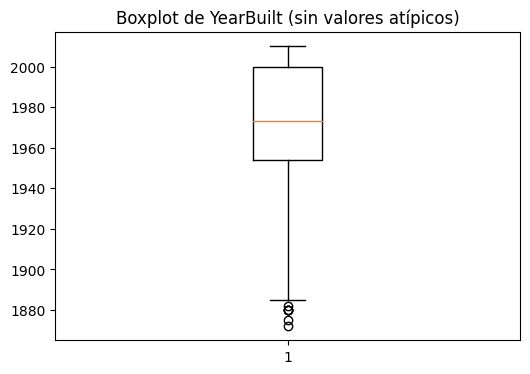

In [28]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['YearBuilt'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de YearBuilt (sin valores atípicos)')
plt.show()

In [29]:
# Calcular estadísticas descriptivas
mean = df['YearBuilt'].mean()
std = df['YearBuilt'].std()
# Definir un umbral para identificar valores atípicos (por ejemplo, 2 desviaciones estándar)
threshold = 2 * std
# Identificar valores atípicos
outliers = df[(df['YearBuilt'] - mean).abs() > threshold]
# Tratar valores atípicos (en este caso, reemplazarlos con NaN)
df.loc[(df['YearBuilt'] - mean).abs() > threshold, 'YearBuilt'] = np.nan

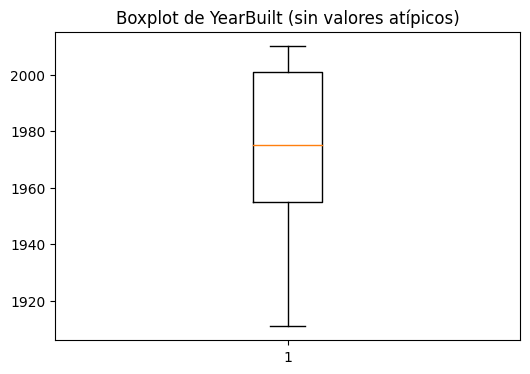

In [30]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['YearBuilt'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de YearBuilt (sin valores atípicos)')
plt.show()

#Eliminamos los  valores atípicos de BsmtFinSF1   

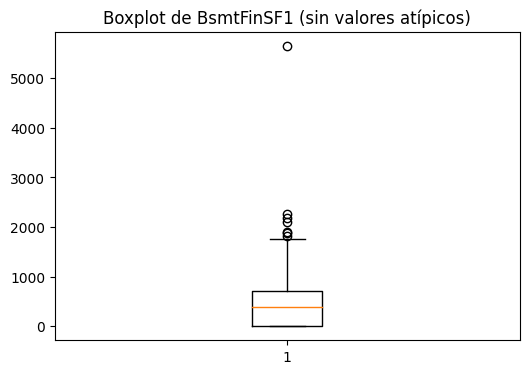

In [31]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['BsmtFinSF1'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de BsmtFinSF1 (sin valores atípicos)')
plt.show()

In [32]:
# Calcular estadísticas descriptivas
mean = df['BsmtFinSF1'].mean()
std = df['BsmtFinSF1'].std()
# Definir un umbral para identificar valores atípicos (por ejemplo, 2 desviaciones estándar)
threshold = 2 * std
# Identificar valores atípicos
outliers = df[(df['BsmtFinSF1'] - mean).abs() > threshold]
# Tratar valores atípicos (en este caso, reemplazarlos con NaN)
df.loc[(df['BsmtFinSF1'] - mean).abs() > threshold, 'BsmtFinSF1'] = np.nan

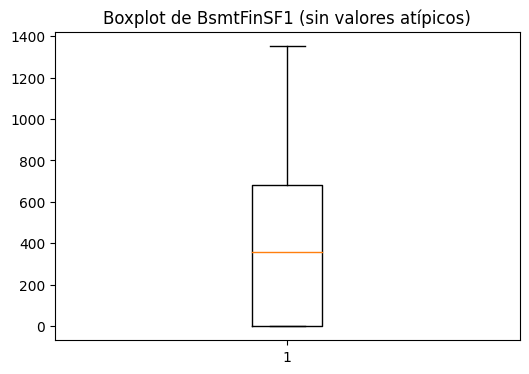

In [33]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['BsmtFinSF1'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de BsmtFinSF1 (sin valores atípicos)')
plt.show()

#Eliminamos los  valores atípicos de BsmtFinSF2   

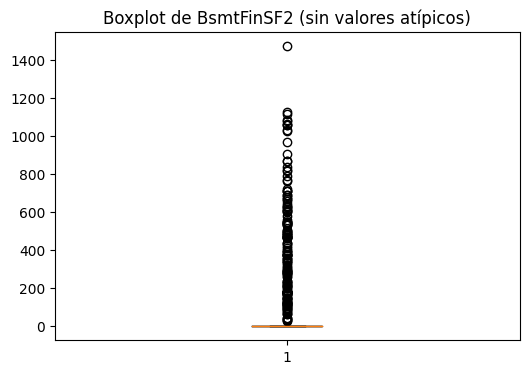

In [34]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['BsmtFinSF2'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de BsmtFinSF2 (sin valores atípicos)')
plt.show()

In [35]:
# Calcular estadísticas descriptivas
mean = df['BsmtFinSF2'].mean()
std = df['BsmtFinSF2'].std()
# Definir un umbral para identificar valores atípicos (por ejemplo, 2 desviaciones estándar)
threshold = 2 * std
# Identificar valores atípicos
outliers = df[(df['BsmtFinSF2'] - mean).abs() > threshold]
# Tratar valores atípicos (en este caso, reemplazarlos con NaN)
df.loc[(df['BsmtFinSF2'] - mean).abs() > threshold, 'BsmtFinSF2'] = np.nan

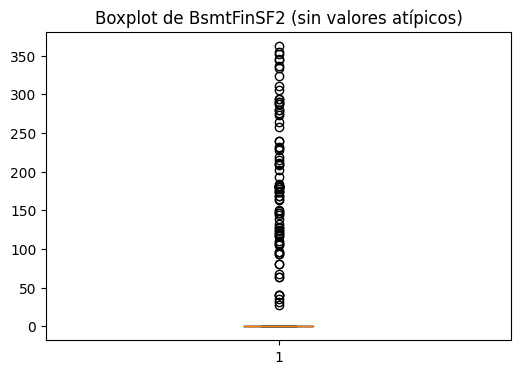

In [36]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['BsmtFinSF2'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de BsmtFinSF2 (sin valores atípicos)')
plt.show()

#Eliminamos los  valores atípicos de  BsmtUnfSF   

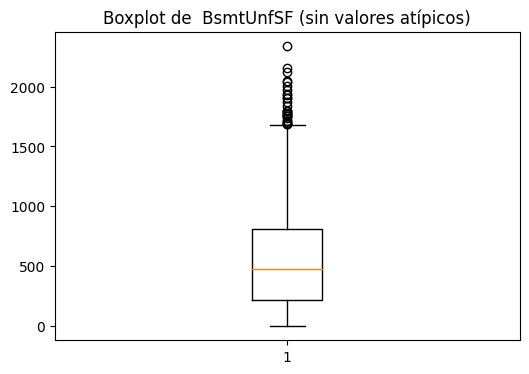

In [37]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['BsmtUnfSF'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de  BsmtUnfSF (sin valores atípicos)')
plt.show()

In [38]:
# Calcular estadísticas descriptivas
mean = df['BsmtUnfSF'].mean()
std = df['BsmtUnfSF'].std()
# Definir un umbral para identificar valores atípicos (por ejemplo, 2 desviaciones estándar)
threshold = 2 * std
# Identificar valores atípicos
outliers = df[(df['BsmtUnfSF'] - mean).abs() > threshold]
# Tratar valores atípicos (en este caso, reemplazarlos con NaN)
df.loc[(df['BsmtUnfSF'] - mean).abs() > threshold, 'BsmtUnfSF'] = np.nan

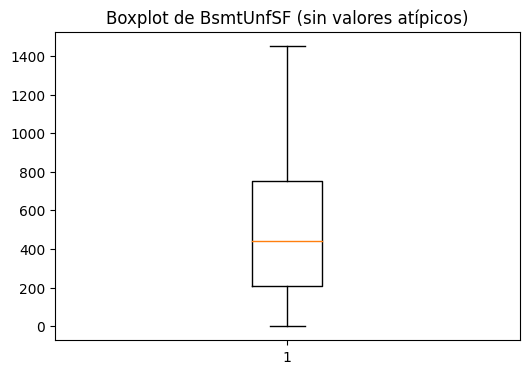

In [39]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['BsmtUnfSF'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de BsmtUnfSF (sin valores atípicos)')
plt.show()

#Eliminamos los  valores atípicos de TotalBsmtSF   

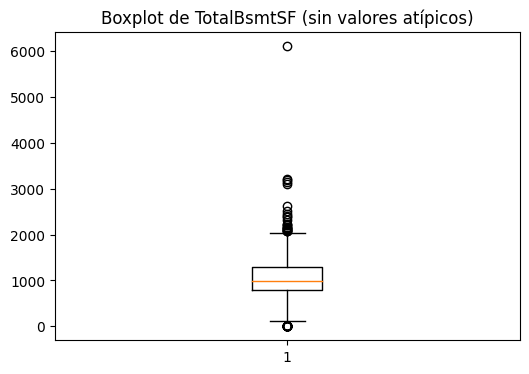

In [40]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['TotalBsmtSF'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de TotalBsmtSF (sin valores atípicos)')
plt.show()

In [41]:
# Calcular estadísticas descriptivas
mean = df['TotalBsmtSF'].mean()
std = df['TotalBsmtSF'].std()
# Definir un umbral para identificar valores atípicos (por ejemplo, 2 desviaciones estándar)
threshold = 2 * std
# Identificar valores atípicos
outliers = df[(df['TotalBsmtSF'] - mean).abs() > threshold]
# Tratar valores atípicos (en este caso, reemplazarlos con NaN)
df.loc[(df['TotalBsmtSF'] - mean).abs() > threshold, 'TotalBsmtSF'] = np.nan

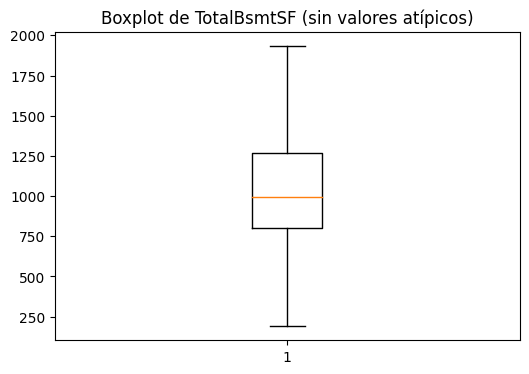

In [42]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['TotalBsmtSF'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de TotalBsmtSF (sin valores atípicos)')
plt.show()

#Eliminamos los  valores atípicos de 1stFlrSF   

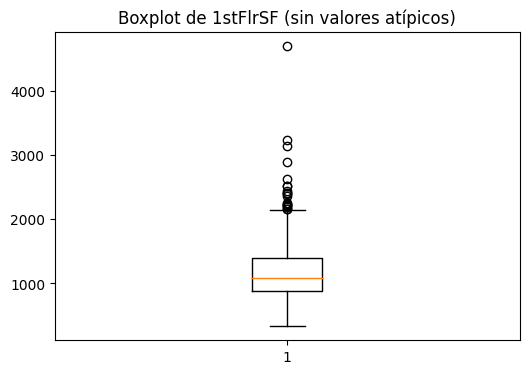

In [43]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['1stFlrSF'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de 1stFlrSF (sin valores atípicos)')
plt.show()

In [44]:
# Calcular estadísticas descriptivas
mean = df['1stFlrSF'].mean()
std = df['1stFlrSF'].std()
# Definir un umbral para identificar valores atípicos (por ejemplo, 2 desviaciones estándar)
threshold = 2 * std
# Identificar valores atípicos
outliers = df[(df['1stFlrSF'] - mean).abs() > threshold]
# Tratar valores atípicos (en este caso, reemplazarlos con NaN)
df.loc[(df['1stFlrSF'] - mean).abs() > threshold, '1stFlrSF'] = np.nan

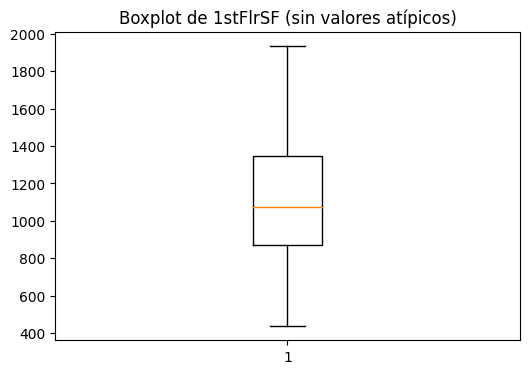

In [45]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['1stFlrSF'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de 1stFlrSF (sin valores atípicos)')
plt.show()

#Eliminamos los  valores atípicos de 2ndFlrSF   

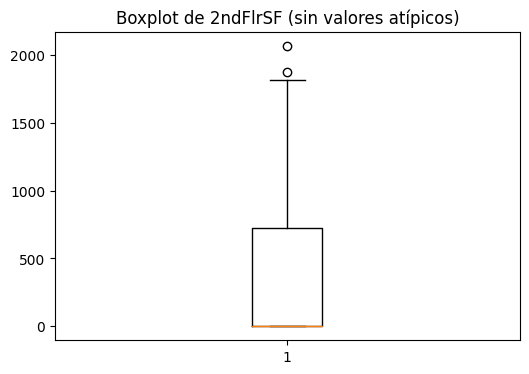

In [46]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['2ndFlrSF'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de 2ndFlrSF (sin valores atípicos)')
plt.show()

In [47]:
# Calcular estadísticas descriptivas
mean = df['2ndFlrSF'].mean()
std = df['2ndFlrSF'].std()
# Definir un umbral para identificar valores atípicos (por ejemplo, 2 desviaciones estándar)
threshold = 2 * std
# Identificar valores atípicos
outliers = df[(df['2ndFlrSF'] - mean).abs() > threshold]
# Tratar valores atípicos (en este caso, reemplazarlos con NaN)
df.loc[(df['2ndFlrSF'] - mean).abs() > threshold, '2ndFlrSF'] = np.nan

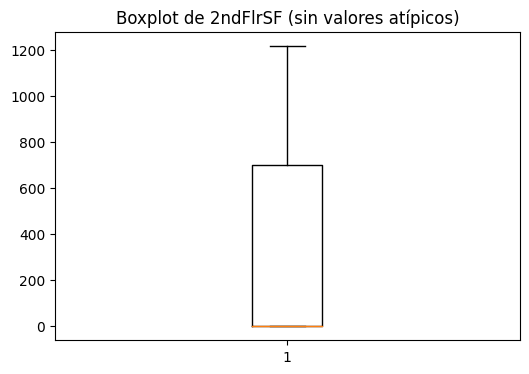

In [48]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['2ndFlrSF'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de 2ndFlrSF (sin valores atípicos)')
plt.show()

#Eliminamos los  valores atípicos de LowQualFinSF   

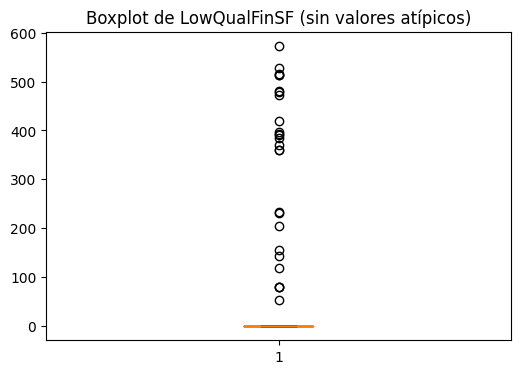

In [49]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['LowQualFinSF'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de LowQualFinSF (sin valores atípicos)')
plt.show()

In [50]:
# Calcular estadísticas descriptivas
mean = df['LowQualFinSF'].mean()
std = df['LowQualFinSF'].std()
# Definir un umbral para identificar valores atípicos (por ejemplo, 2 desviaciones estándar)
threshold = 2 * std
# Identificar valores atípicos
outliers = df[(df['LowQualFinSF'] - mean).abs() > threshold]
# Tratar valores atípicos (en este caso, reemplazarlos con NaN)
df.loc[(df['LowQualFinSF'] - mean).abs() > threshold, 'LowQualFinSF'] = np.nan

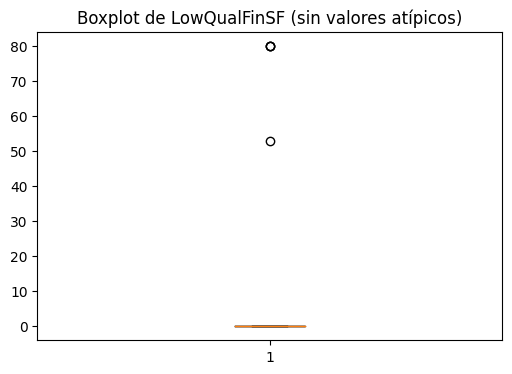

In [51]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['LowQualFinSF'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de LowQualFinSF (sin valores atípicos)')
plt.show()

#Eliminamos los  valores atípicos de GrLivArea   

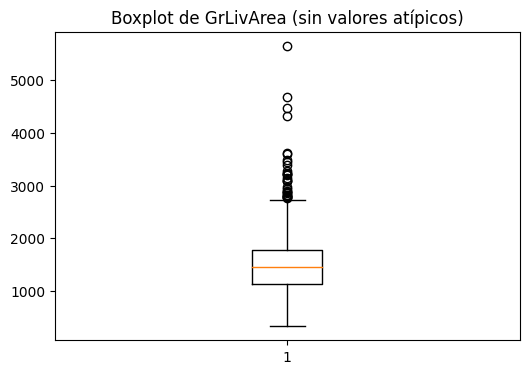

In [52]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['GrLivArea'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de GrLivArea (sin valores atípicos)')
plt.show()

In [53]:
# Calcular estadísticas descriptivas
mean = df['GrLivArea'].mean()
std = df['GrLivArea'].std()
# Definir un umbral para identificar valores atípicos (por ejemplo, 2 desviaciones estándar)
threshold = 2 * std
# Identificar valores atípicos
outliers = df[(df['GrLivArea'] - mean).abs() > threshold]
# Tratar valores atípicos (en este caso, reemplazarlos con NaN)
df.loc[(df['GrLivArea'] - mean).abs() > threshold, 'GrLivArea'] = np.nan

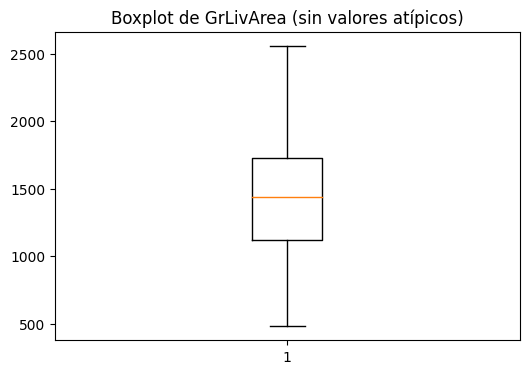

In [54]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['GrLivArea'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de GrLivArea (sin valores atípicos)')
plt.show()

#Eliminamos los  valores atípicos de BsmtFullBath   

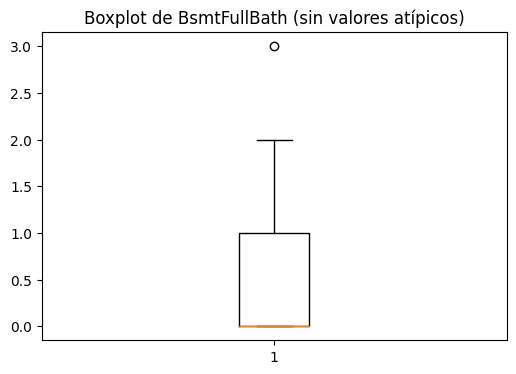

In [55]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['BsmtFullBath'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de BsmtFullBath (sin valores atípicos)')
plt.show()

In [56]:
# Calcular estadísticas descriptivas
mean = df['BsmtFullBath'].mean()
std = df['BsmtFullBath'].std()
# Definir un umbral para identificar valores atípicos (por ejemplo, 2 desviaciones estándar)
threshold = 2 * std
# Identificar valores atípicos
outliers = df[(df['BsmtFullBath'] - mean).abs() > threshold]
# Tratar valores atípicos (en este caso, reemplazarlos con NaN)
df.loc[(df['BsmtFullBath'] - mean).abs() > threshold, 'BsmtFullBath'] = np.nan

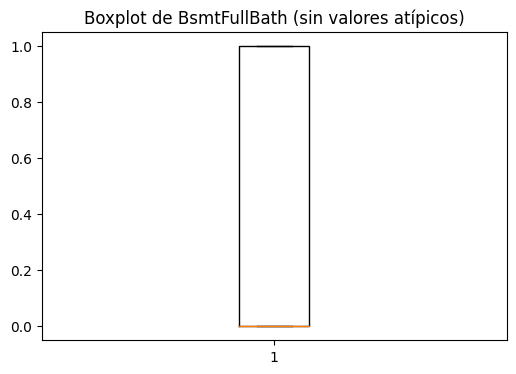

In [57]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['BsmtFullBath'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de BsmtFullBath (sin valores atípicos)')
plt.show()

#Eliminamos los  valores atípicos de BsmtHalfBath   

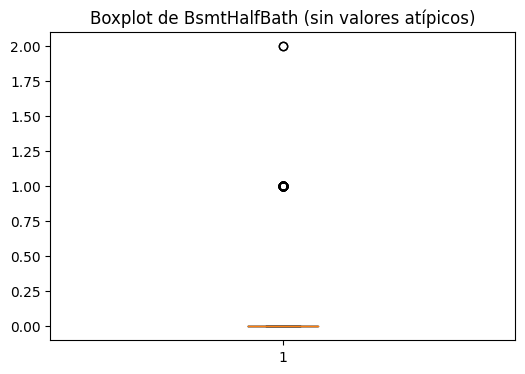

In [58]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['BsmtHalfBath'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de BsmtHalfBath (sin valores atípicos)')
plt.show()

In [59]:
# Calcular estadísticas descriptivas
mean = df['BsmtHalfBath'].mean()
std = df['BsmtHalfBath'].std()
# Definir un umbral para identificar valores atípicos (por ejemplo, 2 desviaciones estándar)
threshold = 2 * std
# Identificar valores atípicos
outliers = df[(df['BsmtHalfBath'] - mean).abs() > threshold]
# Tratar valores atípicos (en este caso, reemplazarlos con NaN)
df.loc[(df['BsmtHalfBath'] - mean).abs() > threshold, 'BsmtHalfBath'] = np.nan

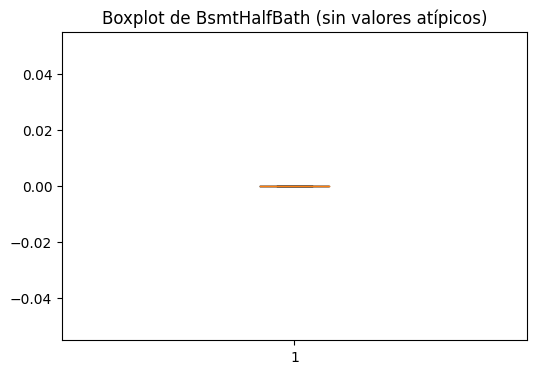

In [60]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['BsmtHalfBath'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de BsmtHalfBath (sin valores atípicos)')
plt.show()

#Eliminamos los  valores atípicos de FullBath   

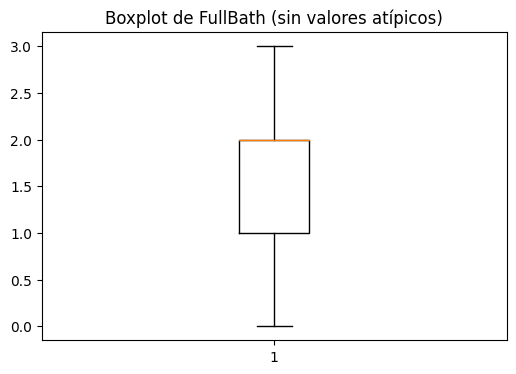

In [61]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['FullBath'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de FullBath (sin valores atípicos)')
plt.show()

In [62]:
# Calcular estadísticas descriptivas
mean = df['FullBath'].mean()
std = df['FullBath'].std()
# Definir un umbral para identificar valores atípicos (por ejemplo, 2 desviaciones estándar)
threshold = 2 * std
# Identificar valores atípicos
outliers = df[(df['FullBath'] - mean).abs() > threshold]
# Tratar valores atípicos (en este caso, reemplazarlos con NaN)
df.loc[(df['FullBath'] - mean).abs() > threshold, 'FullBath'] = np.nan

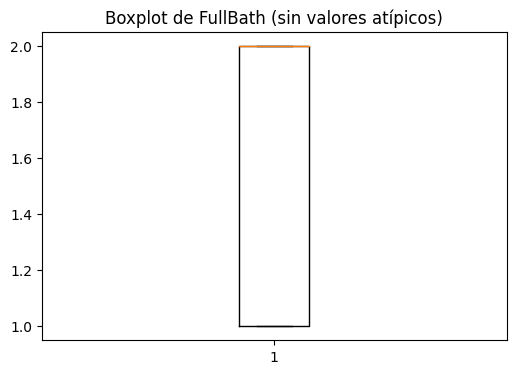

In [63]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['FullBath'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de FullBath (sin valores atípicos)')
plt.show()

#Eliminamos los  valores atípicos de HalfBath   

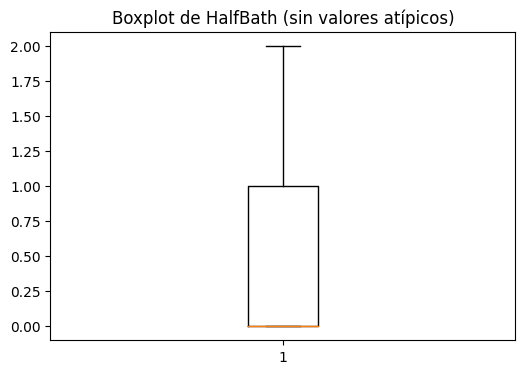

In [64]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['HalfBath'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de HalfBath (sin valores atípicos)')
plt.show()

In [65]:
# Calcular estadísticas descriptivas
mean = df['HalfBath'].mean()
std = df['HalfBath'].std()
# Definir un umbral para identificar valores atípicos (por ejemplo, 2 desviaciones estándar)
threshold = 2 * std
# Identificar valores atípicos
outliers = df[(df['HalfBath'] - mean).abs() > threshold]
# Tratar valores atípicos (en este caso, reemplazarlos con NaN)
df.loc[(df['HalfBath'] - mean).abs() > threshold, 'HalfBath'] = np.nan

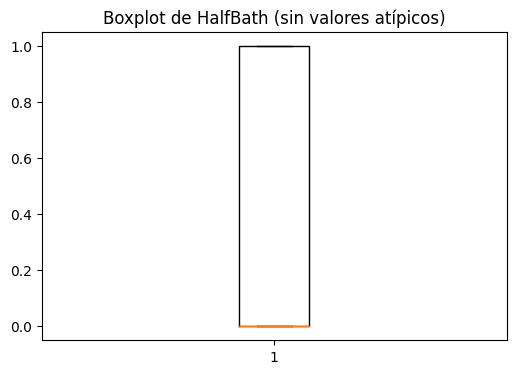

In [66]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['HalfBath'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de HalfBath (sin valores atípicos)')
plt.show()

#Eliminamos los  valores atípicos de BedroomAbvGr   

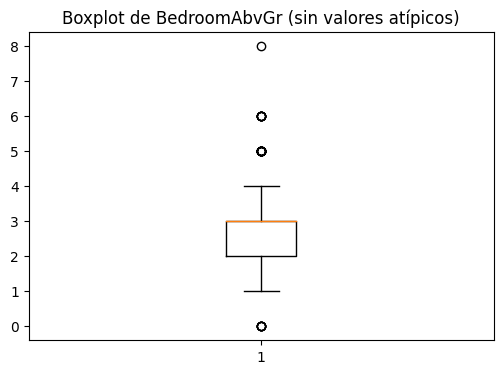

In [67]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['BedroomAbvGr'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de BedroomAbvGr (sin valores atípicos)')
plt.show()

In [68]:
# Calcular estadísticas descriptivas
mean = df['BedroomAbvGr'].mean()
std = df['BedroomAbvGr'].std()
# Definir un umbral para identificar valores atípicos (por ejemplo, 2 desviaciones estándar)
threshold = 2 * std
# Identificar valores atípicos
outliers = df[(df['BedroomAbvGr'] - mean).abs() > threshold]
# Tratar valores atípicos (en este caso, reemplazarlos con NaN)
df.loc[(df['BedroomAbvGr'] - mean).abs() > threshold, 'BedroomAbvGr'] = np.nan

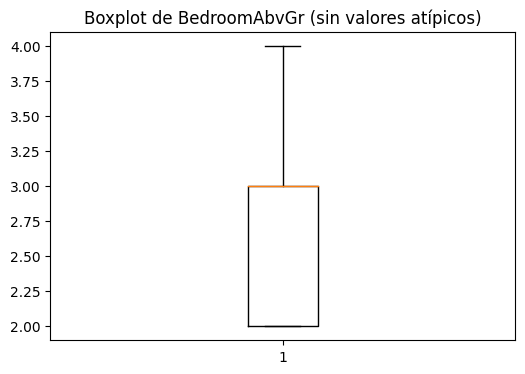

In [69]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['BedroomAbvGr'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de BedroomAbvGr (sin valores atípicos)')
plt.show()

#Eliminamos los  valores atípicos de KitchenAbvGr   

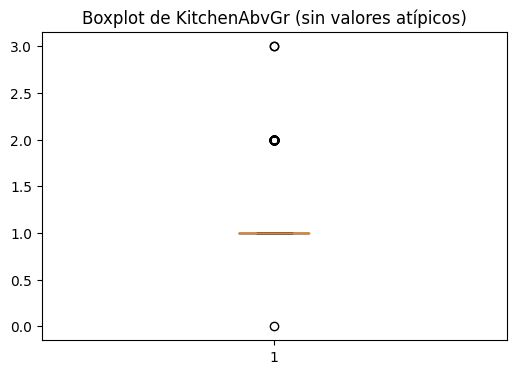

In [70]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['KitchenAbvGr'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de KitchenAbvGr (sin valores atípicos)')
plt.show()

In [71]:
# Calcular estadísticas descriptivas
mean = df['KitchenAbvGr'].mean()
std = df['KitchenAbvGr'].std()
# Definir un umbral para identificar valores atípicos (por ejemplo, 2 desviaciones estándar)
threshold = 2 * std
# Identificar valores atípicos
outliers = df[(df['KitchenAbvGr'] - mean).abs() > threshold]
# Tratar valores atípicos (en este caso, reemplazarlos con NaN)
df.loc[(df['KitchenAbvGr'] - mean).abs() > threshold, 'KitchenAbvGr'] = np.nan

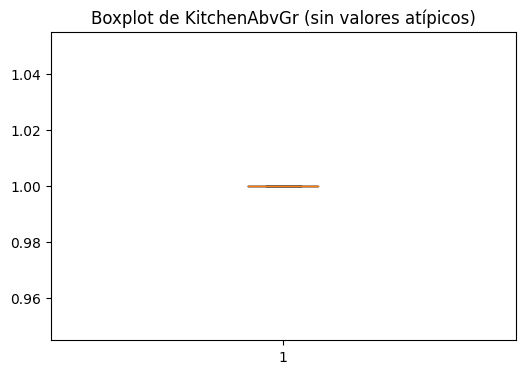

In [72]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['KitchenAbvGr'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de KitchenAbvGr (sin valores atípicos)')
plt.show()

#Eliminamos los  valores atípicos de TotRmsAbvGrd   

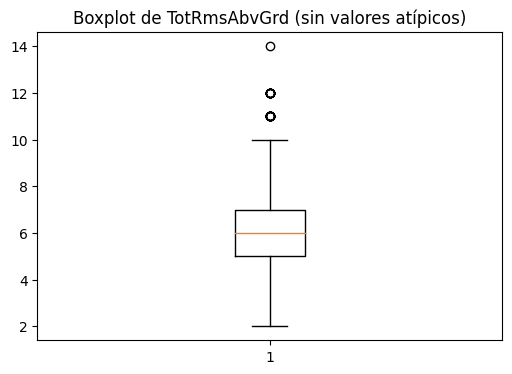

In [73]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['TotRmsAbvGrd'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de TotRmsAbvGrd (sin valores atípicos)')
plt.show()

In [74]:
# Calcular estadísticas descriptivas
mean = df['TotRmsAbvGrd'].mean()
std = df['TotRmsAbvGrd'].std()
# Definir un umbral para identificar valores atípicos (por ejemplo, 2 desviaciones estándar)
threshold = 2 * std
# Identificar valores atípicos
outliers = df[(df['TotRmsAbvGrd'] - mean).abs() > threshold]
# Tratar valores atípicos (en este caso, reemplazarlos con NaN)
df.loc[(df['TotRmsAbvGrd'] - mean).abs() > threshold, 'TotRmsAbvGrd'] = np.nan

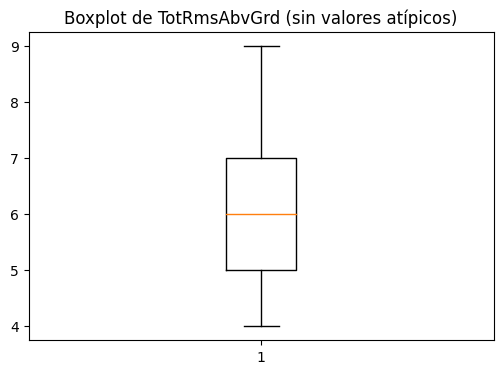

In [75]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['TotRmsAbvGrd'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de TotRmsAbvGrd (sin valores atípicos)')
plt.show()

#Eliminamos los  valores atípicos de Fireplaces   

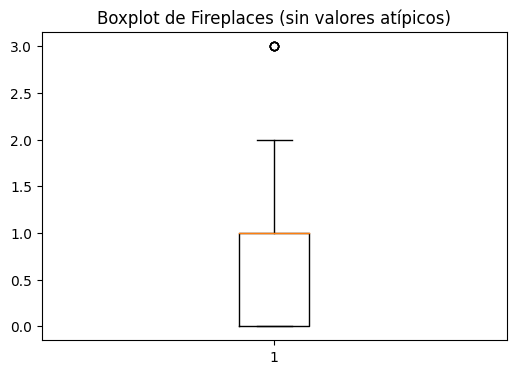

In [76]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['Fireplaces'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de Fireplaces (sin valores atípicos)')
plt.show()

In [77]:
# Calcular estadísticas descriptivas
mean = df['Fireplaces'].mean()
std = df['Fireplaces'].std()
# Definir un umbral para identificar valores atípicos (por ejemplo, 2 desviaciones estándar)
threshold = 2 * std
# Identificar valores atípicos
outliers = df[(df['Fireplaces'] - mean).abs() > threshold]
# Tratar valores atípicos (en este caso, reemplazarlos con NaN)
df.loc[(df['Fireplaces'] - mean).abs() > threshold, 'Fireplaces'] = np.nan

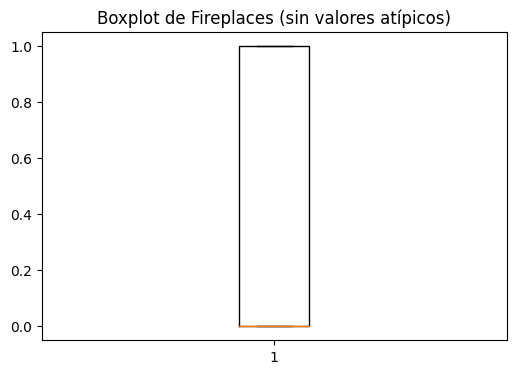

In [78]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['Fireplaces'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de Fireplaces (sin valores atípicos)')
plt.show()

#Eliminamos los  valores atípicos de GarageYrBlt   

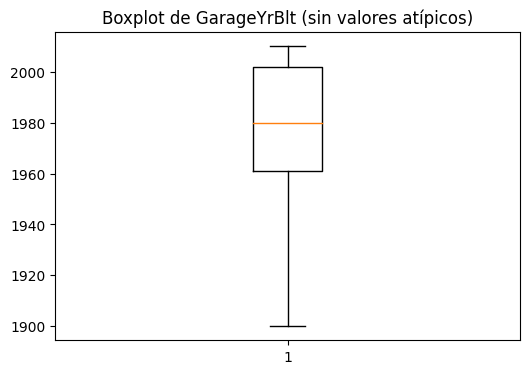

In [79]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['GarageYrBlt'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de GarageYrBlt (sin valores atípicos)')
plt.show()

In [80]:
# Calcular estadísticas descriptivas
mean = df['GarageYrBlt'].mean()
std = df['GarageYrBlt'].std()
# Definir un umbral para identificar valores atípicos (por ejemplo, 2 desviaciones estándar)
threshold = 2 * std
# Identificar valores atípicos
outliers = df[(df['GarageYrBlt'] - mean).abs() > threshold]
# Tratar valores atípicos (en este caso, reemplazarlos con NaN)
df.loc[(df['GarageYrBlt'] - mean).abs() > threshold, 'GarageYrBlt'] = np.nan

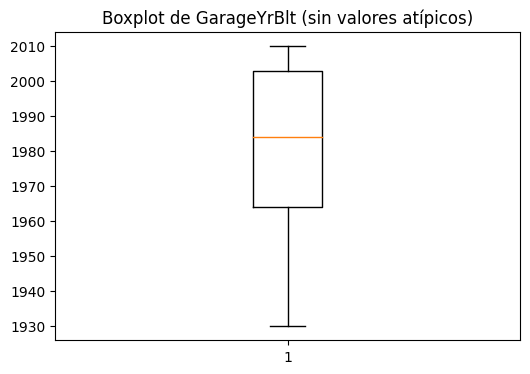

In [81]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['GarageYrBlt'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de GarageYrBlt (sin valores atípicos)')
plt.show()

#Eliminamos los  valores atípicos de GarageCars   

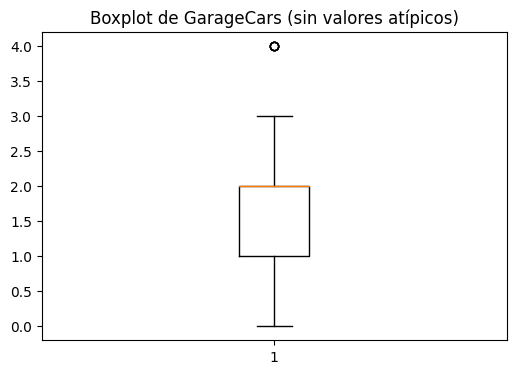

In [82]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['GarageCars'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de GarageCars (sin valores atípicos)')
plt.show()

In [83]:
# Calcular estadísticas descriptivas
mean = df['GarageCars'].mean()
std = df['GarageCars'].std()
# Definir un umbral para identificar valores atípicos (por ejemplo, 2 desviaciones estándar)
threshold = 2 * std
# Identificar valores atípicos
outliers = df[(df['GarageCars'] - mean).abs() > threshold]
# Tratar valores atípicos (en este caso, reemplazarlos con NaN)
df.loc[(df['GarageCars'] - mean).abs() > threshold, 'GarageCars'] = np.nan

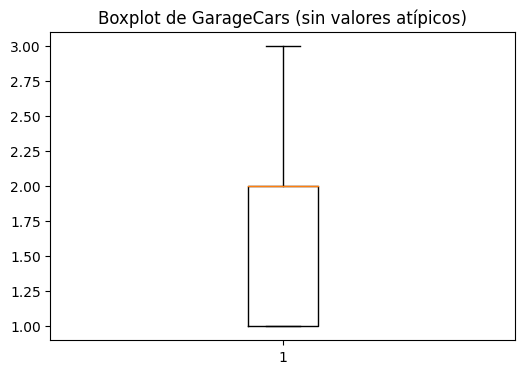

In [84]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['GarageCars'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de GarageCars (sin valores atípicos)')
plt.show()

#Eliminamos los  valores atípicos de GarageArea   

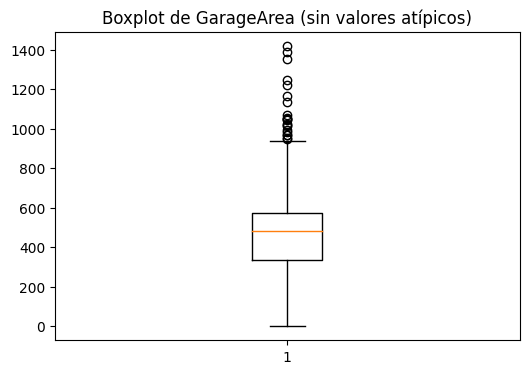

In [85]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['GarageArea'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de GarageArea (sin valores atípicos)')
plt.show()

In [86]:
# Calcular estadísticas descriptivas
mean = df['GarageArea'].mean()
std = df['GarageArea'].std()
# Definir un umbral para identificar valores atípicos (por ejemplo, 2 desviaciones estándar)
threshold = 2 * std
# Identificar valores atípicos
outliers = df[(df['GarageArea'] - mean).abs() > threshold]
# Tratar valores atípicos (en este caso, reemplazarlos con NaN)
df.loc[(df['GarageArea'] - mean).abs() > threshold, 'GarageArea'] = np.nan

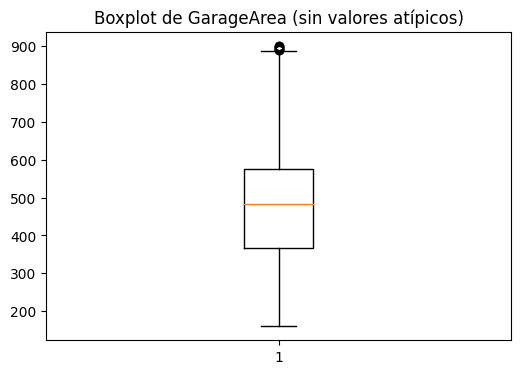

In [87]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['GarageArea'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de GarageArea (sin valores atípicos)')
plt.show()

#Eliminamos los  valores atípicos de WoodDeckSF   

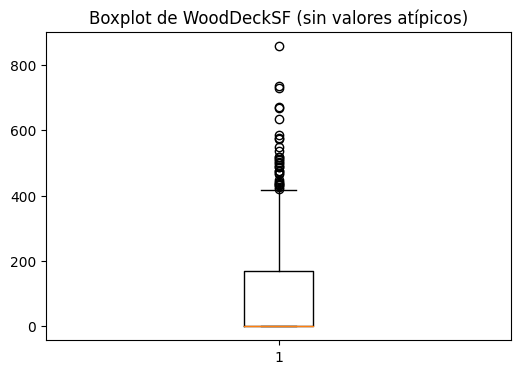

In [88]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['WoodDeckSF'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de WoodDeckSF (sin valores atípicos)')
plt.show()

In [89]:
# Calcular estadísticas descriptivas
mean = df['WoodDeckSF'].mean()
std = df['WoodDeckSF'].std()
# Definir un umbral para identificar valores atípicos (por ejemplo, 2 desviaciones estándar)
threshold = 2 * std
# Identificar valores atípicos
outliers = df[(df['WoodDeckSF'] - mean).abs() > threshold]
# Tratar valores atípicos (en este caso, reemplazarlos con NaN)
df.loc[(df['WoodDeckSF'] - mean).abs() > threshold, 'WoodDeckSF'] = np.nan

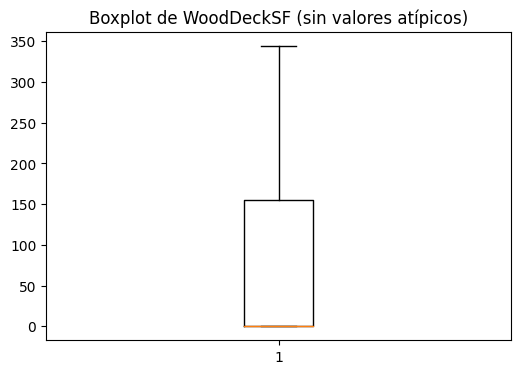

In [90]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['WoodDeckSF'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de WoodDeckSF (sin valores atípicos)')
plt.show()

#Eliminamos los  valores atípicos de OpenPorchSF   

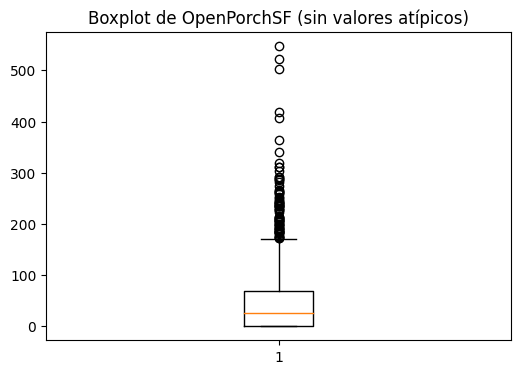

In [91]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['OpenPorchSF'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de OpenPorchSF (sin valores atípicos)')
plt.show()

In [92]:
# Calcular estadísticas descriptivas
mean = df['OpenPorchSF'].mean()
std = df['OpenPorchSF'].std()
# Definir un umbral para identificar valores atípicos (por ejemplo, 2 desviaciones estándar)
threshold = 2 * std
# Identificar valores atípicos
outliers = df[(df['OpenPorchSF'] - mean).abs() > threshold]
# Tratar valores atípicos (en este caso, reemplazarlos con NaN)
df.loc[(df['OpenPorchSF'] - mean).abs() > threshold, 'OpenPorchSF'] = np.nan

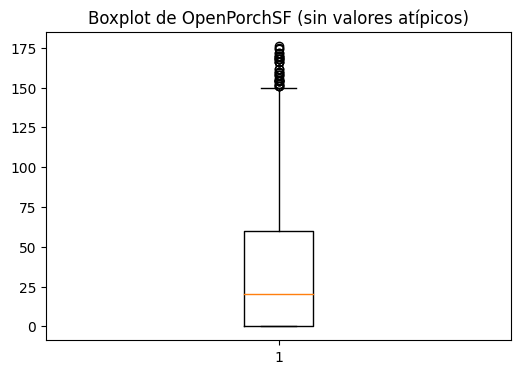

In [93]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['OpenPorchSF'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de OpenPorchSF (sin valores atípicos)')
plt.show()

#Eliminamos los  valores atípicos de EnclosedPorch   

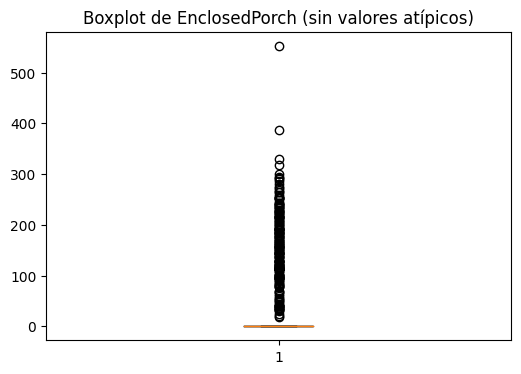

In [94]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['EnclosedPorch'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de EnclosedPorch (sin valores atípicos)')
plt.show()

In [95]:
# Calcular estadísticas descriptivas
mean = df['EnclosedPorch'].mean()
std = df['EnclosedPorch'].std()
# Definir un umbral para identificar valores atípicos (por ejemplo, 2 desviaciones estándar)
threshold = 2 * std
# Identificar valores atípicos
outliers = df[(df['EnclosedPorch'] - mean).abs() > threshold]
# Tratar valores atípicos (en este caso, reemplazarlos con NaN)
df.loc[(df['EnclosedPorch'] - mean).abs() > threshold, 'EnclosedPorch'] = np.nan

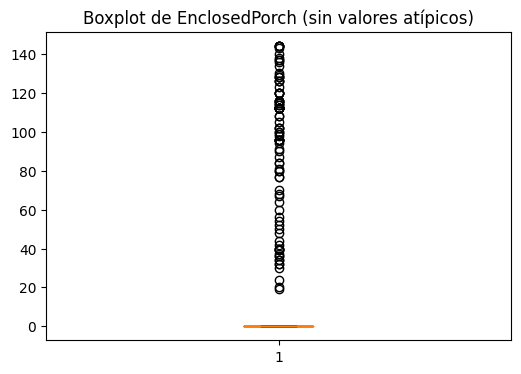

In [96]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['EnclosedPorch'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de EnclosedPorch (sin valores atípicos)')
plt.show()

#Eliminamos los  valores atípicos de 3SsnPorch   

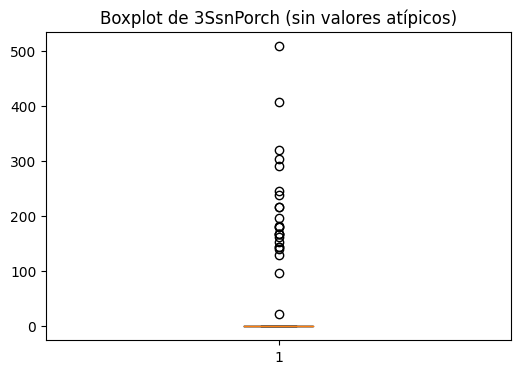

In [97]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['3SsnPorch'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de 3SsnPorch (sin valores atípicos)')
plt.show()

In [98]:
# Calcular estadísticas descriptivas
mean = df['3SsnPorch'].mean()
std = df['3SsnPorch'].std()
# Definir un umbral para identificar valores atípicos (por ejemplo, 2 desviaciones estándar)
threshold = 2 * std
# Identificar valores atípicos
outliers = df[(df['3SsnPorch'] - mean).abs() > threshold]
# Tratar valores atípicos (en este caso, reemplazarlos con NaN)
df.loc[(df['3SsnPorch'] - mean).abs() > threshold, '3SsnPorch'] = np.nan

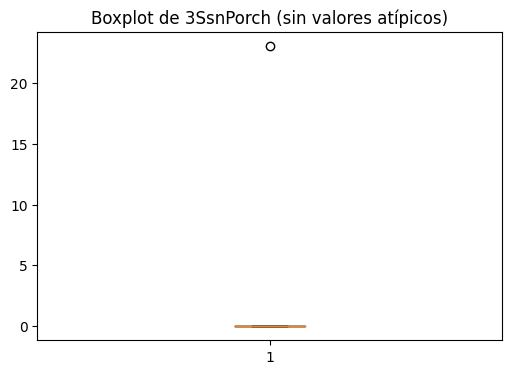

In [99]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['3SsnPorch'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de 3SsnPorch (sin valores atípicos)')
plt.show()

#Eliminamos los  valores atípicos de ScreenPorch   

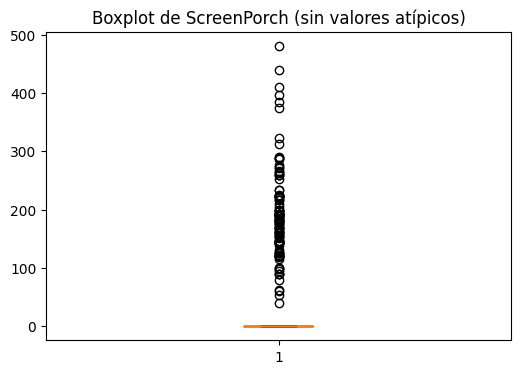

In [100]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['ScreenPorch'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de ScreenPorch (sin valores atípicos)')
plt.show()

In [101]:
# Calcular estadísticas descriptivas
mean = df['ScreenPorch'].mean()
std = df['ScreenPorch'].std()
# Definir un umbral para identificar valores atípicos (por ejemplo, 2 desviaciones estándar)
threshold = 2 * std
# Identificar valores atípicos
outliers = df[(df['ScreenPorch'] - mean).abs() > threshold]
# Tratar valores atípicos (en este caso, reemplazarlos con NaN)
df.loc[(df['ScreenPorch'] - mean).abs() > threshold, 'ScreenPorch'] = np.nan

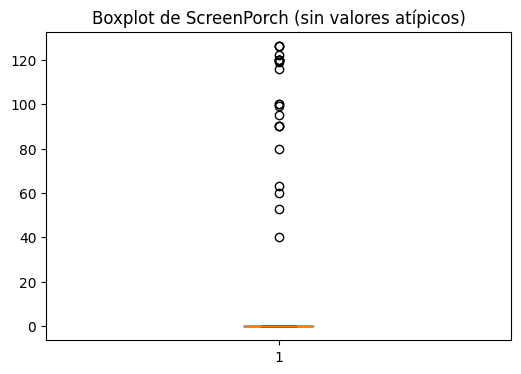

In [102]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['ScreenPorch'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de ScreenPorch (sin valores atípicos)')
plt.show()

#Eliminamos los  valores atípicos de PoolArea   

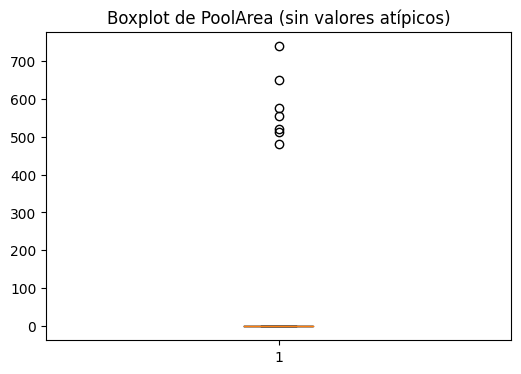

In [103]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['PoolArea'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de PoolArea (sin valores atípicos)')
plt.show()

In [104]:
# Calcular estadísticas descriptivas
mean = df['PoolArea'].mean()
std = df['PoolArea'].std()
# Definir un umbral para identificar valores atípicos (por ejemplo, 2 desviaciones estándar)
threshold = 2 * std
# Identificar valores atípicos
outliers = df[(df['PoolArea'] - mean).abs() > threshold]
# Tratar valores atípicos (en este caso, reemplazarlos con NaN)
df.loc[(df['PoolArea'] - mean).abs() > threshold, 'PoolArea'] = np.nan

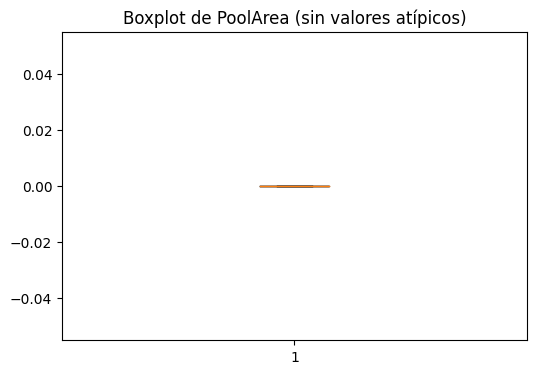

In [105]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['PoolArea'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de PoolArea (sin valores atípicos)')
plt.show()

#Eliminamos los  valores atípicos de MiscVal   

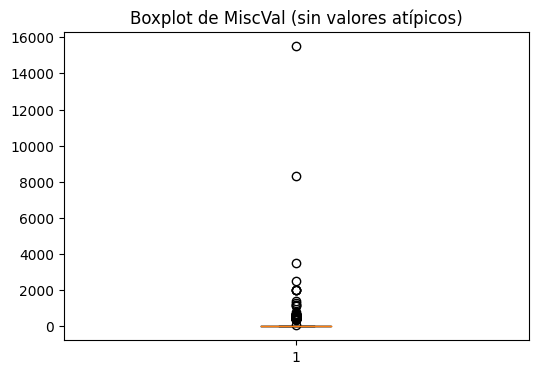

In [106]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['MiscVal'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de MiscVal (sin valores atípicos)')
plt.show()

In [107]:
# Calcular estadísticas descriptivas
mean = df['MiscVal'].mean()
std = df['MiscVal'].std()
# Definir un umbral para identificar valores atípicos (por ejemplo, 2 desviaciones estándar)
threshold = 2 * std
# Identificar valores atípicos
outliers = df[(df['MiscVal'] - mean).abs() > threshold]
# Tratar valores atípicos (en este caso, reemplazarlos con NaN)
df.loc[(df['MiscVal'] - mean).abs() > threshold, 'MiscVal'] = np.nan

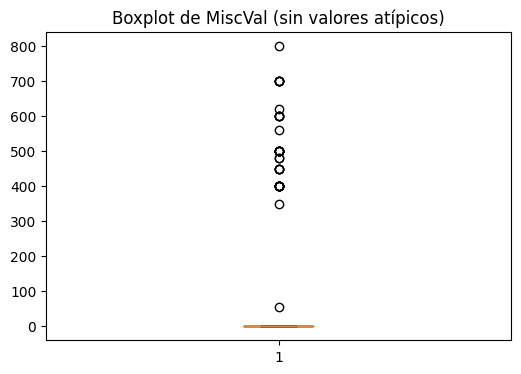

In [108]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['MiscVal'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de MiscVal (sin valores atípicos)')
plt.show()

#Eliminamos los  valores atípicos de MoSold   

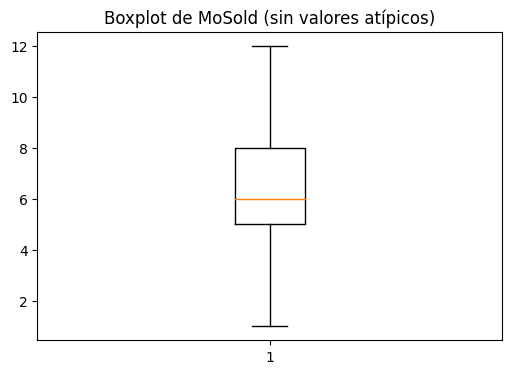

In [109]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['MoSold'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de MoSold (sin valores atípicos)')
plt.show()

In [110]:
# Calcular estadísticas descriptivas
mean = df['MoSold'].mean()
std = df['MoSold'].std()
# Definir un umbral para identificar valores atípicos (por ejemplo, 2 desviaciones estándar)
threshold = 2 * std
# Identificar valores atípicos
outliers = df[(df['MoSold'] - mean).abs() > threshold]
# Tratar valores atípicos (en este caso, reemplazarlos con NaN)
df.loc[(df['MoSold'] - mean).abs() > threshold, 'MoSold'] = np.nan

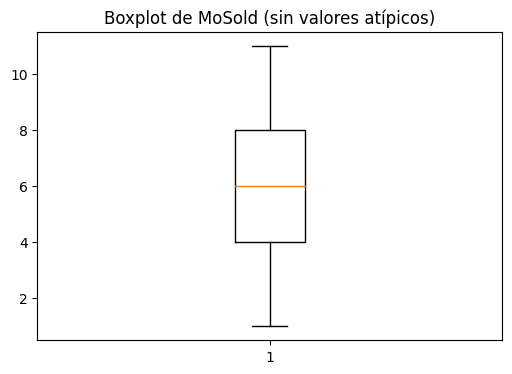

In [111]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['MoSold'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de MoSold (sin valores atípicos)')
plt.show()

#Eliminamos los  valores atípicos de YrSold   

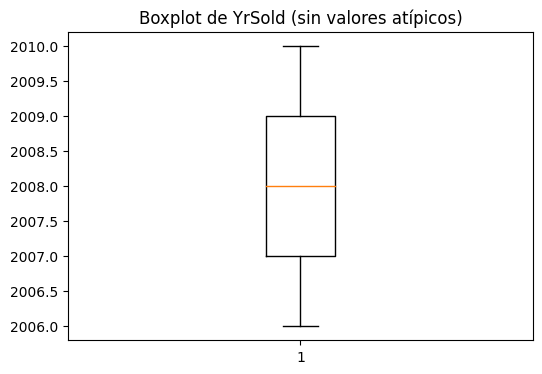

In [112]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['YrSold'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de YrSold (sin valores atípicos)')
plt.show()

In [113]:
# Calcular estadísticas descriptivas
mean = df['YrSold'].mean()
std = df['YrSold'].std()
# Definir un umbral para identificar valores atípicos (por ejemplo, 2 desviaciones estándar)
threshold = 2 * std
# Identificar valores atípicos
outliers = df[(df['YrSold'] - mean).abs() > threshold]
# Tratar valores atípicos (en este caso, reemplazarlos con NaN)
df.loc[(df['YrSold'] - mean).abs() > threshold, 'YrSold'] = np.nan

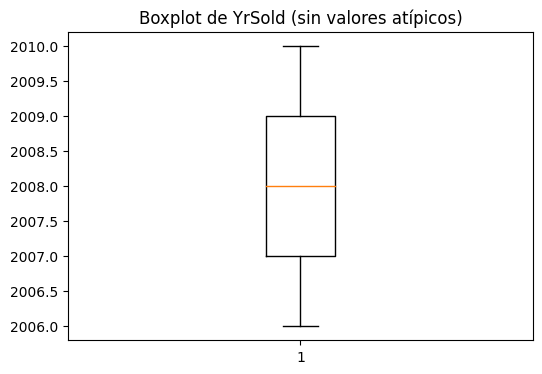

In [114]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['YrSold'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de YrSold (sin valores atípicos)')
plt.show()

#Eliminamos los  valores atípicos de SalePrice   

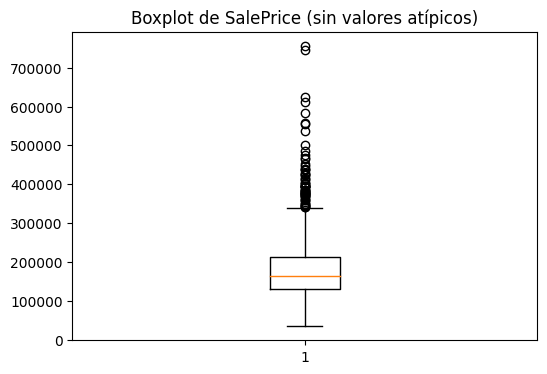

In [115]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['SalePrice'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de SalePrice (sin valores atípicos)')
plt.show()

In [116]:
# Calcular estadísticas descriptivas
mean = df['SalePrice'].mean()
std = df['SalePrice'].std()
# Definir un umbral para identificar valores atípicos (por ejemplo, 2 desviaciones estándar)
threshold = 2 * std
# Identificar valores atípicos
outliers = df[(df['SalePrice'] - mean).abs() > threshold]
# Tratar valores atípicos (en este caso, reemplazarlos con NaN)
df.loc[(df['SalePrice'] - mean).abs() > threshold, 'SalePrice'] = np.nan

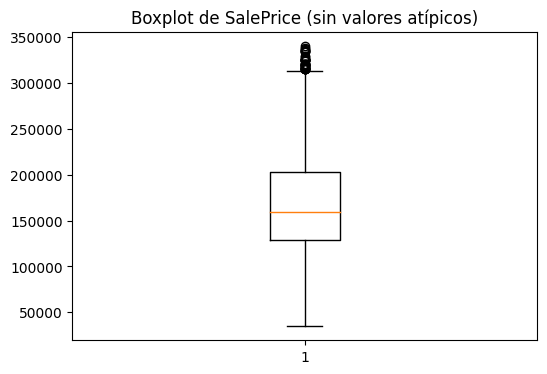

In [117]:
# Visualizar los datos después del tratamiento
plt.figure(figsize=(6, 4))
plt.boxplot(df['SalePrice'].dropna())  # Eliminar NaN para la visualización
plt.title('Boxplot de SalePrice (sin valores atípicos)')
plt.show()

##Verificamos que ya no tengan datos faltantes

In [118]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1357 non-null   float64
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1375 non-null   float64
 4   LotArea        1438 non-null   float64
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1374 non-null   float64
 17  OverallCond    1335 non-null   float64
 18  YearBuil

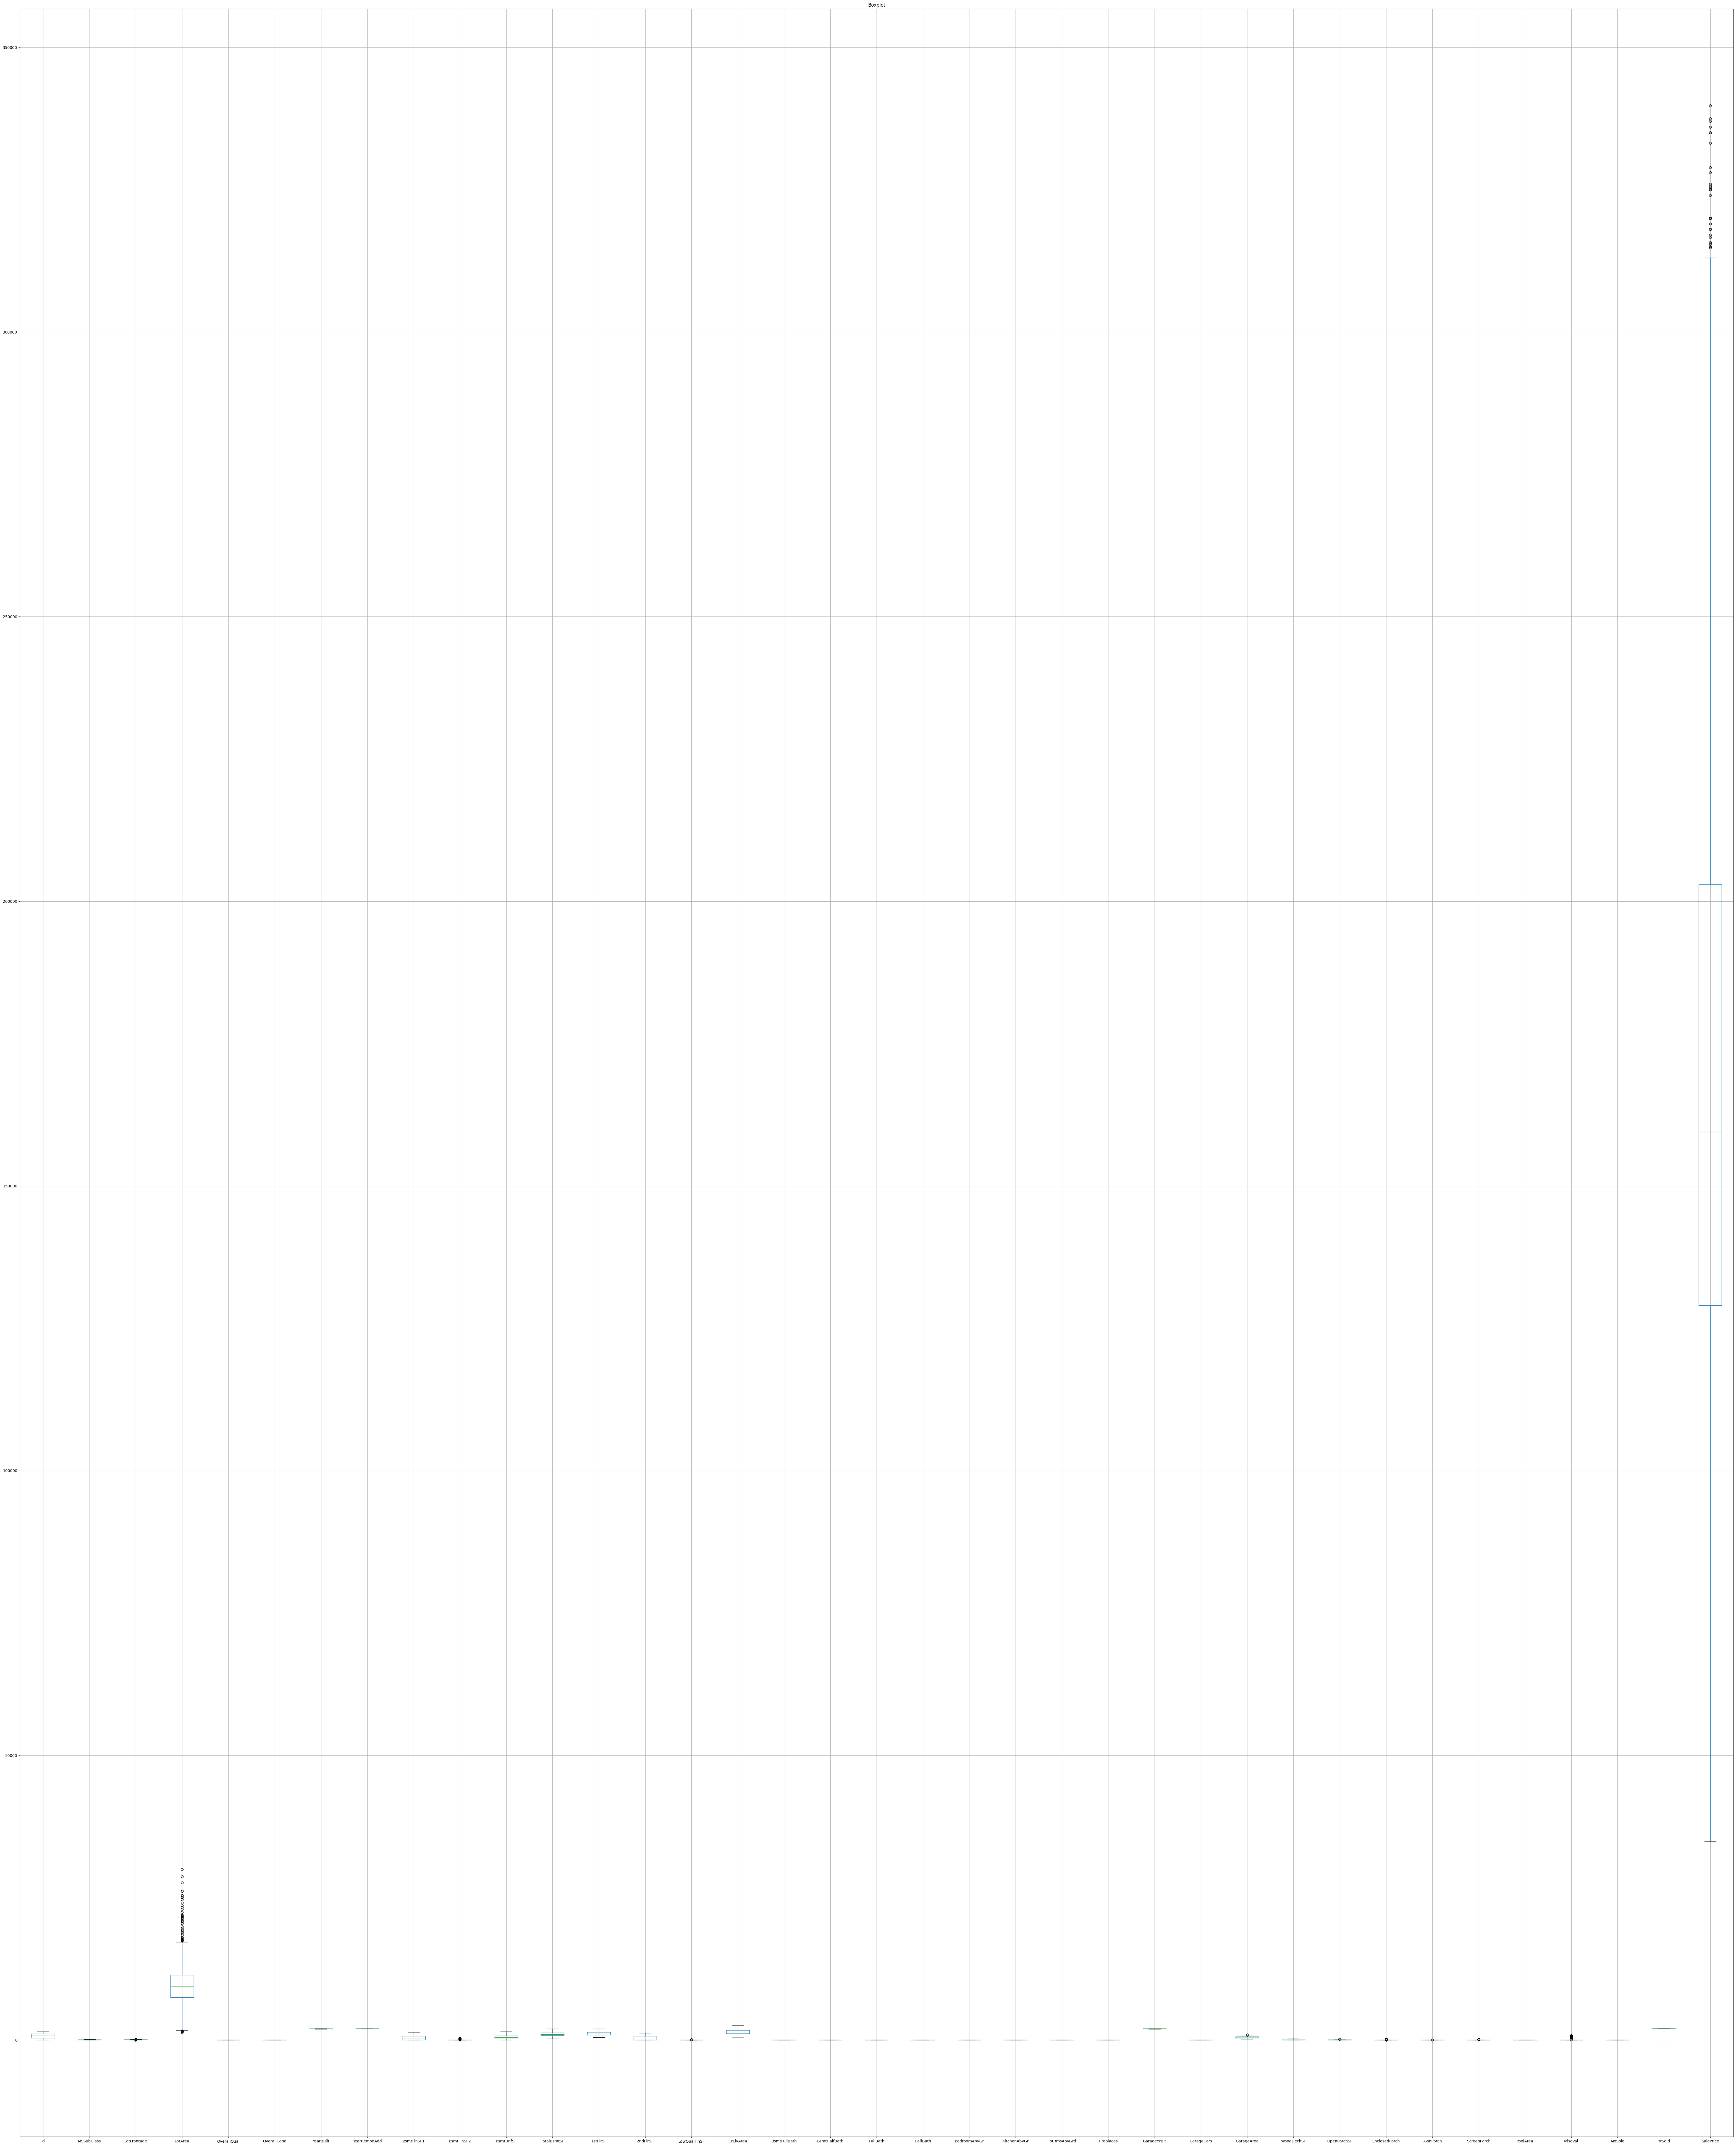

In [119]:
# Visualizar los valores A tipicos con boxplot
plt.figure(figsize=(80, 100))
df.boxplot()
plt.title('Boxplot')
plt.show()

# 3.Derivación de Columnas Categóricas.

In [120]:
from sklearn.preprocessing import LabelEncoder

# Crea una instancia del codificador
label_encoder = LabelEncoder()

# Aplica el Label Encoding a la columna "LandContour"
df['LandContour'] = label_encoder.fit_transform(df['LandContour'])

# Aplica el Label Encoding a la columna "Utilities"
df['Utilities'] = label_encoder.fit_transform(df['Utilities'])

# Aplica el Label Encoding a la columna "LotConfig"
df['LotConfig'] = label_encoder.fit_transform(df['LotConfig'])

# Aplica el Label Encoding a la columna "LandSlope"
df['LandSlope'] = label_encoder.fit_transform(df['LandSlope'])

# Aplica el Label Encoding a la columna "Condition1"
df['Condition1'] = label_encoder.fit_transform(df['Condition1'])

# Aplica el Label Encoding a la columna "Condition2"
df['Condition2'] = label_encoder.fit_transform(df['Condition2'])

# Aplica el Label Encoding a la columna "BldgType"
df['BldgType'] = label_encoder.fit_transform(df['BldgType'])

# Aplica el Label Encoding a la columna "RoofStyle"
df['RoofStyle'] = label_encoder.fit_transform(df['RoofStyle'])

# Aplica el Label Encoding a la columna "MasVnrType"
df['MasVnrType'] = label_encoder.fit_transform(df['MasVnrType'])

# Aplica el Label Encoding a la columna "ExterQual"
df['ExterQual'] = label_encoder.fit_transform(df['ExterQual'])

# Aplica el Label Encoding a la columna "ExterCond"
df['ExterCond'] = label_encoder.fit_transform(df['ExterCond'])

# Aplica el Label Encoding a la columna "BsmtQual"
df['BsmtQual'] = label_encoder.fit_transform(df['BsmtQual'])

# Aplica el Label Encoding a la columna "BldgType"
df['BldgType'] = label_encoder.fit_transform(df['BldgType'])

# Aplica el Label Encoding a la columna "BsmtCond"
df['BsmtCond'] = label_encoder.fit_transform(df['BsmtCond'])

# Aplica el Label Encoding a la columna "BsmtExposure"
df['BsmtExposure'] = label_encoder.fit_transform(df['BsmtExposure'])

# Aplica el Label Encoding a la columna "BsmtFinType1"
df['BsmtFinType1'] = label_encoder.fit_transform(df['BsmtFinType1'])

# Aplica el Label Encoding a la columna "MSZoning"
df['MSZoning'] = label_encoder.fit_transform(df['MSZoning'])


In [121]:
# Aplica el Label Encoding a la columna "Street"
df['Street'] = label_encoder.fit_transform(df['Street'])

# Aplica el Label Encoding a la columna "BsmtFinType2"
df['BsmtFinType2'] = label_encoder.fit_transform(df['BsmtFinType2'])

# Aplica el Label Encoding a la columna "Heating"
df['Heating'] = label_encoder.fit_transform(df['Heating'])

# Aplica el Label Encoding a la columna "HeatingQC"
df['HeatingQC'] = label_encoder.fit_transform(df['HeatingQC'])

# Aplica el Label Encoding a la columna "CentralAir"
df['CentralAir'] = label_encoder.fit_transform(df['CentralAir'])

# Aplica el Label Encoding a la columna "Electrical"
df['Electrical'] = label_encoder.fit_transform(df['Electrical'])

# Aplica el Label Encoding a la columna "KitchenQual"
df['KitchenQual'] = label_encoder.fit_transform(df['KitchenQual'])

# Aplica el Label Encoding a la columna "Functional"
df['Functional'] = label_encoder.fit_transform(df['Functional'])

# Aplica el Label Encoding a la columna "HeatingQC"
df['HeatingQC'] = label_encoder.fit_transform(df['HeatingQC'])

# Aplica el Label Encoding a la columna "FireplaceQu"
df['FireplaceQu'] = label_encoder.fit_transform(df['FireplaceQu'])

# Aplica el Label Encoding a la columna "GarageType"
df['GarageType'] = label_encoder.fit_transform(df['GarageType'])

# Aplica el Label Encoding a la columna "GarageFinish"
df['GarageFinish'] = label_encoder.fit_transform(df['GarageFinish'])

# Aplica el Label Encoding a la columna "GarageQual"
df['GarageQual'] = label_encoder.fit_transform(df['GarageQual'])

In [122]:
df.head(22)


Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street LotShape  \
0    1       60.00         3        65.00  8450.00       1      Reg   
1    2       20.00         3        80.00  9600.00       1      Reg   
2    3       60.00         3        68.00 11250.00       1      IR1   
3    4       70.00         3        60.00  9550.00       1      IR1   
4    5       60.00         3        84.00 14260.00       1      IR1   
5    6       50.00         3        85.00 14115.00       1      IR1   
6    7       20.00         3        75.00 10084.00       1      Reg   
7    8       60.00         3        70.05 10382.00       1      IR1   
8    9       50.00         4        51.00  6120.00       1      Reg   
9   10         NaN         3        50.00  7420.00       1      Reg   
10  11       20.00         3        70.00 11200.00       1      Reg   
11  12       60.00         3        85.00 11924.00       1      IR1   
12  13       20.00         3        70.05 12968.00       1      IR2   
13  14       20.00         3        91.00 10652.00       1      IR1   
14  15       20.00         3        70.05 10920.00       1      IR1   
15  16       45.00         4        51.00  6120.00       1      Reg   
16  17       20.00         3        70.05 11241.00       1      IR1   
17  18       90.00         3        72.00 10791.00       1      Reg   
18  19       20.00         3        66.00 13695.00       1      Reg   
19  20       20.00         3        70.00  7560.00       1      Reg   
20  21       60.00         3       101.00 14215.00       1      IR1   
21  22       45.00         4        57.00  7449.00       1      Reg   

    LandContour  Utilities  LotConfig  ...  EnclosedPorch 3SsnPorch  \
0             3          0          4  ...           0.00      0.00   
1             3          0          2  ...           0.00      0.00   
2             3          0          4  ...           0.00      0.00   
3             3          0          0  ...            NaN      0.00   
4             3          0          2  ...           0.00      0.00   
5             3          0          4  ...           0.00       NaN   
6             3          0          4  ...           0.00      0.00   
7             3          0          0  ...            NaN      0.00   
8             3          0          4  ...            NaN      0.00   
9             3          0          0  ...           0.00      0.00   
10            3          0          4  ...           0.00      0.00   
11            3          0          4  ...           0.00      0.00   
12            3          0          4  ...           0.00      0.00   
13            3          0          4  ...           0.00      0.00   
14            3          0          0  ...            NaN      0.00   
15            3          0          0  ...           0.00      0.00   
16            3          0          1  ...           0.00      0.00   
17            3          0          4  ...           0.00      0.00   
18            3          0          4  ...           0.00      0.00   
19            3          0          4  ...           0.00      0.00   
20            3          0          0  ...           0.00      0.00   
21            0          0          4  ...            NaN      0.00   

    ScreenPorch  PoolArea  MiscVal MoSold  YrSold  SaleType  SaleCondition  \
0          0.00      0.00     0.00   2.00 2008.00        WD         Normal   
1          0.00      0.00     0.00   5.00 2007.00        WD         Normal   
2          0.00      0.00     0.00   9.00 2008.00        WD         Normal   
3          0.00      0.00     0.00   2.00 2006.00        WD        Abnorml   
4          0.00      0.00     0.00    NaN 2008.00        WD         Normal   
5          0.00      0.00   700.00  10.00 2009.00        WD         Normal   
6          0.00      0.00     0.00   8.00 2007.00        WD         Normal   
7          0.00      0.00   350.00  11.00 2009.00        WD         Normal   
8          0.00      0.00     0.00

# Feature Selection

In [123]:
#Extraer únicamente las variables númericas
df_numericas=df._get_numeric_data()
df_numericas

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LandContour  \
0        1       60.00         3        65.00  8450.00       1            3   
1        2       20.00         3        80.00  9600.00       1            3   
2        3       60.00         3        68.00 11250.00       1            3   
3        4       70.00         3        60.00  9550.00       1            3   
4        5       60.00         3        84.00 14260.00       1            3   
...    ...         ...       ...          ...      ...     ...          ...   
1455  1456       60.00         3        62.00  7917.00       1            3   
1456  1457       20.00         3        85.00 13175.00       1            3   
1457  1458       70.00         3        66.00  9042.00       1            3   
1458  1459       20.00         3        68.00  9717.00       1            3   
1459  1460       20.00         3        75.00  9937.00       1            3   

      Utilities  LotConfig  LandSlope  ...  WoodDeckSF  OpenPorchSF  \
0             0          4          0  ...        0.00        61.00   
1             0          2          0  ...      298.00         0.00   
2             0          4          0  ...        0.00        42.00   
3             0          0          0  ...        0.00        35.00   
4             0          2          0  ...      192.00        84.00   
...         ...        ...        ...  ...         ...          ...   
1455          0          4          0  ...        0.00        40.00   
1456          0          4          0  ...         NaN         0.00   
1457          0          4          0  ...        0.00        60.00   
1458          0          4          0  ...         NaN         0.00   
1459          0          4          0  ...         NaN        68.00   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
0              0.00       0.00         0.00      0.00     0.00    2.00   
1              0.00       0.00         0.00      0.00     0.00    5.00   
2              0.00       0.00         0.00      0.00     0.00    9.00   
3               NaN       0.00         0.00      0.00     0.00    2.00   
4              0.00       0.00         0.00      0.00     0.00     NaN   
...             ...        ...          ...       ...      ...     ...   
1455           0.00       0.00         0.00      0.00     0.00    8.00   
1456           0.00       0.00         0.00      0.00     0.00    2.00   
1457           0.00       0.00         0.00      0.00      NaN    5.00   
1458         112.00       0.00         0.00      0.00     0.00    4.00   
1459           0.00       0.00         0.00      0.00     0.00    6.00   

      YrSold  SalePrice  
0    2008.00  208500.00  
1    2007.00  181500.00  
2    2008.00  223500.00  
3    2006.00  140000.00  
4    2008.00  250000.00  
...      ...        ...  
1455 2007.00  175000.00  
1456 2010.00  210000.00  
1457 2010.00  266500.00  
1458 2010.00  142125.00  
1459 2008.00  147500.00  

[1460 rows x 65 columns]

In [124]:
print(df_numericas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1357 non-null   float64
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1375 non-null   float64
 4   LotArea        1438 non-null   float64
 5   Street         1460 non-null   int64  
 6   LandContour    1460 non-null   int64  
 7   Utilities      1460 non-null   int64  
 8   LotConfig      1460 non-null   int64  
 9   LandSlope      1460 non-null   int64  
 10  Condition1     1460 non-null   int64  
 11  Condition2     1460 non-null   int64  
 12  BldgType       1460 non-null   int64  
 13  OverallQual    1374 non-null   float64
 14  OverallCond    1335 non-null   float64
 15  YearBuilt      1413 non-null   float64
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   int64  
 18  MasVnrTy

In [125]:
df_numericas.fillna(0, inplace=True)

In [126]:
print(df_numericas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   int64  
 6   LandContour    1460 non-null   int64  
 7   Utilities      1460 non-null   int64  
 8   LotConfig      1460 non-null   int64  
 9   LandSlope      1460 non-null   int64  
 10  Condition1     1460 non-null   int64  
 11  Condition2     1460 non-null   int64  
 12  BldgType       1460 non-null   int64  
 13  OverallQual    1460 non-null   float64
 14  OverallCond    1460 non-null   float64
 15  YearBuilt      1460 non-null   float64
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   int64  
 18  MasVnrTy

# Feature Selection

In [127]:
from sklearn.feature_selection import SelectKBest, f_regression

# Dividir los datos en características (X) y variable objetivo (y)
X = df_numericas.drop('SalePrice', axis=1)
y = df_numericas['SalePrice']

# Seleccionar las mejores características utilizando la prueba F
selector = SelectKBest(score_func=f_regression, k='all')  # Se seleccionarán todas las características
selector.fit(X, y)

# Obtener las puntuaciones de relevancia de las características
feature_scores = selector.scores_

# Crear un diccionario para almacenar los valores de relevancia de las características
relevance_scores = {}

# Asignar los valores de relevancia a cada característica
for i, feature in enumerate(X.columns):
    relevance_scores[feature] = feature_scores[i]

# Imprimir los valores de relevancia de las características
for feature, score in relevance_scores.items():
    print(f'{feature}: {score}')


Id: 0.028622522430810315
MSSubClass: 35.43909556096354
MSZoning: 46.57841388016538
LotFrontage: 26.543225119981965
LotArea: 54.48721067139451
Street: 1.4067889996870546
LandContour: 3.4023685616007326
Utilities: 0.14017479098551458
LotConfig: 6.03538295688502
LandSlope: 1.5375119558362376
Condition1: 14.688487446948775
Condition2: 0.23920105472133127
BldgType: 0.33389749070626284
OverallQual: 413.7145405941629
OverallCond: 2.2265747797790176
YearBuilt: 20.903831098976042
YearRemodAdd: 212.72527154218983
RoofStyle: 0.4088433476535292
MasVnrType: 4.336785099485282
ExterQual: 57.6382532300923
ExterCond: 12.093222517152752
BsmtQual: 95.37975038721459
BsmtCond: 3.875416065310252
BsmtExposure: 19.334023808482115
BsmtFinType1: 5.730844807934151
BsmtFinSF1: 44.2035856812141
BsmtFinType2: 1.016980319663127
BsmtFinSF2: 0.988410069719212
BsmtUnfSF: 5.961827909004005
TotalBsmtSF: 282.51043563812874
Heating: 13.65379363274463
HeatingQC: 108.33247340706444
CentralAir: 78.03388661948794
Electrical: 5

Se calcula las puntuaciones de relevancia de las características utilizando la prueba F. Estás utilizando la función SelectKBest de Scikit-Learn junto con la función de puntuación f_regression para seleccionar todas las características y luego imprimir las puntuaciones de relevancia.

Cuanto mayor sea la puntuación F de una característica, más relevante se considera para predecir la variable objetivo.

In [128]:
from sklearn.linear_model import LinearRegression

# Crear un modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos
model.fit(X, y)

# Obtener los coeficientes de las variables
coeficientes = model.coef_

# Imprimir los coeficientes junto con el nombre de las variables
for feature, coef in zip(X.columns, coeficientes):
    print(f'{feature}: {coef}')


Id: 4.079008343746586
MSSubClass: 79.32899028471843
MSZoning: -5550.865816463233
LotFrontage: 11.254816184917392
LotArea: 1.0264126290191626
Street: -3766.859099333721
LandContour: 216.68851753979442
Utilities: -20947.70994601455
LotConfig: -1505.9362612503708
LandSlope: 9546.248753717788
Condition1: 2186.8658721663455
Condition2: 6466.375193628118
BldgType: 68.01983351945653
OverallQual: 9714.691459763471
OverallCond: 35.74694027508065
YearBuilt: 6.012009888923444
YearRemodAdd: 311.1168603161092
RoofStyle: -749.0815902803688
MasVnrType: 573.4597651195372
ExterQual: -414.16628450803785
ExterCond: 9.114615642062404
BsmtQual: 787.2104001876046
BsmtCond: -749.70968105121
BsmtExposure: 2080.763355164592
BsmtFinType1: -582.9467723986686
BsmtFinSF1: 12.551354336130316
BsmtFinType2: -2214.1551456538036
BsmtFinSF2: -30.676777915148705
BsmtUnfSF: 4.049705346099472
TotalBsmtSF: 14.690387921346428
Heating: -912.5746309642359
HeatingQC: -1088.6745917664948
CentralAir: 3727.971901416216
Electrical:

Los coeficientes positivos indican una relación positiva con la variable objetivo, mientras que los coeficientes negativos indican una relación negativa.

In [129]:
from sklearn.ensemble import RandomForestRegressor

# Crear un modelo de bosque aleatorio
model = RandomForestRegressor()

# Ajustar el modelo a los datos
model.fit(X, y)

# Obtener la importancia de las características
importancia_caracteristicas = model.feature_importances_

# Imprimir la importancia de las características junto con el nombre de las variables
for feature, importancia in zip(X.columns, importancia_caracteristicas):
    print(f'{feature}: {importancia}')


Id: 0.010622581688092554
MSSubClass: 0.005090451543226411
MSZoning: 0.005822898639341593
LotFrontage: 0.02027767610544609
LotArea: 0.029120482720041686
Street: 2.9729544069027477e-05
LandContour: 0.004933734602857234
Utilities: 1.5785928288489725e-07
LotConfig: 0.002023552534305347
LandSlope: 0.002255473000160178
Condition1: 0.0015286444163137365
Condition2: 0.0003237791423838018
BldgType: 0.0017415729142319333
OverallQual: 0.2896709189707339
OverallCond: 0.004386357922946816
YearBuilt: 0.02179627371762171
YearRemodAdd: 0.01863346942173366
RoofStyle: 0.0028766744963137788
MasVnrType: 0.002721847141280943
ExterQual: 0.015584906658018222
ExterCond: 0.0025105614075639072
BsmtQual: 0.00980505853898242
BsmtCond: 0.0009585214558952948
BsmtExposure: 0.006317986656165756
BsmtFinType1: 0.004494774080135237
BsmtFinSF1: 0.028665163724751596
BsmtFinType2: 0.000607032712108333
BsmtFinSF2: 0.001378370950307589
BsmtUnfSF: 0.013270158395123964
TotalBsmtSF: 0.07449653926456959
Heating: 0.00052664082077

La importancia de las características se calcula en función de cómo las características contribuyen a la reducción de la impureza en los nodos del árbol.

# 4.Análisis Univariable


In [130]:
univariable = df['MSSubClass']
descripciones = univariable.describe()
print(descripciones)

count   1357.00
mean      48.26
std       29.21
min       20.00
25%       20.00
50%       50.00
75%       60.00
max      120.00
Name: MSSubClass, dtype: float64


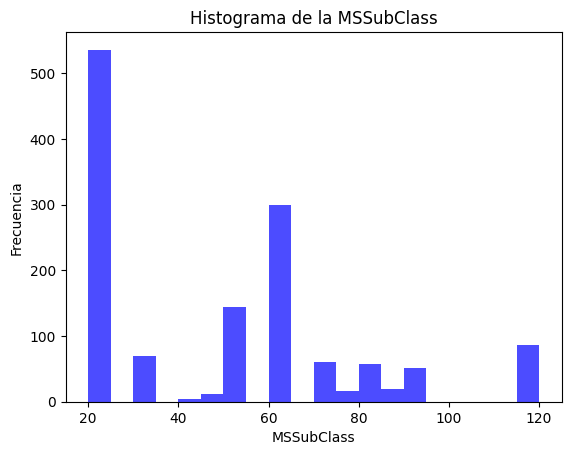

In [131]:
plt.hist(univariable, bins=20, color='blue', alpha=0.7)
plt.xlabel('MSSubClass')
plt.ylabel('Frecuencia')
plt.title('Histograma de la MSSubClass')
plt.show()

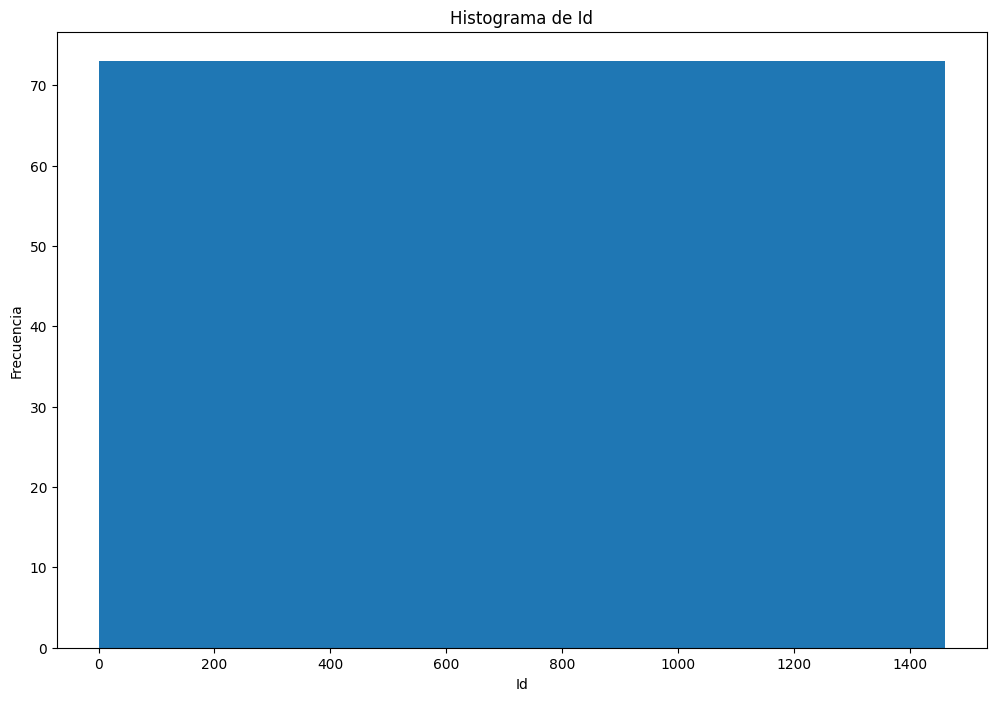

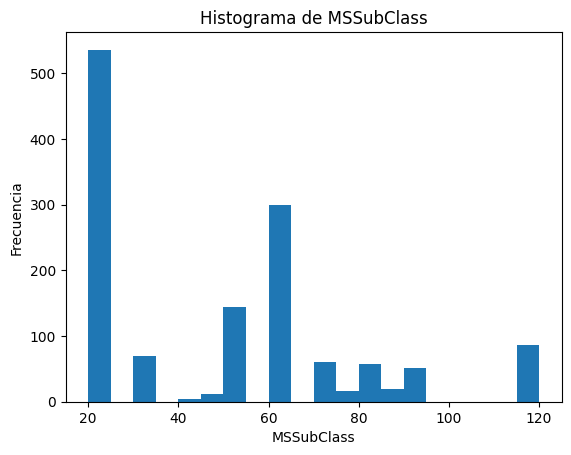

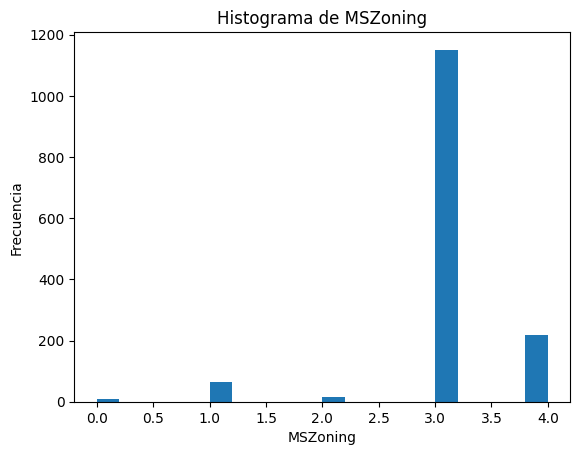

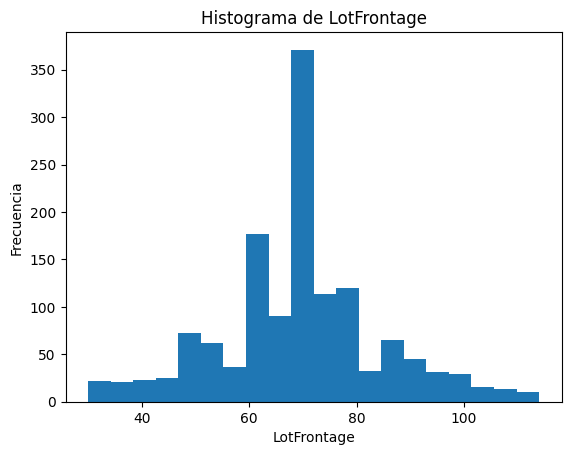

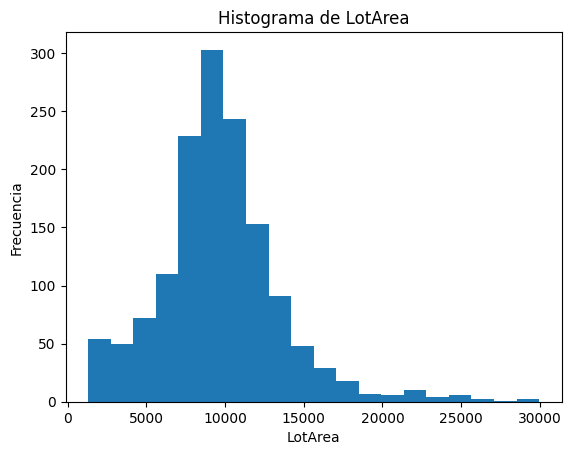

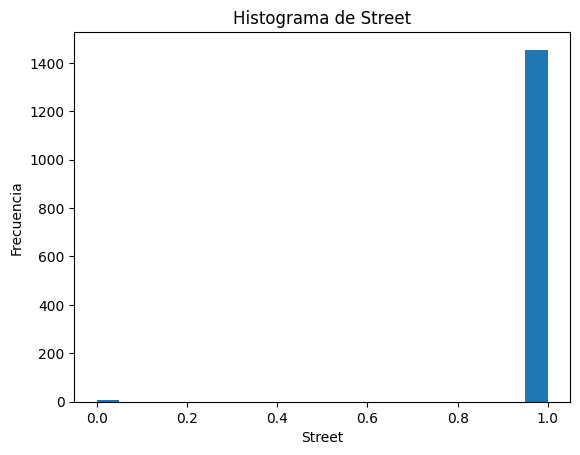

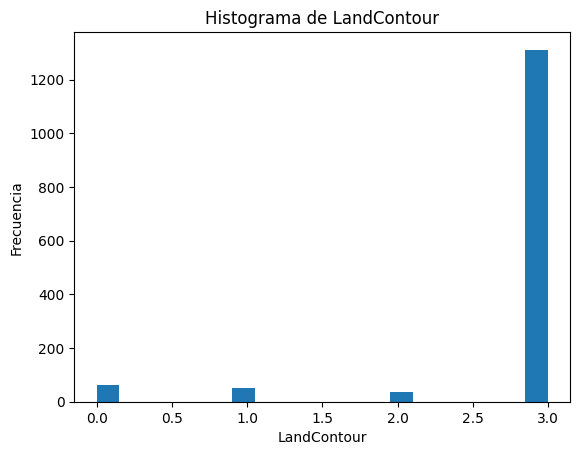

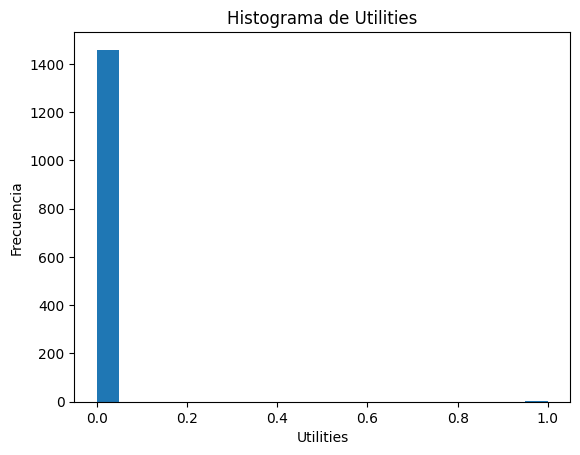

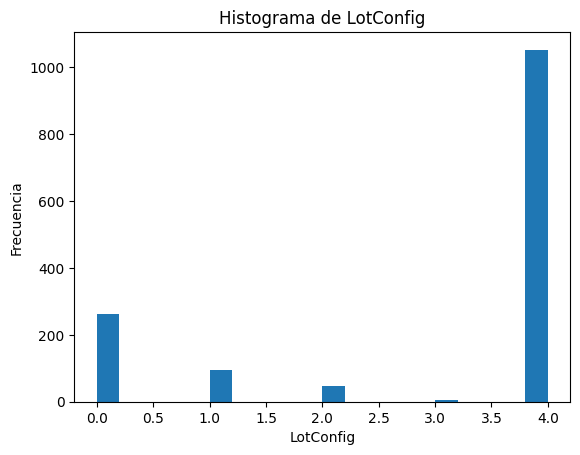

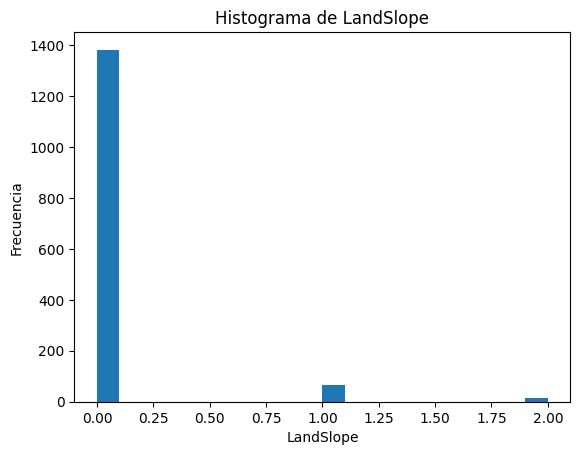

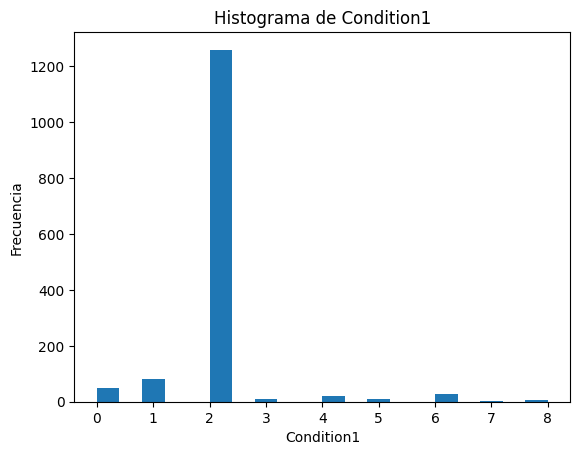

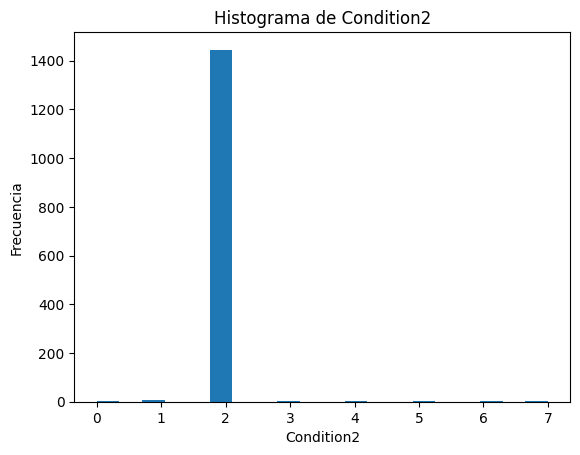

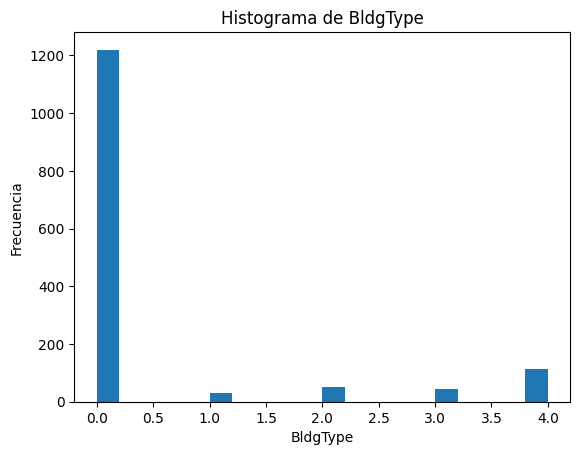

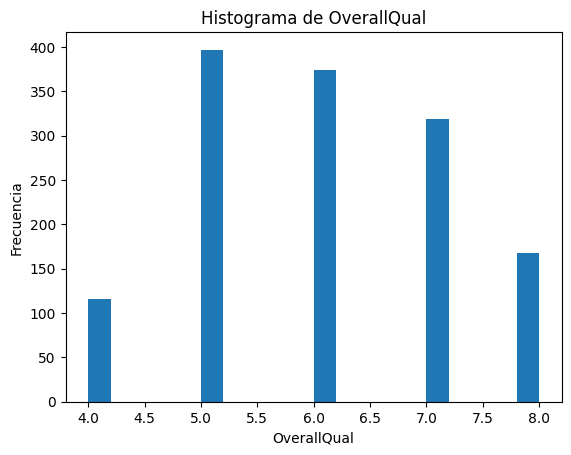

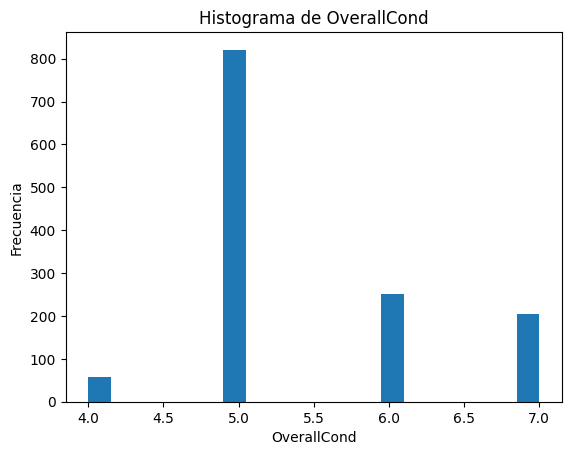

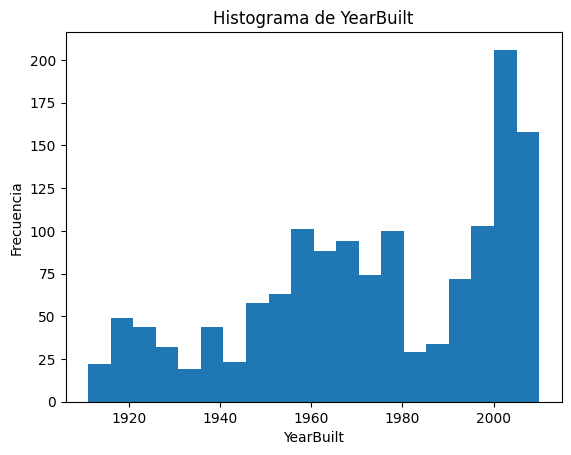

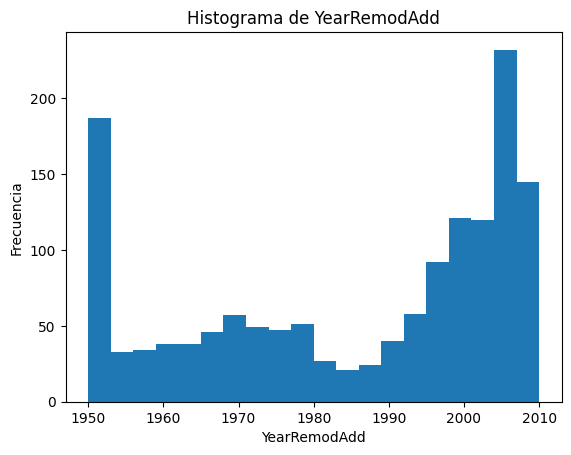

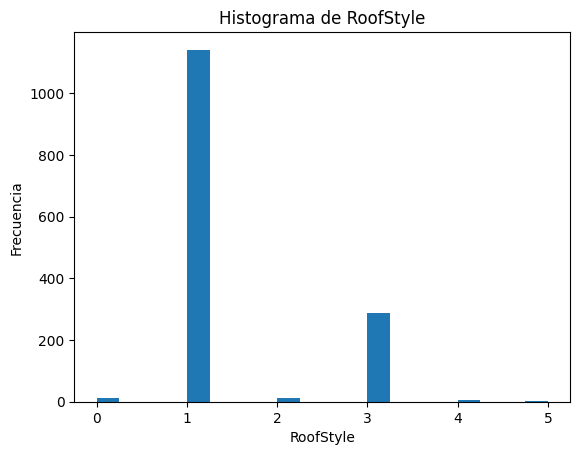

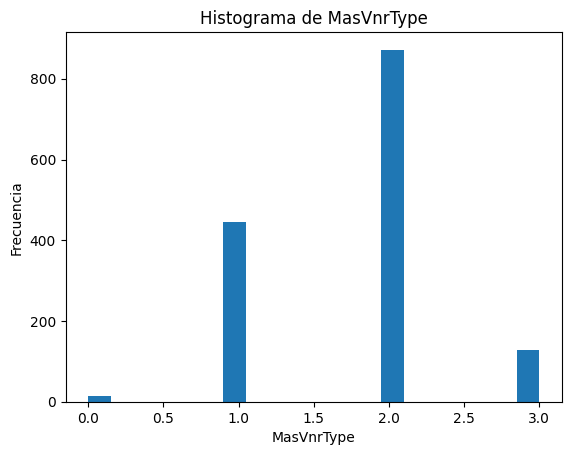

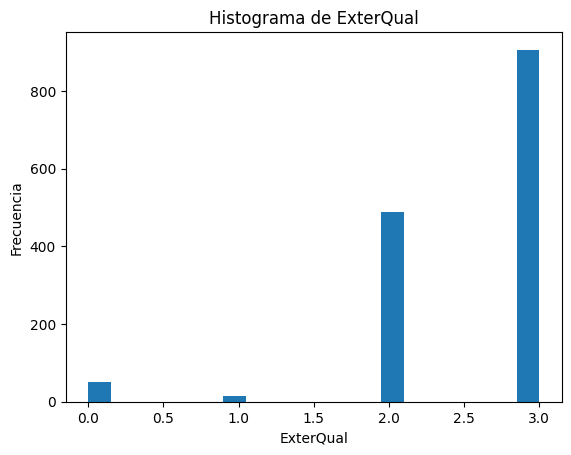

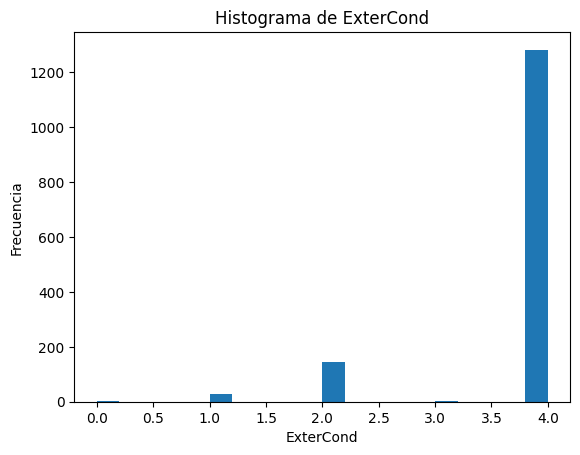

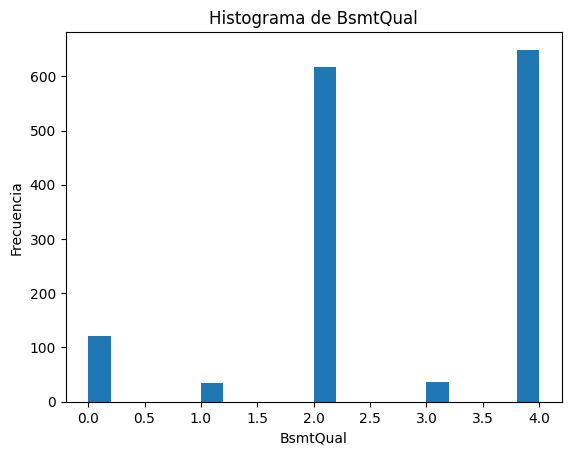

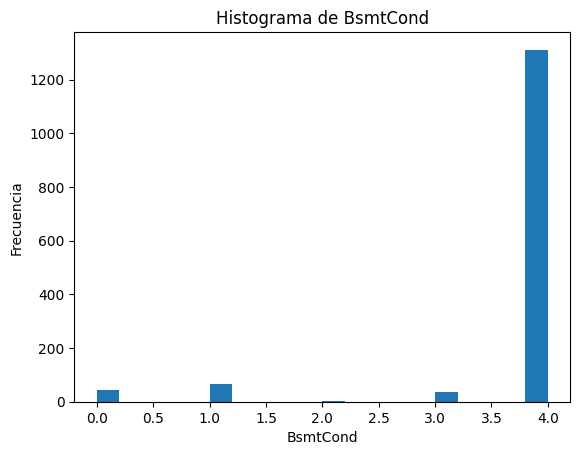

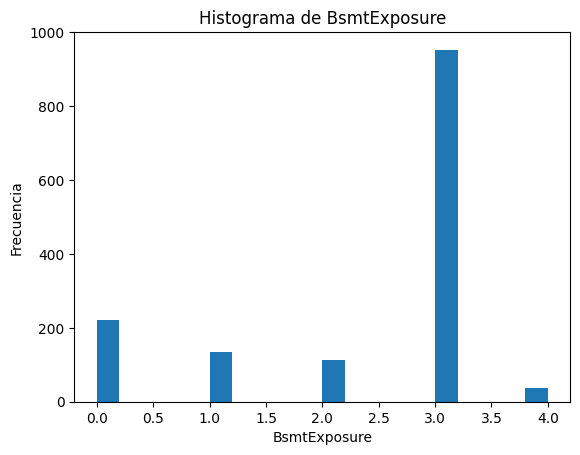

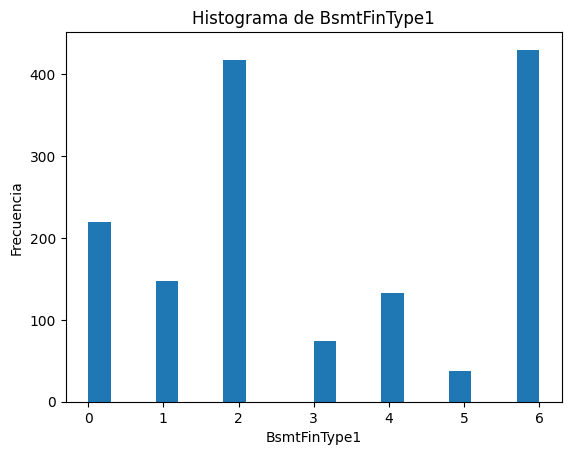

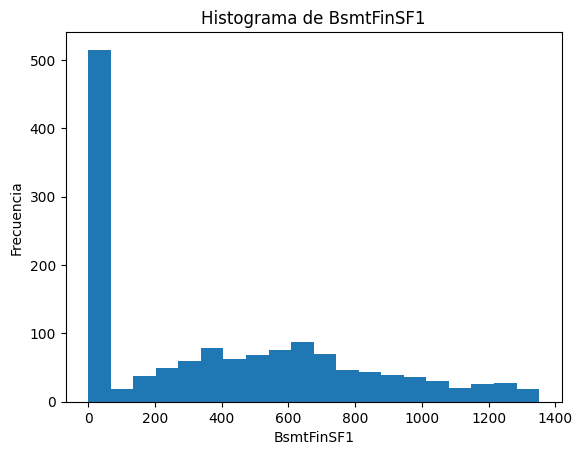

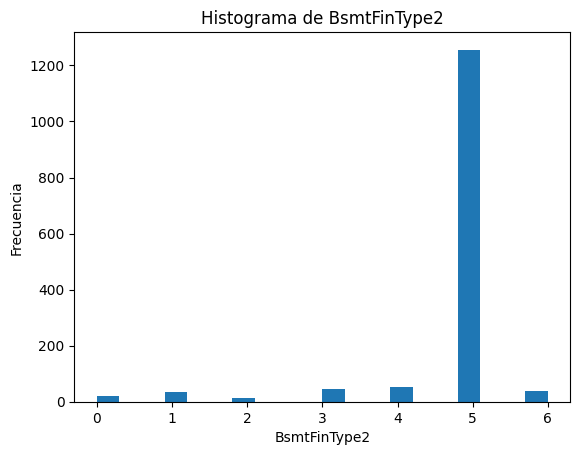

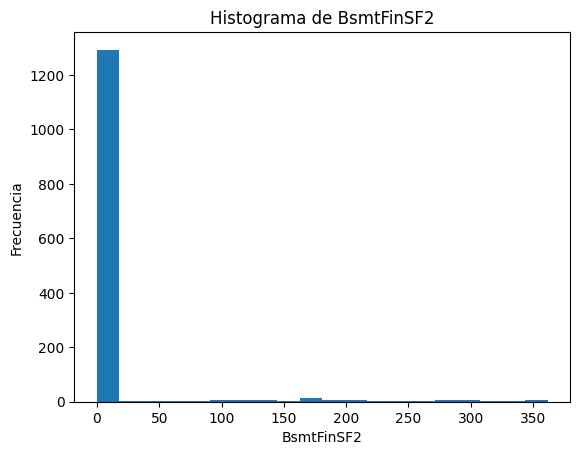

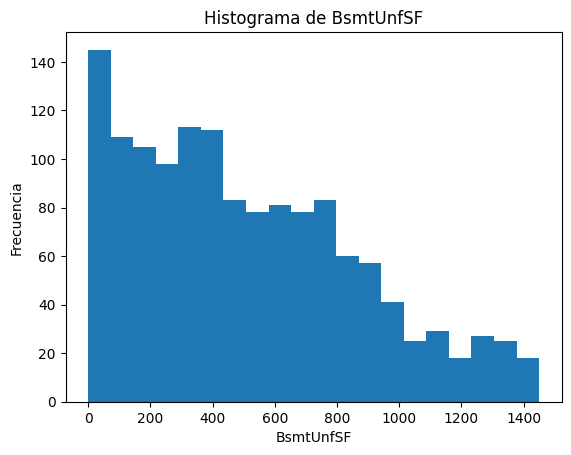

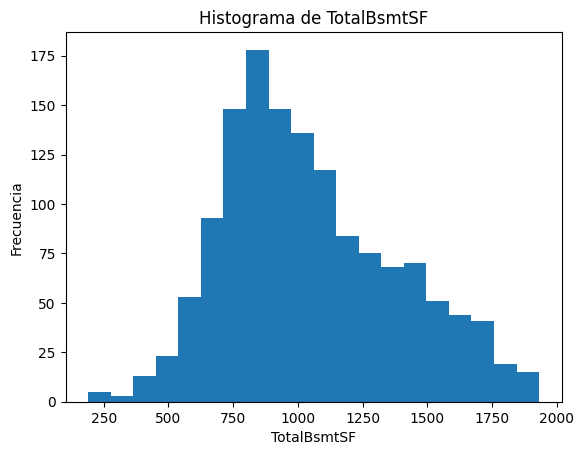

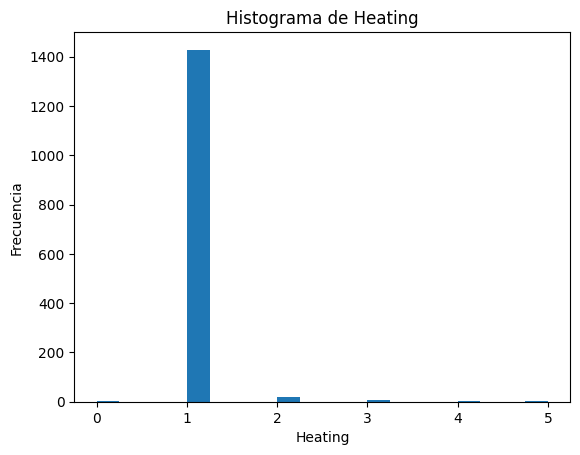

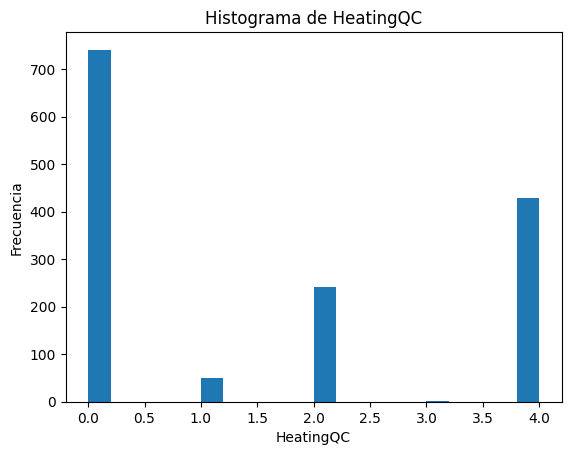

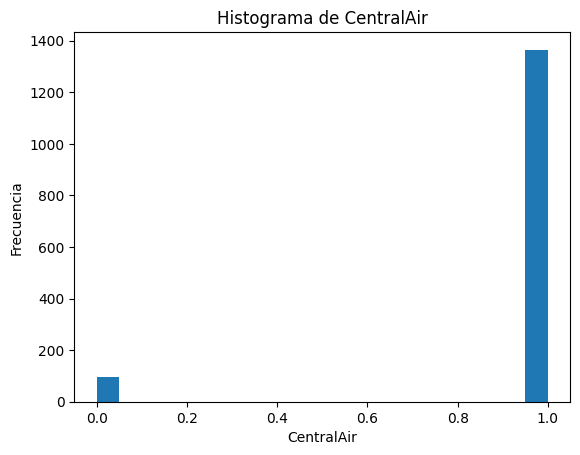

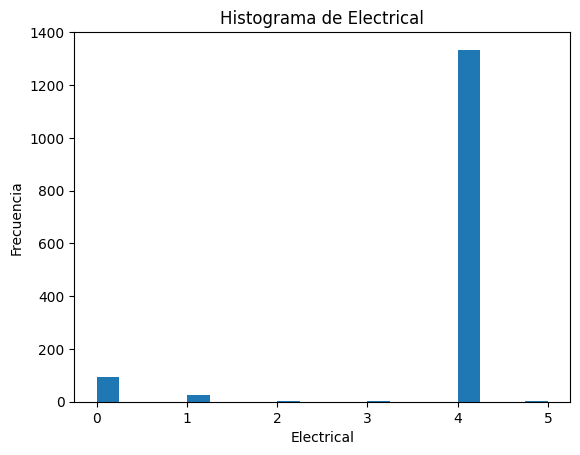

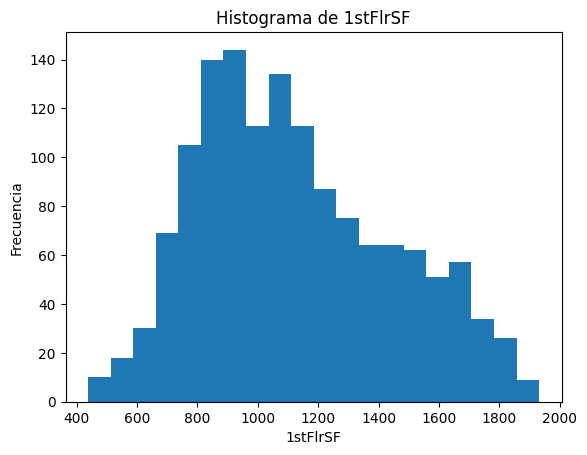

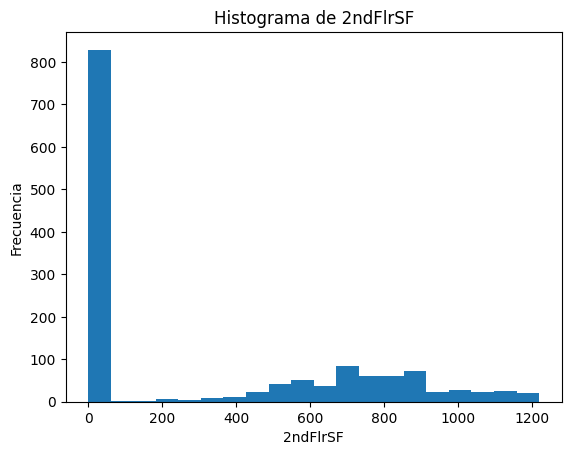

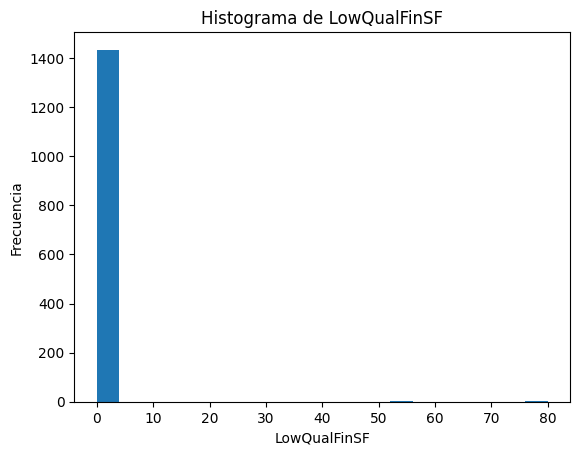

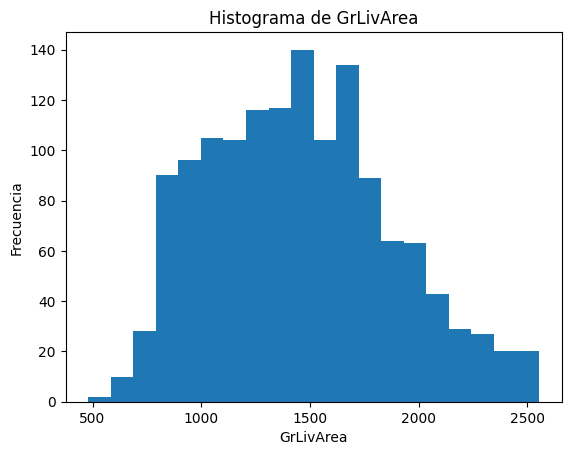

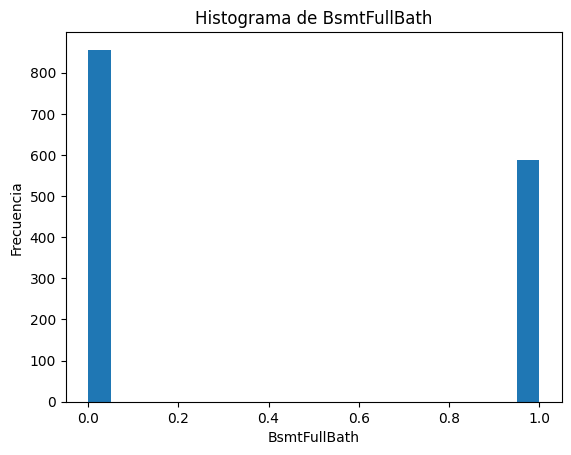

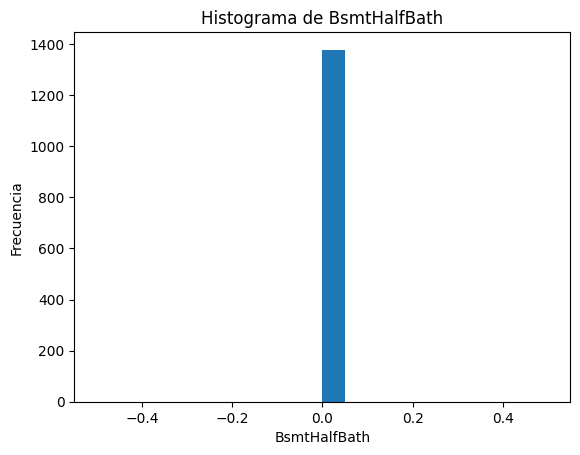

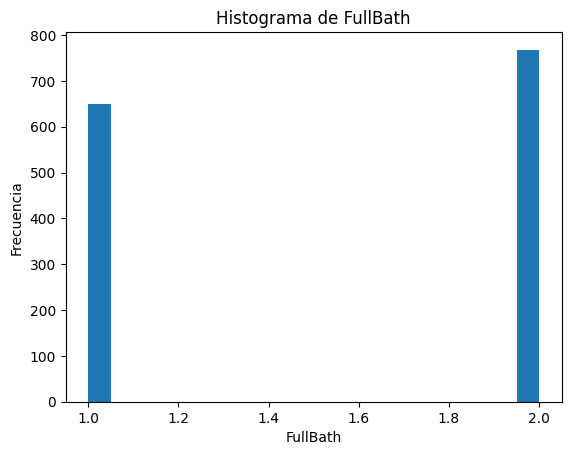

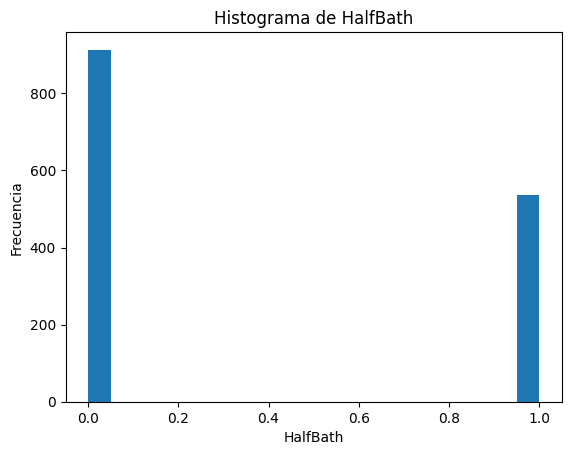

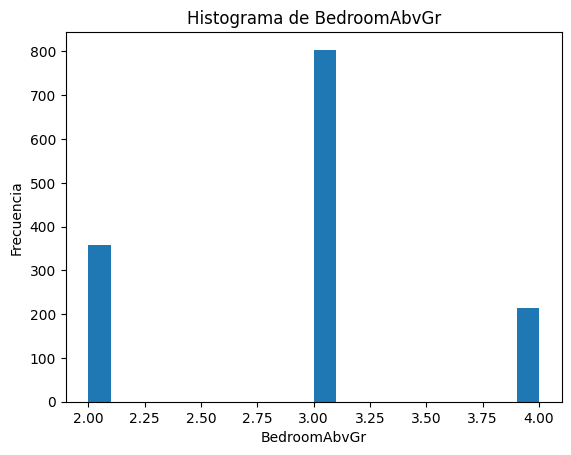

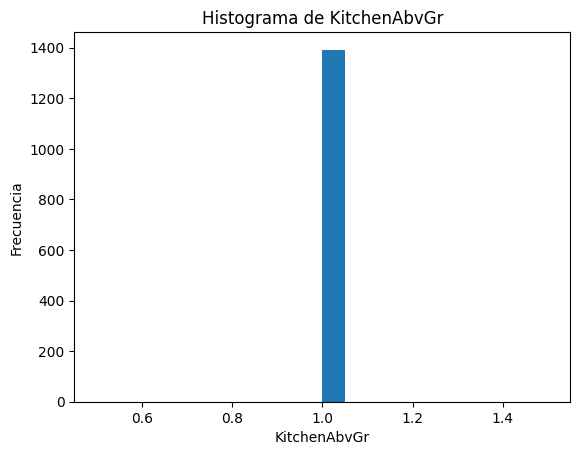

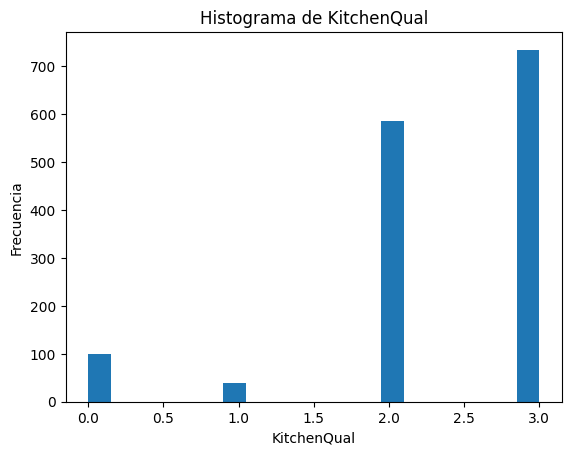

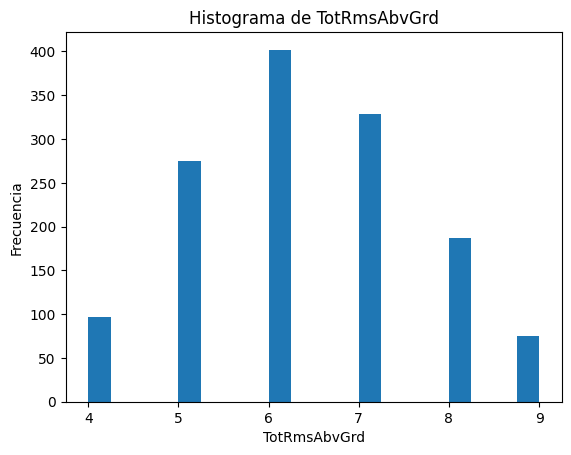

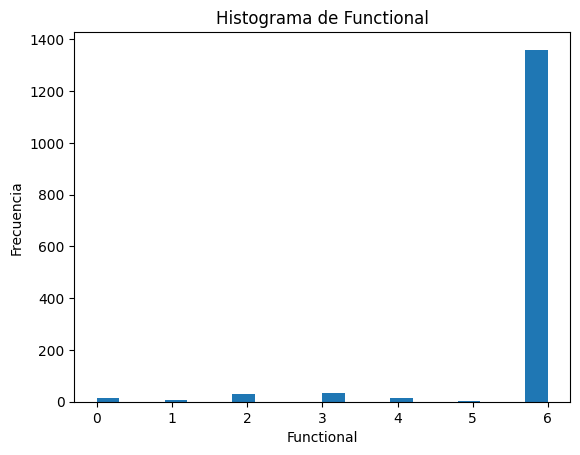

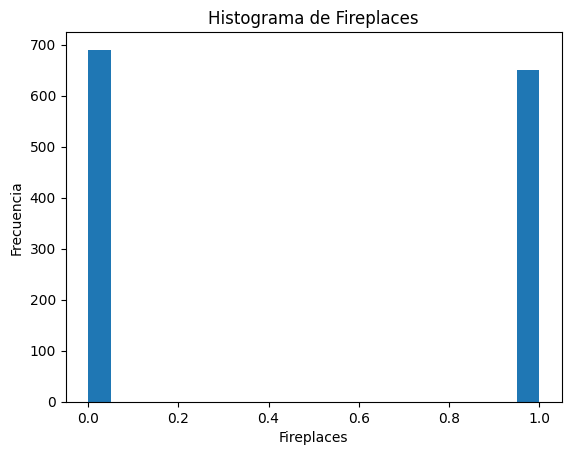

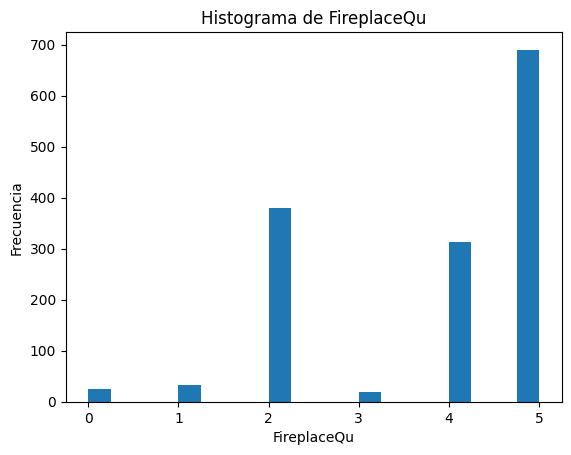

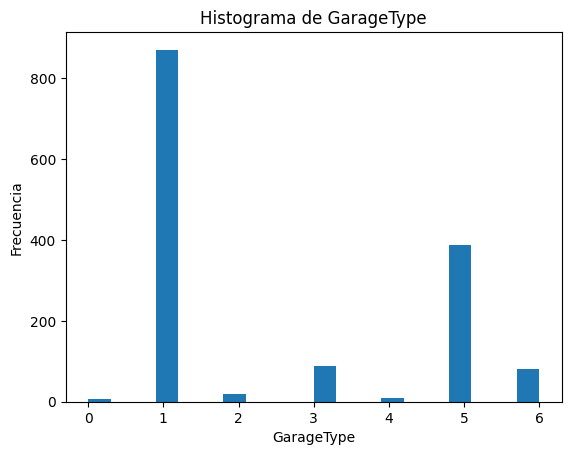

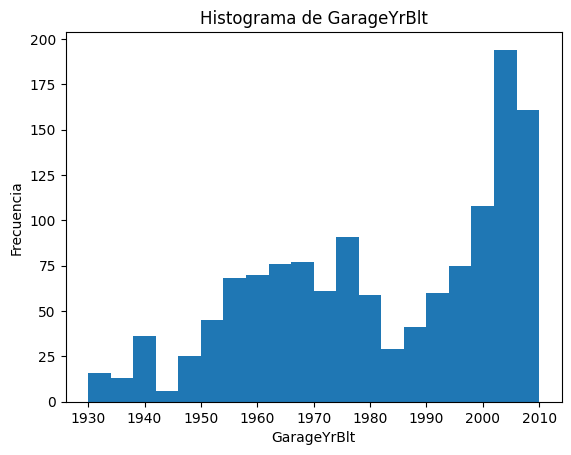

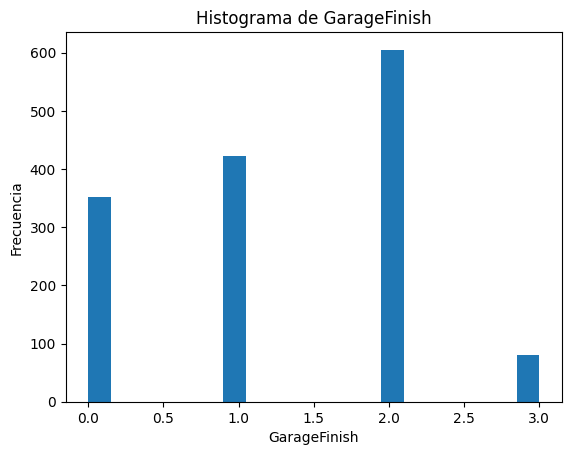

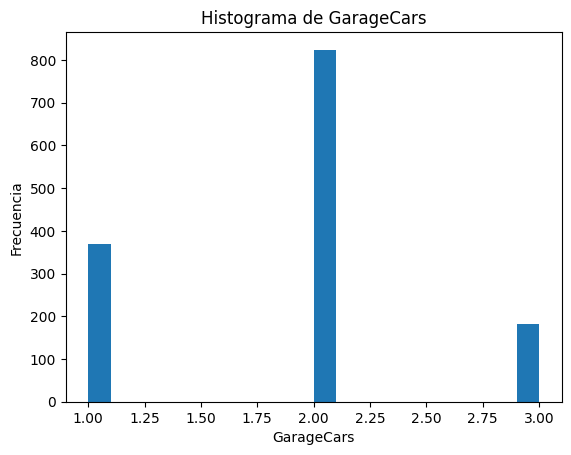

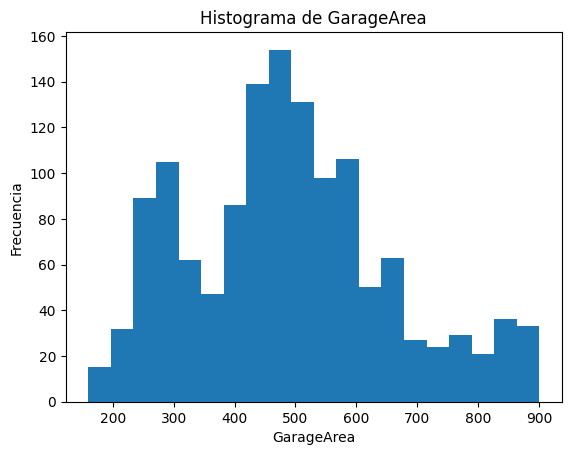

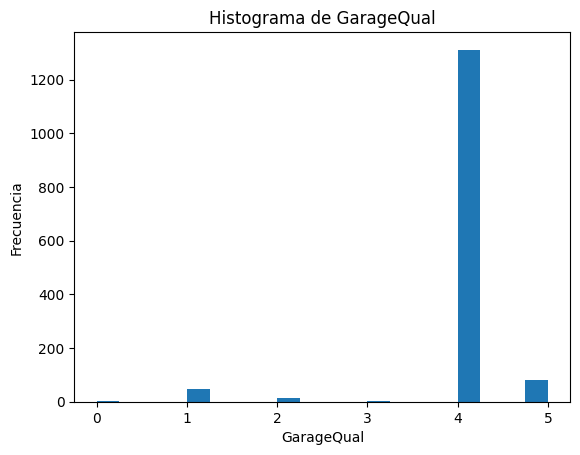

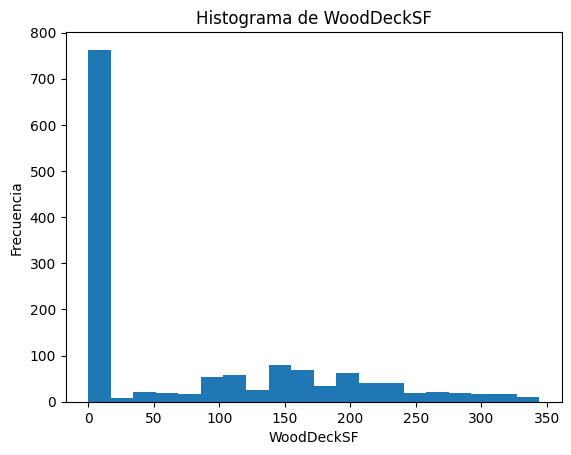

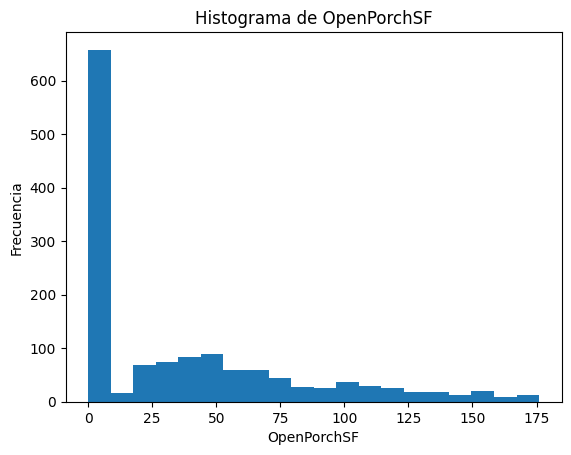

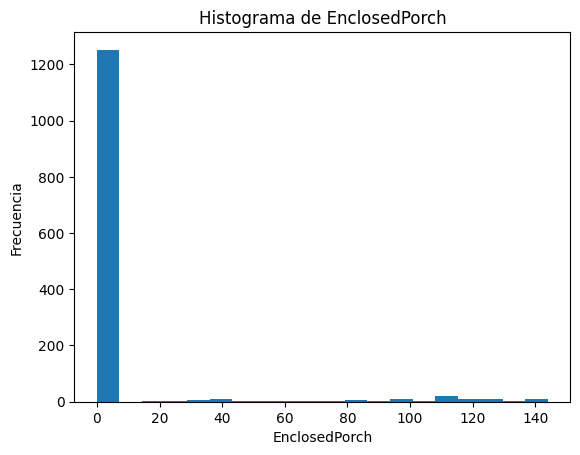

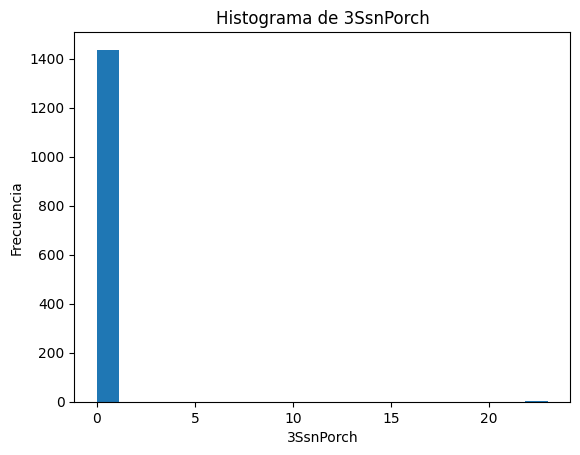

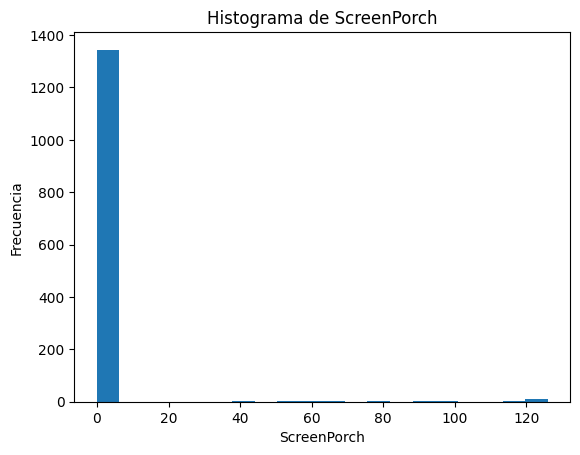

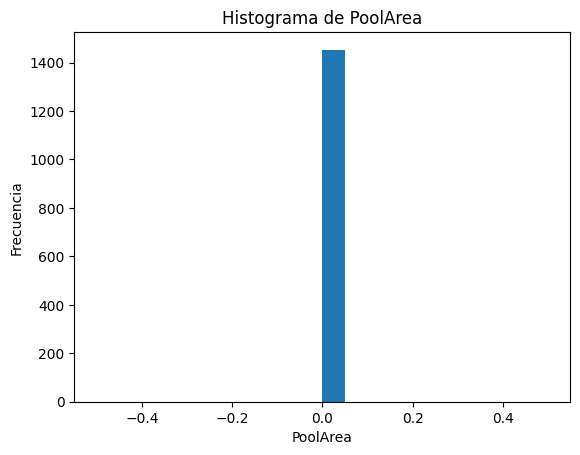

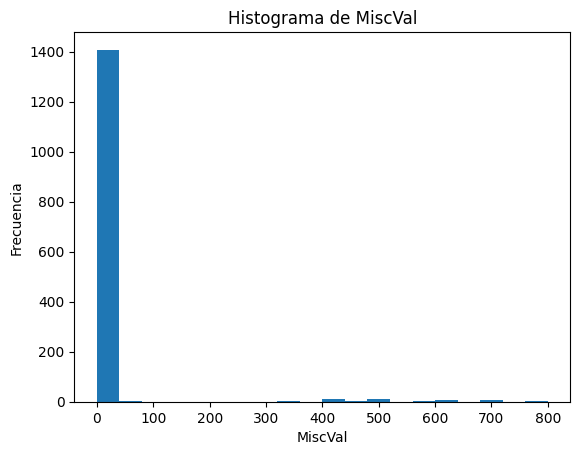

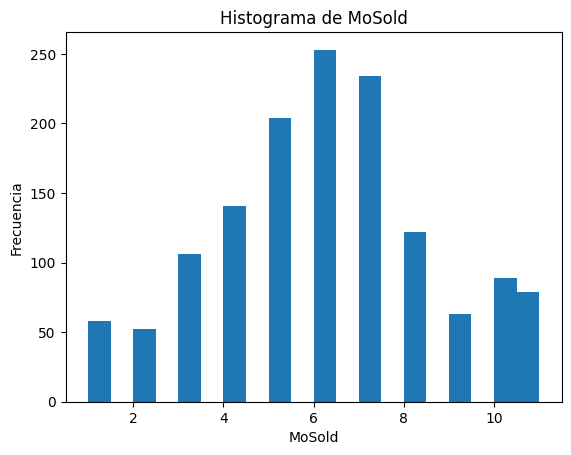

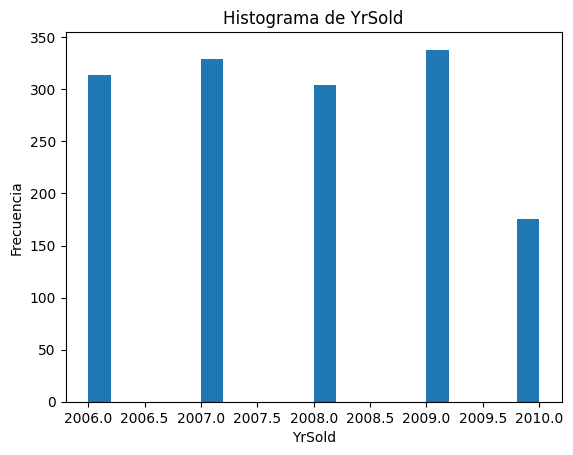

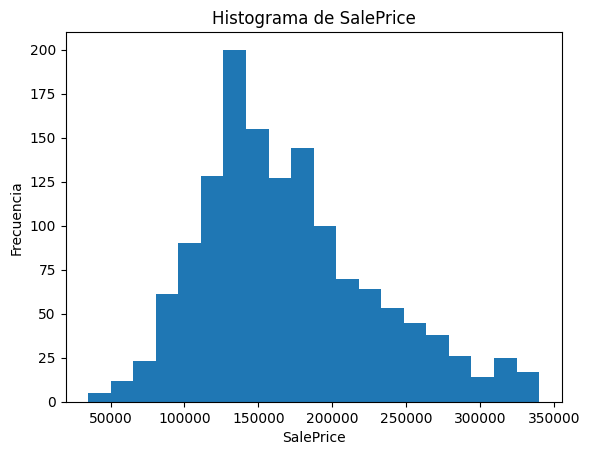

In [132]:
numeric_columns = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(12, 8))
for columna in numeric_columns:
    plt.hist(df[columna], bins=20)
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de {columna}')
    plt.show()

# 5. Análisis Bivariable.

Gráficos de Dispersión:
Para explorar las relaciones entre variables numéricas específicas.
Esto te permite ver visualmente cómo se distribuyen los datos en función de dos variables numéricas

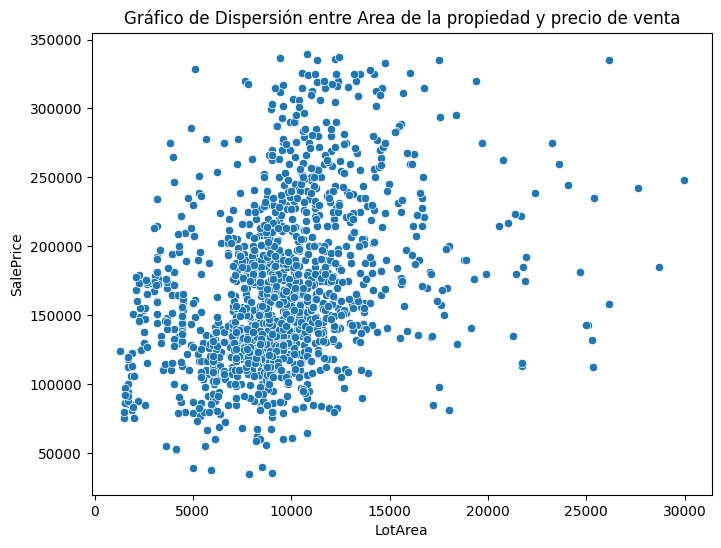

In [133]:
# Gráfico de dispersión entre 'LotArea' y 'SalePrice'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='LotArea', y='SalePrice')
plt.title('Gráfico de Dispersión entre Area de la propiedad y precio de venta')
plt.show()

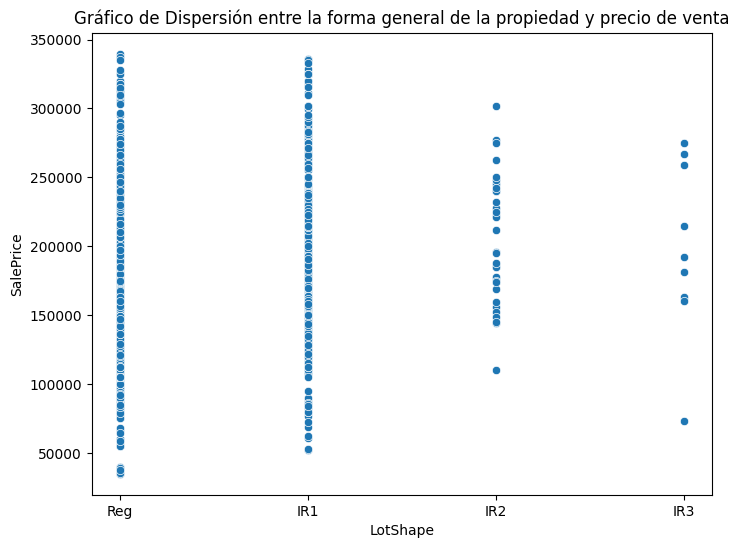

In [134]:
# Gráfico de dispersión entre 'Condition1' y 'SalePrice'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='LotShape', y='SalePrice')
plt.title('Gráfico de Dispersión entre la forma general de la propiedad y precio de venta')
plt.show()

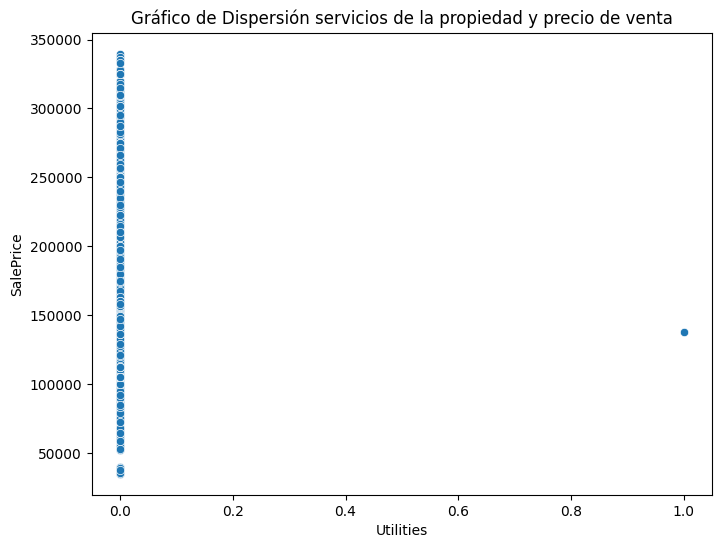

In [135]:
# Gráfico de dispersión entre 'Condition2' y 'SalePrice'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Utilities', y='SalePrice')
plt.title('Gráfico de Dispersión servicios de la propiedad y precio de venta')
plt.show()

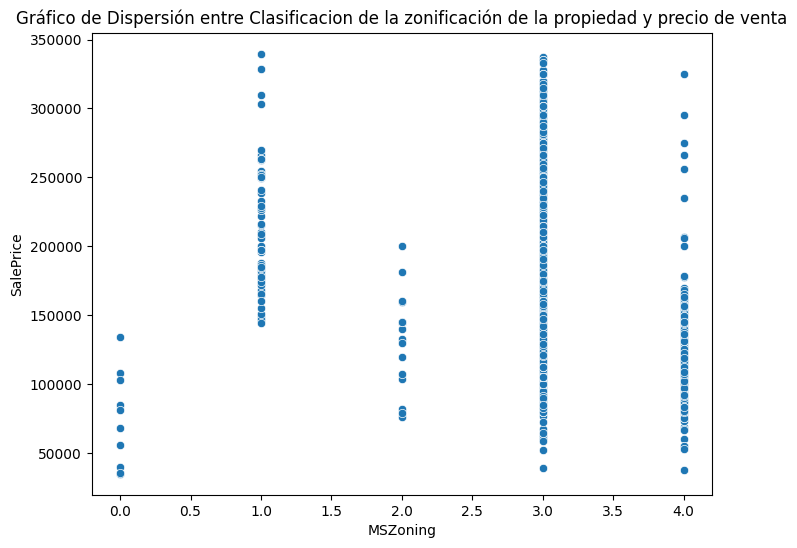

In [136]:
# Gráfico de dispersión entre 'MSZoning' y 'SalePrice'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='MSZoning', y='SalePrice')
plt.title('Gráfico de Dispersión entre Clasificacion de la zonificación de la propiedad y precio de venta')
plt.show()

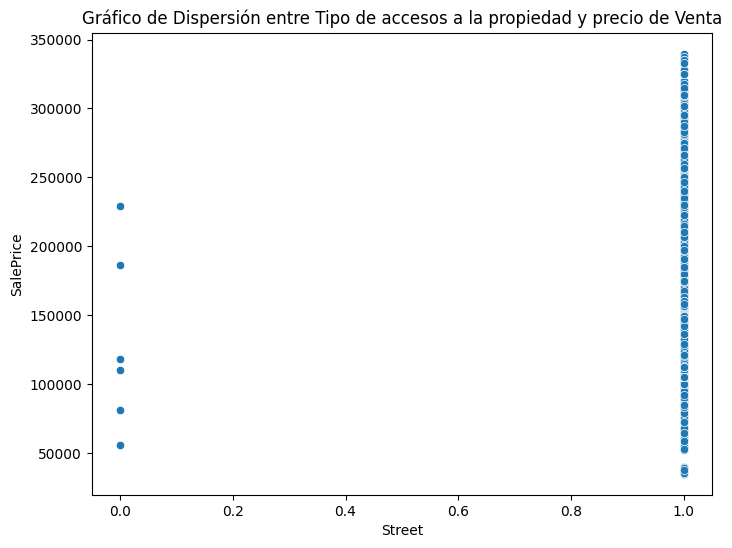

In [137]:
# Gráfico de dispersión entre 'MSZoning' y 'SalePrice'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Street', y='SalePrice')
plt.title('Gráfico de Dispersión entre Tipo de accesos a la propiedad y precio de Venta')
plt.show()

Gráficos de Barras Apiladas:
Para explorar la relación entre una variable categórica y "SalePrice". Esto ayuda a ver cómo se distribuyen los valores de "SalePrice" dentro de cada categoría de la variable categórica.

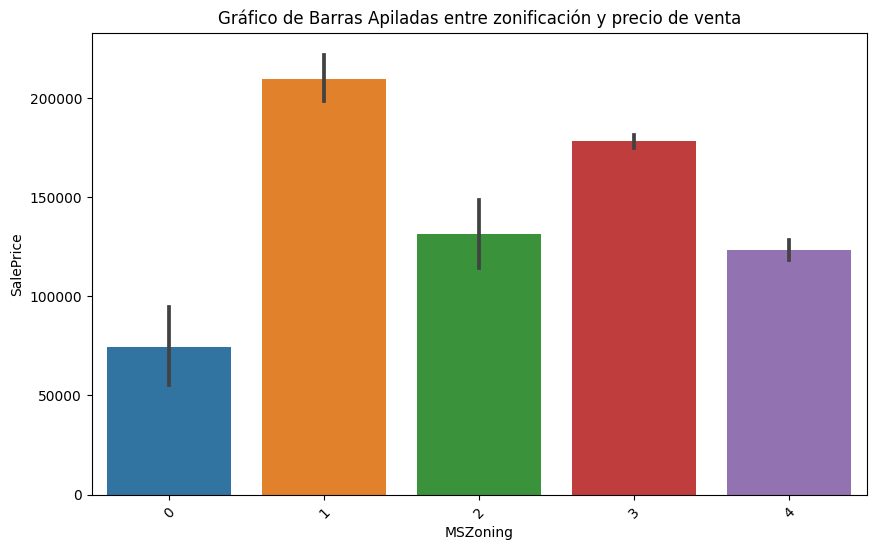

In [138]:
# Gráfico de barras apiladas entre 'MSZoning' y 'SalePrice'
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='MSZoning', y='SalePrice')
plt.title('Gráfico de Barras Apiladas entre zonificación y precio de venta')
plt.xticks(rotation=45)
plt.show()

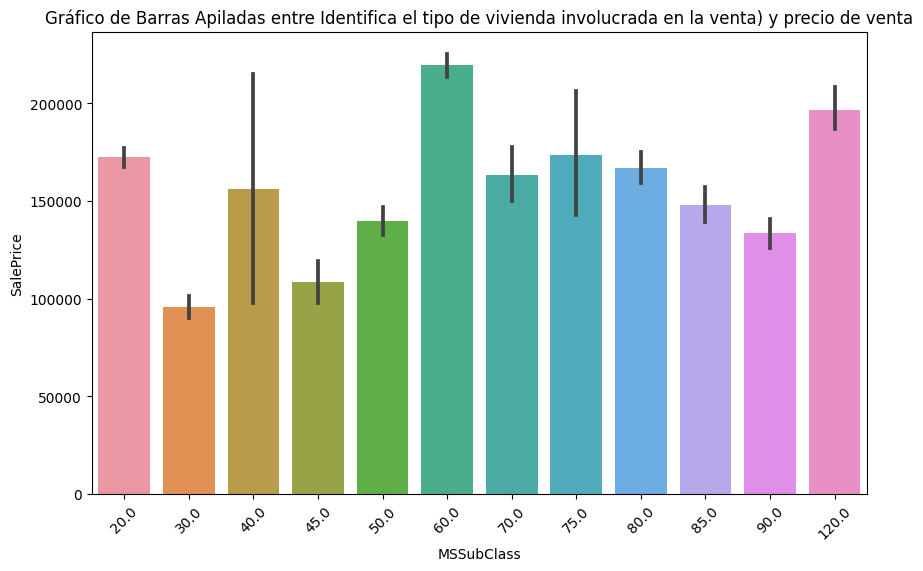

In [139]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='MSSubClass', y='SalePrice')
plt.title('Gráfico de Barras Apiladas entre Identifica el tipo de vivienda involucrada en la venta) y precio de venta')
plt.xticks(rotation=45)
plt.show()

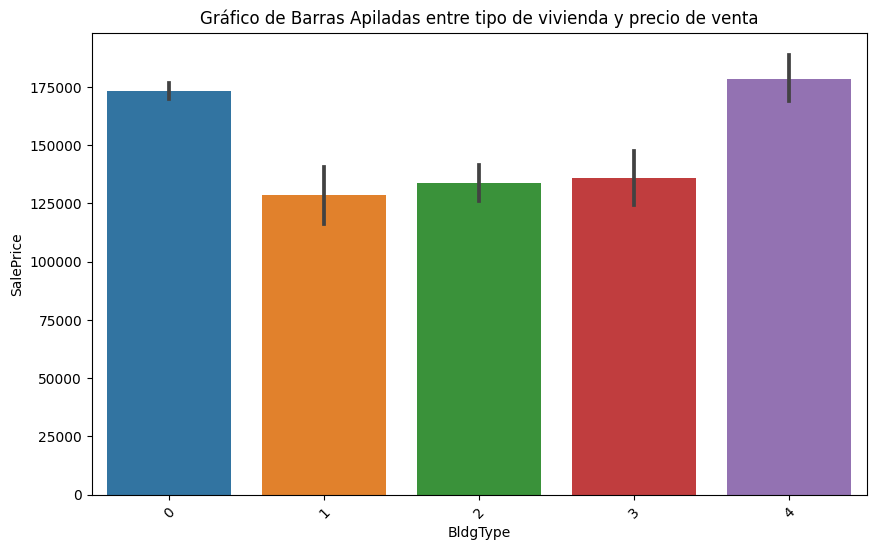

In [140]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='BldgType', y='SalePrice')
plt.title('Gráfico de Barras Apiladas entre tipo de vivienda y precio de venta')
plt.xticks(rotation=45)
plt.show()

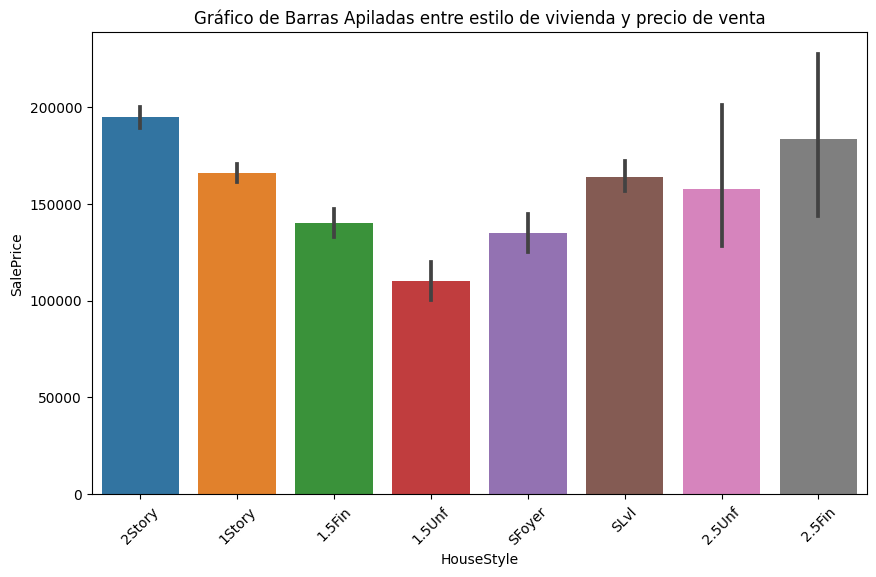

In [141]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='HouseStyle', y='SalePrice')
plt.title('Gráfico de Barras Apiladas entre estilo de vivienda y precio de venta')
plt.xticks(rotation=45)
plt.show()

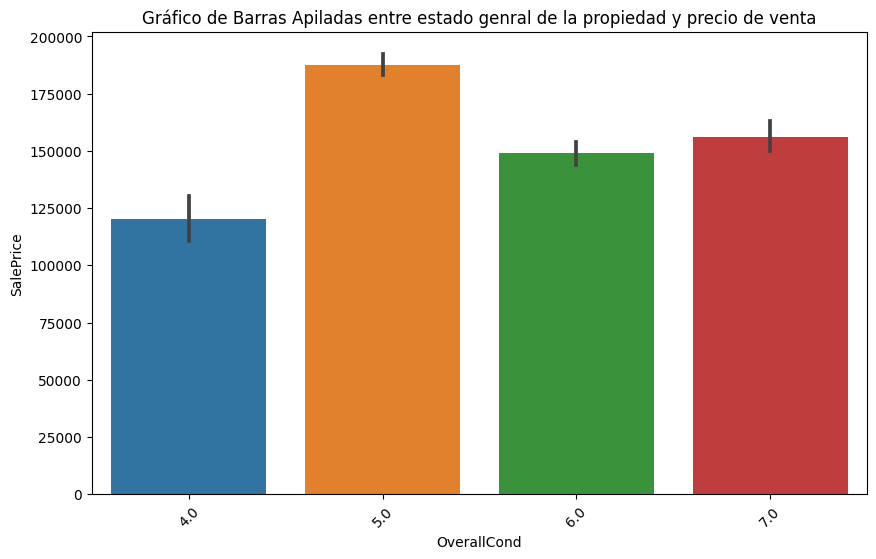

In [142]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='OverallCond', y='SalePrice')
plt.title('Gráfico de Barras Apiladas entre estado genral de la propiedad y precio de venta')
plt.xticks(rotation=45)
plt.show()

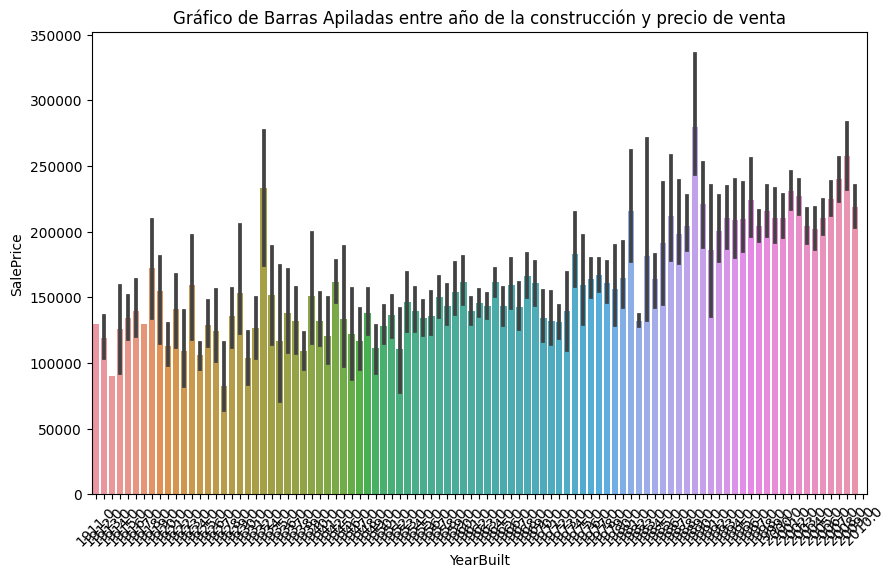

In [143]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='YearBuilt', y='SalePrice')
plt.title('Gráfico de Barras Apiladas entre año de la construcción y precio de venta')
plt.xticks(rotation=45)
plt.show()

Box Plots por Categoría:
 Los diagramas de caja (box plots) son útiles para visualizar la distribución de una variable numérica en diferentes categorías de una variable categórica. Esto te permite identificar diferencias en las distribuciones y detectar posibles valores atípicos (outliers) en cada categoría

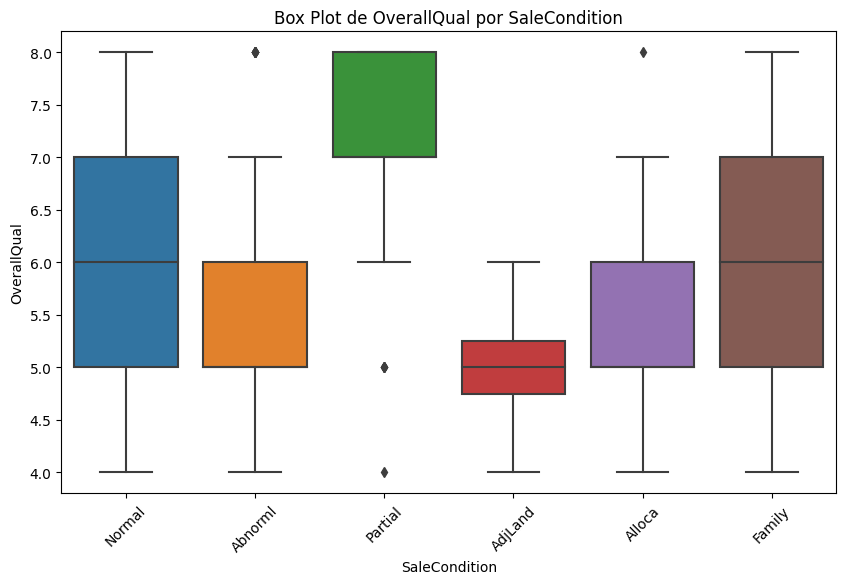

In [144]:
# Box plot de 'OverallQual' por 'SaleCondition'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='SaleCondition', y='OverallQual')
plt.title('Box Plot de OverallQual por SaleCondition')
plt.xticks(rotation=45)
plt.show()

In [145]:
# Tabla cruzada entre 'ExterQual' y 'KitchenQual'
cross_tab = pd.crosstab(df['ExterQual'], df['KitchenQual'])
# Imprimir la tabla cruzada
print(cross_tab)

KitchenQual   0   1    2    3
ExterQual                    
0            42   0    8    2
1             0   8    0    6
2            47   0  408   33
3            11  31  170  694


Análisis de Tablas Cruzadas: Para analizar la relación entre dos variables categóricas, puedes crear tablas cruzadas (crosstabs) y calcular estadísticas como el chi-cuadrado para evaluar la dependencia entre las variables

Text(0.5, 1.0, 'Gráfico de Barras Apiladas')

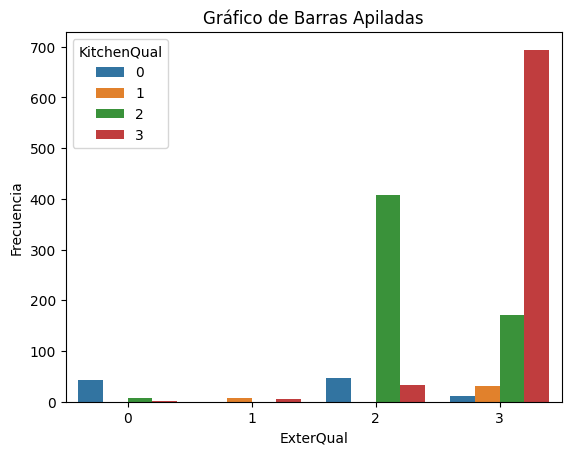

In [146]:
import seaborn as sns

sns.countplot(x='ExterQual', hue='KitchenQual', data=df)
plt.xlabel('ExterQual')
plt.ylabel('Frecuencia')
plt.title('Gráfico de Barras Apiladas')

# 6. Análisis Multivariable

Matriz de Correlación:
Se identifican las relaciones lineales entre las variables numéricas. Esto te ayudará a determinar qué variables están más correlacionadas con "SalePrice".

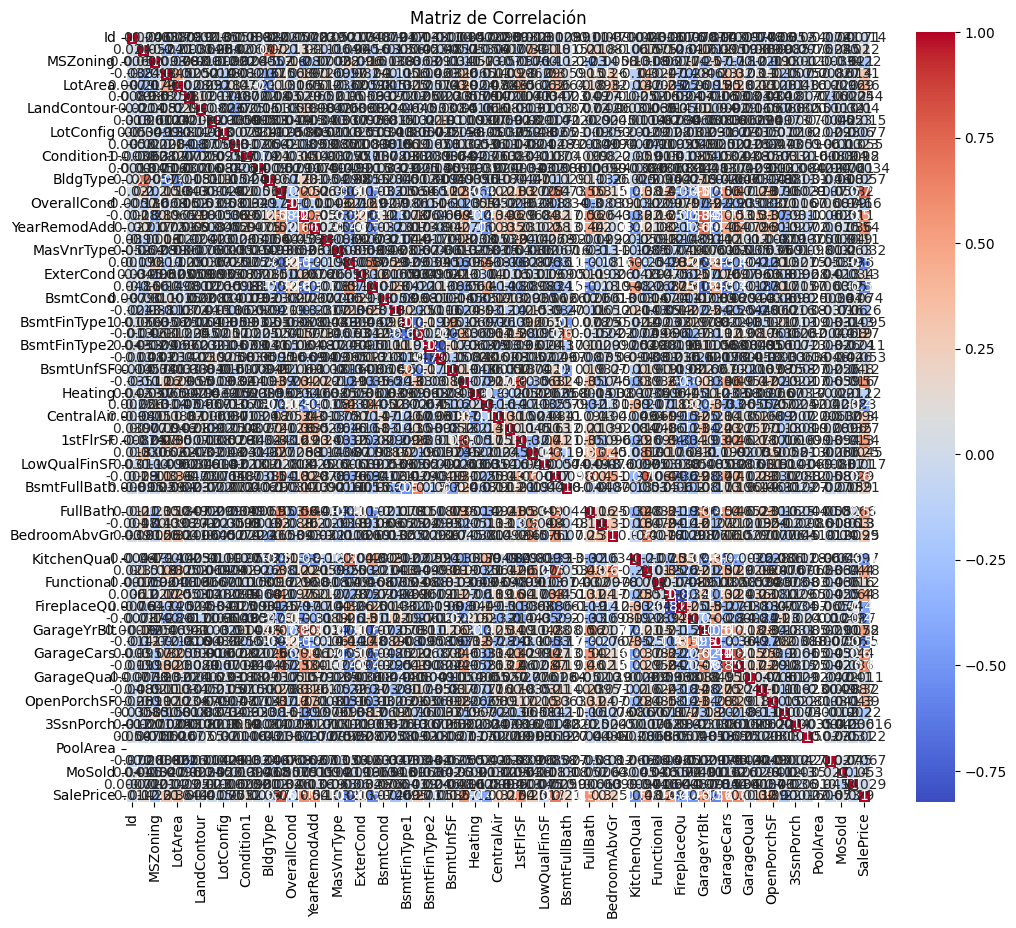

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
corr_matrix = df.corr()

# Visualizar la matriz de correlación en un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


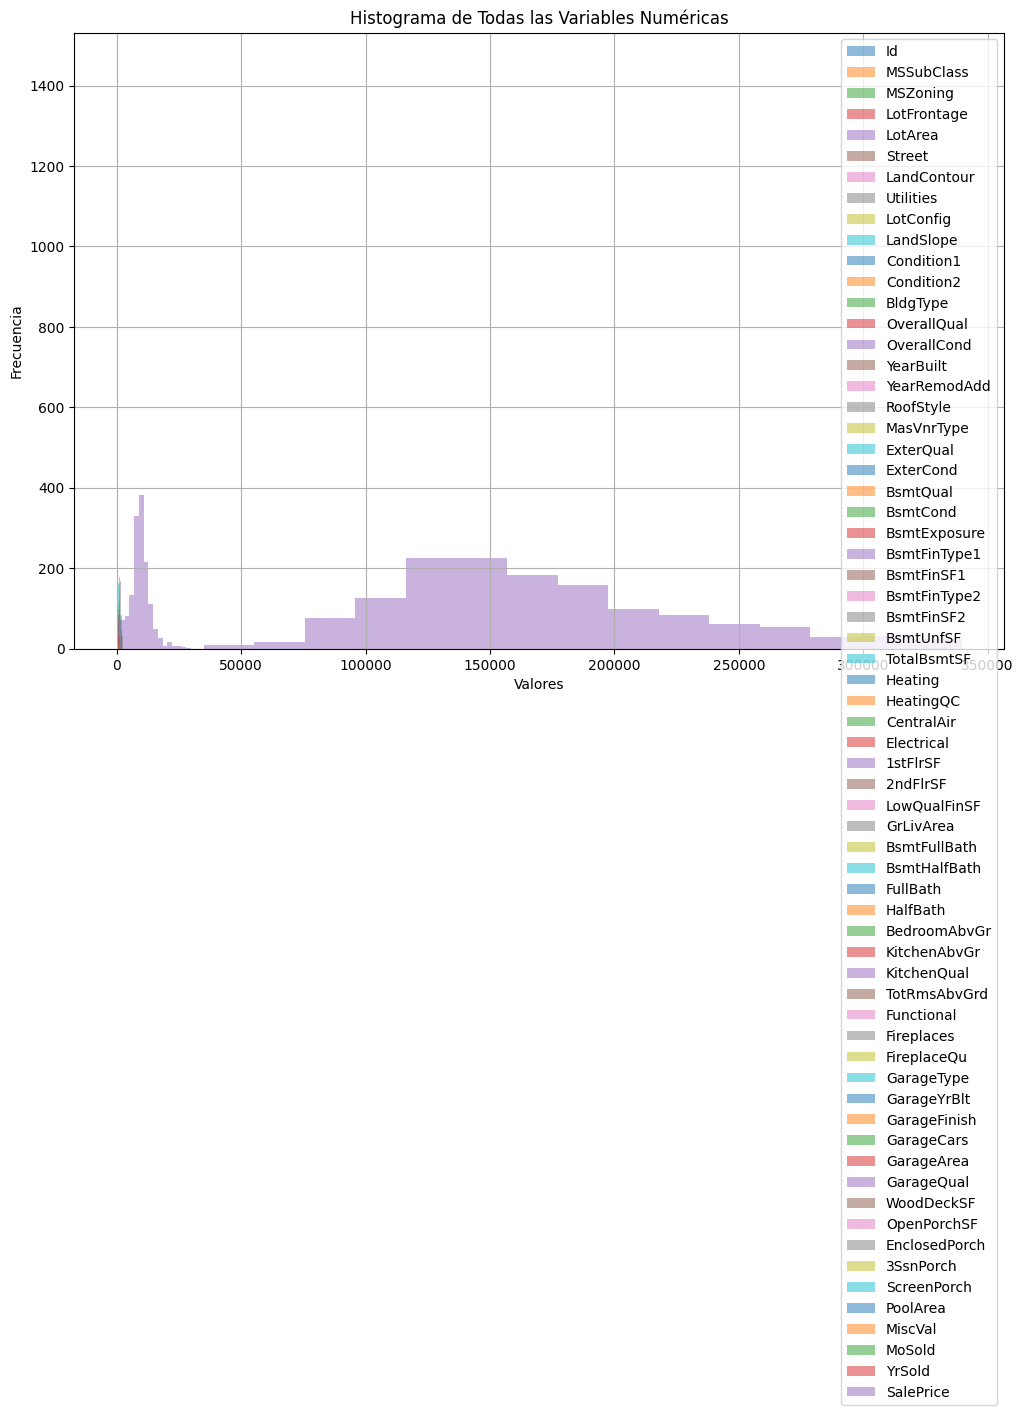

In [148]:
numeric_columns = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(12, 8))

for columna in numeric_columns:
    plt.hist(df[columna], bins=15, alpha=0.5, label=columna)

plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de Todas las Variables Numéricas')
plt.legend()
plt.grid(True)
plt.show()

# **Construcción y Evaluación del Modelo**

# 1. División de datos de entrenamiento y prueba.

In [149]:
from sklearn.model_selection import train_test_split

# Divide el conjunto de datos en datos de entrenamiento (70%) y datos de prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(df_numericas.drop('SalePrice', axis=1), df_numericas['SalePrice'], test_size=0.3, random_state=42)


In [150]:
# Imprimir la forma de los conjuntos de entrenamiento y prueba
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)


Forma de X_train: (1022, 64)
Forma de X_test: (438, 64)
Forma de y_train: (1022,)
Forma de y_test: (438,)


In [151]:
df_numericas.head(5)

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LandContour  \
0   1       60.00         3        65.00  8450.00       1            3   
1   2       20.00         3        80.00  9600.00       1            3   
2   3       60.00         3        68.00 11250.00       1            3   
3   4       70.00         3        60.00  9550.00       1            3   
4   5       60.00         3        84.00 14260.00       1            3   

   Utilities  LotConfig  LandSlope  ...  WoodDeckSF  OpenPorchSF  \
0          0          4          0  ...        0.00        61.00   
1          0          2          0  ...      298.00         0.00   
2          0          4          0  ...        0.00        42.00   
3          0          0          0  ...        0.00        35.00   
4          0          2          0  ...      192.00        84.00   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0           0.00       0.00         0.00      0.00     0.00    2.00 2008.00   
1           0.00       0.00         0.00      0.00     0.00    5.00 2007.00   
2           0.00       0.00         0.00      0.00     0.00    9.00 2008.00   
3           0.00       0.00         0.00      0.00     0.00    2.00 2006.00   
4           0.00       0.00         0.00      0.00     0.00    0.00 2008.00   

   SalePrice  
0  208500.00  
1  181500.00  
2  223500.00  
3  140000.00  
4  250000.00  

[5 rows x 65 columns]

# 2. Escalado de Características - StandardScaler

El escalado de características es una técnica importante en el preprocesamiento de datos que ayuda a que las características tengan una escala uniforme. Uno de los métodos de escalado comunes es el StandardScaler, que transforma las características de manera que tengan una media de 0 y una desviación estándar de 1

In [152]:
from sklearn.preprocessing import StandardScaler

X = df_numericas.drop(columns=['SalePrice'])
y = df_numericas['SalePrice']


In [153]:
# Crea una instancia de StandardScaler
scaler = StandardScaler()

# Ajusta el scaler solo al conjunto de entrenamiento
scaler.fit(X_train)

# Transforma el conjunto de entrenamiento y prueba
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


Ahora, X_train_scaled y X_test_scaled contienen las características escaladas que puedes utilizar para entrenar y evaluar tus modelos de aprendizaje automático, respectivamente.

In [154]:
print("Conjunto de entrenamiento escalado (X_train_scaled):")
print(X_train_scaled[:2])

print("\nConjunto de prueba escalado (X_test_scaled):")
print(X_test_scaled[:2])


Conjunto de entrenamiento escalado (X_train_scaled):
[[-1.40100022e+00 -8.02538954e-01 -7.11590400e-02  6.69959004e-01
   2.07394208e-01  6.26839141e-02  2.96471545e-01 -3.12958772e-02
   6.43172539e-01 -2.31199264e-01 -3.41973223e-02 -1.88662455e-02
  -4.11578265e-01  7.16938275e-01  5.92145600e-01  1.85988156e-01
  -7.11644392e-01  1.85673727e+00 -1.18742463e+00  6.61547311e-01
   3.66176343e-01  1.01080719e+00  3.18742228e-01  5.91029053e-01
   1.32912547e+00 -1.01696733e+00  2.61713682e-01 -2.24053039e-01
   2.15994814e+00  7.60370385e-01 -1.27414383e-01  2.74871050e-01
   2.81420443e-01  2.98390126e-01  1.55508304e+00 -7.67700045e-01
  -6.18973963e-02  5.31217208e-01 -8.16829505e-01  0.00000000e+00
   8.87449502e-01 -7.58109725e-01  2.66059853e-01  2.21993951e-01
   8.03251077e-01  5.27648208e-01  2.67244214e-01  1.13643294e+00
  -1.29527525e+00 -7.75924934e-01  3.09428976e-01  8.12873602e-01
   3.01905740e-01  3.66363954e-01  1.18771212e-01  2.53054126e-01
  -7.82834942e-01 -2.50

In [155]:
import pandas as pd

# Crear DataFrames a partir de los conjuntos de datos escalados y no escalados
X_train_df = pd.DataFrame(X_train, columns=X.columns)  # X_train sin escalar
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)  # X_train escalado

X_test_df = pd.DataFrame(X_test, columns=X.columns)  # X_test sin escalar
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)  # X_test escalado

# Comparativa entre X_train y X_train_scaled
print("Comparativa entre X_train y X_train_scaled:")
print("X_train (sin escalar):")
print(X_train_df.head())
print("\nX_train_scaled (escalado):")
print(X_train_scaled_df.head())

# Comparativa entre X_test y X_test_scaled
print("\nComparativa entre X_test y X_test_scaled:")
print("X_test (sin escalar):")
print(X_test_df.head())
print("\nX_test_scaled (escalado):")
print(X_test_scaled_df.head())


Comparativa entre X_train y X_train_scaled:
X_train (sin escalar):
        Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LandContour  \
135    136       20.00         3        80.00 10400.00       1            3   
1452  1453        0.00         4        35.00  3675.00       1            3   
762    763       60.00         1        72.00  8640.00       1            3   
932    933       20.00         3        84.00 11670.00       1            3   
435    436       60.00         3        43.00 10667.00       1            3   

      Utilities  LotConfig  LandSlope  ...  GarageQual  WoodDeckSF  \
135           0          4          0  ...           4       98.00   
1452          0          4          0  ...           4        0.00   
762           0          4          0  ...           4      169.00   
932           0          0          0  ...           4        0.00   
435           0          1          0  ...           4      158.00   

      OpenPorchSF  EnclosedPorch  3Ss

# 3. Ingeniería y Selección de Características usando RFE y el Factor de Inflación de Varianza

RFE (Recursive Feature Elimination):
RFE es un método que selecciona características eliminando iterativamente las menos importantes hasta que se alcanza un número deseado de características.

In [156]:
# Importa las bibliotecas necesarias
import numpy as np
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor


X = df_numericas.drop(columns=['SalePrice'])
y = df_numericas['SalePrice']


# Realiza la eliminación recursiva de características (RFE)
model = LinearRegression()
rfe = RFE(model, n_features_to_select=64)  #  Número de características que deseas
X_rfe = rfe.fit_transform(X, y)

# Encuentra las características seleccionadas
selected_features = X.columns[rfe.support_]

# Calcula el Factor de Inflación de la Varianza (VIF)
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data['Variable'] = data_frame.columns
    vif_data['VIF'] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

vif_data = calculate_vif(X[selected_features])

# Muestra las características seleccionadas y sus VIF
print("Características seleccionadas:")
print(selected_features)
print("\nFactor de Inflación de la Varianza (VIF):")
print(vif_data)

# Puedes usar las características seleccionadas en tu modelo
# y también analizar el VIF para gestionar la multicolinealidad.

Características seleccionadas:
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1',
       'Condition2', 'BldgType', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'MasVnrType', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
    

# 4. Preparación del modelo usando OLS & Regresión Lineal.

In [157]:
import statsmodels.api as sm

Para aplicar OLS con statsmodels, nesecitamos agregar una columna de unos (constante) a tu conjunto de entrenamiento. Esto se debe a que el modelo de regresión lineal incluye un término constante (intercepto)

In [158]:
X = df_numericas.drop(columns=['SalePrice'])
y = df_numericas['SalePrice']

In [159]:
X = sm.add_constant(X)

In [160]:
model = sm.OLS(y, X).fit()

In [161]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train shape:", y_train.shape)


X_train_scaled shape: (1022, 64)
y_train shape: (1022,)


Una vez ajustado el modelo, se procede para hacer predicciones en el conjunto de prueba

In [162]:
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     22.64
Date:                Thu, 14 Sep 2023   Prob (F-statistic):          1.60e-167
Time:                        02:56:11   Log-Likelihood:                -17792.
No. Observations:                1460   AIC:                         3.571e+04
Df Residuals:                    1397   BIC:                         3.604e+04
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           2.61e+05   1.99e+06      0.131

In [163]:
predictions = model.predict(X)

# 5. Modelos de Regularización Ridge, Lasso y ElasticNet.

Los modelos de regularización Ridge, Lasso y ElasticNet son técnicas utilizadas en aprendizaje automático para evitar el sobreajuste (overfitting) y mejorar la capacidad de generalización de un modelo de regresión lineal. Estos modelos introducen penalizaciones en los coeficientes de las características para controlar su magnitud y, por lo tanto, evitar que el modelo se vuelva demasiado complejo

In [164]:
# Importa las bibliotecas necesarias
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error


# Entrena modelos Ridge, Lasso y ElasticNet
ridge_model = Ridge(alpha=1.0)  # Puedes ajustar el hiperparámetro alpha
lasso_model = Lasso(alpha=1.0)  # Puedes ajustar el hiperparámetro alpha
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # Puedes ajustar alpha y l1_ratio

ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
elasticnet_model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
ridge_predictions = ridge_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)
elasticnet_predictions = elasticnet_model.predict(X_test)

# Calcula el error cuadrático medio (MSE) en el conjunto de prueba
ridge_mse = mean_squared_error(y_test, ridge_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
elasticnet_mse = mean_squared_error(y_test, elasticnet_predictions)

print("Error Cuadrático Medio (MSE) - Ridge:", ridge_mse)
print("Error Cuadrático Medio (MSE) - Lasso:", lasso_mse)
print("Error Cuadrático Medio (MSE) - ElasticNet:", elasticnet_mse)

Error Cuadrático Medio (MSE) - Ridge: 2926333239.9466414
Error Cuadrático Medio (MSE) - Lasso: 2935081473.290393
Error Cuadrático Medio (MSE) - ElasticNet: 2789173641.8953185


# 6. Análisis de Residuos.

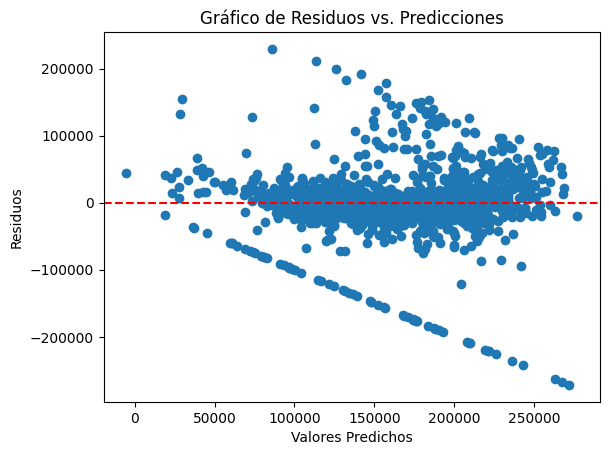

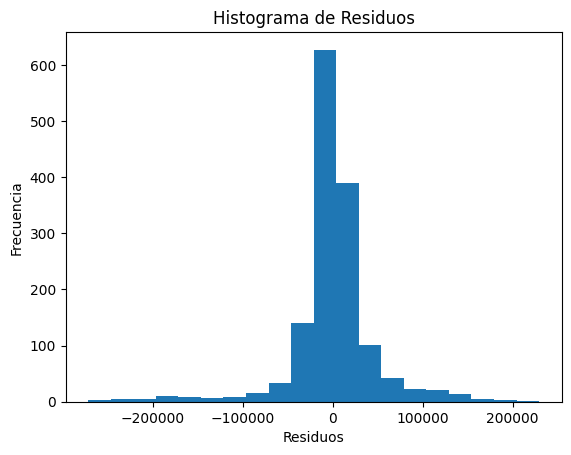

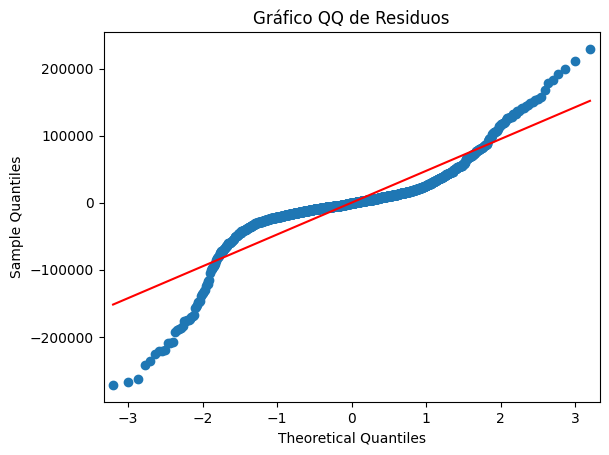

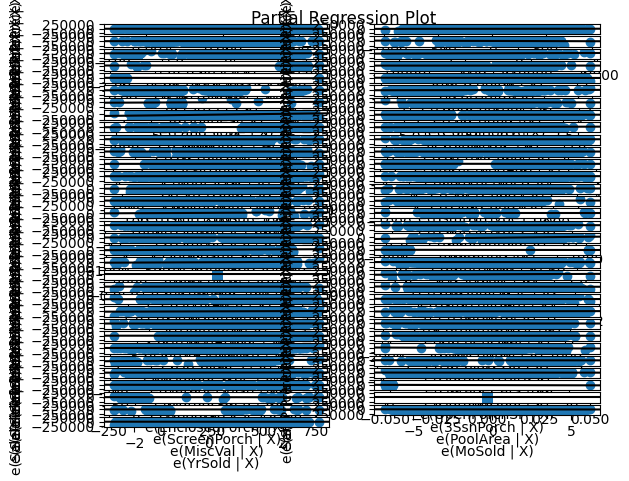

Estadística de prueba Durbin-Watson: 1.901398780196426
Estadística de prueba Shapiro-Wilk: 0.8117913007736206
P-valor de Shapiro-Wilk: 3.117455521377856e-38


In [165]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Asumiendo que tienes un modelo previamente ajustado llamado 'results'

# Obtén los residuos del modelo
residuals = model.resid

# Gráfico de Residuos vs. Predicciones
plt.scatter(model.fittedvalues, residuals)
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos vs. Predicciones")
plt.axhline(y=0, color='r', linestyle='--')  # Línea horizontal en y=0
plt.show()

# Histograma de Residuos
plt.hist(residuals, bins=20)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de Residuos")
plt.show()

# Gráfico QQ (Quantile-Quantile)
sm.qqplot(residuals, line='s')
plt.title("Gráfico QQ de Residuos")
plt.show()

# Gráfico de Residuos Parciales
sm.graphics.plot_partregress_grid(model)
plt.show()

# Prueba de Durbin-Watson para autocorrelación
from statsmodels.stats.stattools import durbin_watson
durbin_watson_test_statistic = durbin_watson(residuals)
print(f"Estadística de prueba Durbin-Watson: {durbin_watson_test_statistic}")

# Prueba de Shapiro-Wilk para normalidad
from scipy.stats import shapiro
shapiro_test_statistic, shapiro_p_value = shapiro(residuals)
print(f"Estadística de prueba Shapiro-Wilk: {shapiro_test_statistic}")
print(f"P-valor de Shapiro-Wilk: {shapiro_p_value}")


# Evaluación y Valoración del Modelo

La evaluación y valoración del modelo es una parte crítica del proceso de construcción de modelos de aprendizaje automático. Se utiliza para medir el rendimiento y la eficacia de tu modelo en la tarea específica para la que fue creado. Hay varias métricas y técnicas que puedes utilizar para evaluar y valorar tu modelo

El Error Cuadrático Medio (MSE, por sus siglas en inglés Mean Squared Error) es una métrica comúnmente utilizada para evaluar el rendimiento de modelos de regresión en Python. Puedes calcular el MSE utilizando bibliotecas como scikit-learn o numpy

Usando scikit-learn:

In [166]:
from sklearn.metrics import mean_squared_error

# Calcula el MSE
mse = mean_squared_error(y, predictions)

# Imprime el resultado
print("Error Cuadrático Medio (MSE):", mse)

Error Cuadrático Medio (MSE): 2250996848.0815363


Usando numpy:

In [167]:
# Calcula el MSE
mse = np.mean((y - predictions) ** 2)

# Imprime el resultado
print("Error Cuadrático Medio (MSE):", mse)

Error Cuadrático Medio (MSE): 2250996848.0815363


Coeficiente de determinación utilizando la biblioteca scikit-learn

In [168]:
from sklearn.metrics import r2_score

# Calcula R^2
r_squared = r2_score(y, predictions)

# Imprime el resultado
print("Coeficiente de Determinación (R^2):", r_squared)

Coeficiente de Determinación (R^2): 0.5012033765364032


# Validación Cruzada (Cross-Validation)

Para evaluar el rendimiento de un modelo de manera más confiable y robusta. Su principal objetivo es estimar cómo un modelo entrenado se comportaría en datos no vistos, lo que ayuda a evitar problemas de sobreajuste y subajuste.

In [169]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Crear un modelo (por ejemplo, Regresión Logística)
model = LogisticRegression()

# Realizar Validación Cruzada K-Fold con 5 pliegues y calcular la precisión
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Imprimir los resultados
print("Precisión en cada pliegue:", scores)
print("Precisión promedio:", scores.mean())


Precisión en cada pliegue: [0.01369863 0.03082192 0.0239726  0.03082192 0.0239726 ]
Precisión promedio: 0.024657534246575342


# Curvas de Aprendizaje (Learning Curves)

 Estas curvas proporcionan información valiosa sobre cómo se comporta un modelo a medida que varía el tamaño del conjunto de datos de entrenamiento o diferentes hiperparámetros

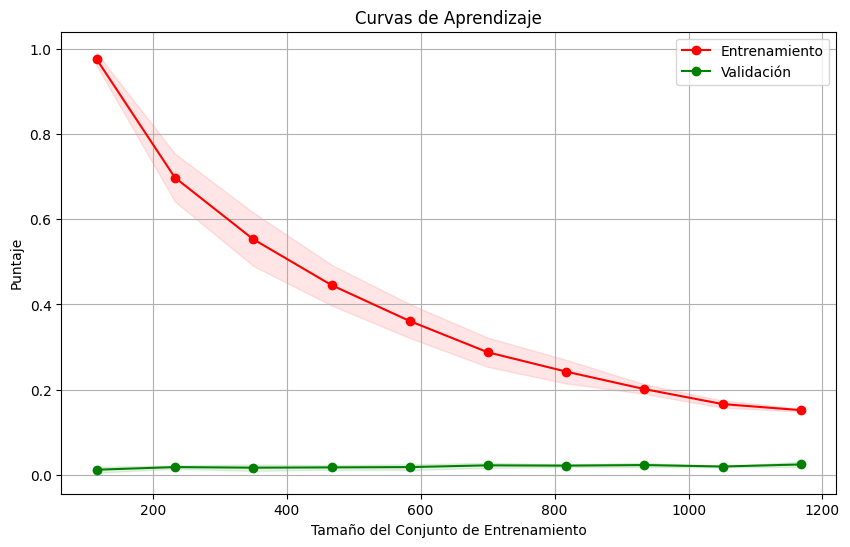

In [170]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# Crea un conjunto de tamaños de entrenamiento
train_sizes = np.linspace(0.1, 1.0, 10)

# Calcula las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=train_sizes, cv=5)

# Calcula las medias y desviaciones estándar de los puntajes
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Grafica las curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.title("Curvas de Aprendizaje")
plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel("Puntaje")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validación")
plt.legend(loc="best")
plt.show()


Comparación de Modelos

In [171]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
feature_importances = model.feature_importances_

In [172]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
feature_coefficients = model.coef_

#Comparación de Modelos

Interpretación de Modelos de Regresión Lineal

In [173]:
import pandas as pd
from sklearn.linear_model import LinearRegression


# Entrenar un modelo de regresión lineal
model3 = LinearRegression()
model3.fit(X, y)

# Interpretación de los coeficientes
coeficientes = model.coef_
intercepto = model.intercept_

print("Coeficientes:", coeficientes)
print("Intercepto:", intercepto)


Coeficientes: [[-5.60666066e-04 -2.24417971e-04 -4.98676525e-06 ... -2.56924535e-03
   1.38151271e-04 -3.80207778e-03]
 [-3.99909812e-04 -3.50969797e-05 -1.33917212e-05 ... -7.50327263e-05
   3.12060157e-05  1.58760362e-03]
 [ 2.30329266e-03  9.80068850e-05  8.93947315e-06 ... -3.10233124e-05
   5.83295936e-06  3.30843393e-03]
 ...
 [ 6.43033918e-04  5.52312674e-05 -1.14864213e-06 ... -6.39721775e-05
   3.56585751e-06 -6.75496885e-04]
 [-1.71912050e-05  4.06790007e-05 -5.80833996e-07 ... -6.70508616e-05
   4.17445100e-06 -5.25985154e-04]
 [-1.58471465e-03  3.76244992e-05 -1.14524265e-05 ... -9.94399235e-05
  -1.17275357e-05 -7.97398262e-04]]
Intercepto: [-1.90154696e-06  7.87579178e-07  1.64470078e-06  1.70231462e-06
  1.63886340e-06  1.37784145e-06  1.44542428e-06  3.59909543e-07
  5.95926015e-07  2.24304289e-07  7.90701424e-07  8.16925161e-07
  3.09607277e-07  1.18591908e-06  1.11747082e-06  2.28486285e-06
  1.22386698e-06  1.35548400e-06  1.18276148e-06  2.78743809e-06
  1.25640563e

Interpretación de Modelos de Clasificación

In [174]:

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Entrenar un modelo de regresión logística
model4 = LogisticRegression()
model4.fit(X, y)

#model4 =
# Realizar predicciones en el conjunto de datos
y_pred = model4.predict(X)

# Interpretación de las métricas de clasificación
reporte_clasificacion = classification_report(y, y_pred)

reporte_clasificacion = classification_report

reporte_clasificacion
print("Reporte de Clasificación:\n", reporte_clasificacion)

Reporte de Clasificación:
 <function classification_report at 0x7f71f88acca0>


La comparación de modelos es una parte esencial del proceso de desarrollo de modelos de aprendizaje automático. Te permite determinar cuál de varios modelos es el más adecuado para resolver un problema específico. Aquí tienes un ejemplo de cómo comparar modelos en Python utilizando la biblioteca scikit-learn:

In [175]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Definir modelos a comparar
models = {
    "Regresión Logística": LogisticRegression(),
    "Árbol de Decisión": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Comparar modelos usando validación cruzada
results = []
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    results.append([model_name, np.mean(scores), np.std(scores)])

# Mostrar resultados
results_df = pd.DataFrame(results, columns=["Modelo", "Precisión Promedio", "Desviación Estándar"])
print("Resultados de Comparación de Modelos:")
print(results_df)

# Entrenar y evaluar el mejor modelo en los datos de prueba
best_model_name = results_df.loc[results_df["Precisión Promedio"].idxmax()]["Modelo"]
best_model = models[best_model_name]
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Mejor modelo ({best_model_name}) - Precisión en datos de prueba: {accuracy:.2f}")


Resultados de Comparación de Modelos:
                Modelo  Precisión Promedio  Desviación Estándar
0  Regresión Logística                0.02                 0.01
1    Árbol de Decisión                0.03                 0.02
2        Random Forest                0.06                 0.01
Mejor modelo (Random Forest) - Precisión en datos de prueba: 0.06


# 8. Predicción.

In [176]:
# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Las predicciones estarán en y_pred

In [177]:
print("Predicciones (y_pred):")
print(y_pred)

Predicciones (y_pred):
[136500. 328000. 119000. 140000.      0.  81000. 130500. 148500.  81000.
 135000. 139500. 100000. 105000. 190000. 175000. 139400. 180000. 120000.
 113000. 214000. 230000. 171900. 173000. 120000. 204000. 179200. 176485.
  82500. 186500. 250580. 155000. 315750.      0. 110000. 250000. 160000.
 128000. 195000. 290000.  84000. 116000. 210000. 128000.      0. 129000.
 138887. 125000. 109000.      0. 135000. 119000. 235000.  83500.      0.
 141000. 220000. 196500. 155000. 155000. 108000. 100000. 139000.      0.
      0.      0. 237500. 126000.      0.  80000. 177000. 118964. 100000.
 109500.  92900.      0. 157000. 337000. 290000. 133700. 110000.  89500.
 115000.  82500.  73000. 158900. 125000. 270000. 170000. 149300. 172785.
 109900. 190000. 119500.      0. 100000. 164990. 119000. 165000. 194000.
      0. 175000. 193000. 268000. 110000. 143000. 163000. 147000. 228000.
 138000. 158900.  61000.  80000. 138500. 115000. 190000. 112000. 119000.
 110000. 118964. 270000. 125

#9. Conclusión y Análisis Final.


In [178]:
import pandas as pd

# Crear un DataFrame con las predicciones y los valores reales
df_predicciones = pd.DataFrame({'Valor Real': y_test, 'Predicción': y_pred})

# Muestra el DataFrame con las predicciones y los valores reales
print(df_predicciones)

      Valor Real  Predicción
892    154500.00   136500.00
1105   325000.00   328000.00
413    115000.00   119000.00
522    159000.00   140000.00
1036   315500.00        0.00
...          ...         ...
331    139000.00   142000.00
323    126175.00   106500.00
650    205950.00   183000.00
439    110000.00   110000.00
798         0.00        0.00

[438 rows x 2 columns]
